# Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning

- Name : Muhammad Rizdky Maulady

Overview
“Sebuah perusahaan dapat berkembang dengan pesat saat mengetahui perilaku customer personality nya, sehingga dapat memberikan layanan serta manfaat lebih baik kepada customers yang berpotensi menjadi loyal customers. Dengan mengolah data historical marketing campaign guna menaikkan performa dan menyasar customers yang tepat agar dapat bertransaksi di platform perusahaan, dari insight data tersebut fokus kita adalah membuat sebuah model prediksi kluster sehingga memudahkan perusahaan dalam membuat keputusan ”

##**Project Pipeline**

1. **Conversion Rate Analysis📊**

Langkah pertama adalah mengevaluasi conversion rate untuk mengetahui seberapa efektif strategi marketing yang sudah berjalan. Dari sini, area-area yang masih perlu dioptimalkan bisa mulai teridentifikasi.

2. **Data Cleaning & Feature Engineering🛠️**

Data dirapikan terlebih dahulu—mulai dari pembersihan fitur-fitur baru dikembangkan dari data yang tersedia agar model prediksi semakin akurat. Fokus diberikan pada variabel-variabel yang benar-benar mencerminkan perilaku dan karakter pelanggan.

3. **Data Preprocessing🧹**

Sebelum masuk ke tahap machine learning, Handling Outlier, standarisasi format, hingga proses encoding. Tujuannya agar seluruh dataset siap digunakan secara konsisten.

4. **Modeling🤖**

Dengan data yang sudah siap pakai, model prediktif dibangun menggunakan algoritma machine learning. Proses training dan tuning dilakukan untuk mendapatkan hasil terbaik.

5. **Customer Personality analysis for Marketing Retargeting (Presona)**

Menganalisis hasil cluster dengan data yang kita punya untuk pembentukan persona martket campign target

6. **Calculate the Impact📈**

Tahap akhir adalah mengukur dampak model terhadap campaign marketing. Peningkatan engagement pelanggan setelah implementasi model juga dievaluasi untuk melihat efektivitasnya.

# **1 : Conversion Rate Analysis Based On Income, Spending And Age**
Goals : Find a pattern of Customer behavior.<br><br>
Objective :
- Cleaning data
- Feature engineering
- Exploratory Data Analysis (EDA)  
- Analyze Conversion Rate with other variables such as age, income, expenses, etc

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

marketing_campaign_data.csv

## **Load Data & Preliminary Analysis**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


file_path = '/content/drive/My Drive/marketing_campaign_data.csv'
df = pd.read_csv(file_path, low_memory=True)  # Meminimalkan penggunaan memori
df.columns = [col.lower() for col in df.columns]

df_simulation = df.copy()
df_analyst = df.copy()
df.head()

# split data by rows and columns
rows = df.shape[0]
cols = df.shape[1]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data Understanding

Data Column Information:

    Unnamed: 0: An unnamed index or identifier column.
    ID: Customer identification number or code.
    Year_Birth: Year of birth of the customer.
    Education: The level of education attained by the customer.
    Marital_Status: Marital status of the customer.
    Income: Customer's income.
    Kidhome: Number of children in the household.
    Teenhome: Number of teenagers in the household.
    Dt_Customer: Date when the customer became a client.
    Recency: Number of days since the last purchase.
    MntCoke: Amount spent on Coke products.
    MntFruits: Amount spent on fruit products.
    MntMeatProducts: Amount spent on meat products.
    MntFishProducts: Amount spent on fish products.
    MntSweetProducts: Amount spent on sweet products.
    MntGoldProds: Amount spent on gold products.
    NumDealsPurchases: Number of purchases made with deals or discounts.
    NumWebPurchases: Number of purchases made through the web.
    NumCatalogPurchases: Number of purchases made from catalogs.
    NumStorePurchases: Number of purchases made in physical stores.
    NumWebVisitsMonth: Number of web visits per month.
    AcceptedCmp3: Whether the customer accepted Campaign 3 (binary, likely a marketing campaign).
    AcceptedCmp4: Whether the customer accepted Campaign 4 (binary, likely a marketing campaign).
    AcceptedCmp5: Whether the customer accepted Campaign 5 (binary, likely a marketing campaign).
    AcceptedCmp1: Whether the customer accepted Campaign 1 (binary, likely a marketing campaign).
    AcceptedCmp2: Whether the customer accepted Campaign 2 (binary, likely a marketing campaign).
    Complain: Whether the customer has registered a complaint (binary).
    Z_CostContact: Cost of contacting the customer.
    Z_Revenue: Revenue generated from the customer.
    Response: Customer response to a marketing campaign (binary, likely indicating whether they responded positively to a campaign).


In [ ]:
df_analyst

unnamed: 0     id  year_birth education marital_status      income  \
0              0   5524        1957        S1         Lajang  58138000.0   
1              1   2174        1954        S1         Lajang  46344000.0   
2              2   4141        1965        S1    Bertunangan  71613000.0   
3              3   6182        1984        S1    Bertunangan  26646000.0   
4              4   5324        1981        S3        Menikah  58293000.0   
...          ...    ...         ...       ...            ...         ...   
2235        2235  10870        1967        S1        Menikah  61223000.0   
2236        2236   4001        1946        S3    Bertunangan  64014000.0   
2237        2237   7270        1981        S1          Cerai  56981000.0   
2238        2238   8235        1956        S2    Bertunangan  69245000.0   
2239        2239   9405        1954        S3        Menikah  52869000.0   

      kidhome  teenhome dt_customer  recency  mntcoke  mntfruits  \
0           0         0  04-09-2012       58   635000      88000   
1           1         1  08-03-2014       38    11000       1000   
2           0         0  21-08-2013       26   426000      49000   
3           1         0  10-02-2014       26    11000       4000   
4           1         0  19-01-2014       94   173000      43000   
...       ...       ...         ...      ...      ...        ...   
2235        0         1  13-06-2013       46   709000      43000   
2236        2         1  10-06-2014       56   406000          0   
2237        0         0  25-01-2014       91   908000      48000   
2238        0         1  24-01-2014        8   428000      30000   
2239        1         1  15-10-2012       40    84000       3000   

      mntmeatproducts  mntfishproducts  mntsweetproducts  mntgoldprods  \
0              546000           172000             88000         88000   
1                6000             2000              1000          6000   
2              127000           111000             21000         42000   
3               20000            10000              3000          5000   
4              118000            46000             27000         15000   
...               ...              ...               ...           ...   
2235           182000            42000            118000        247000   
2236            30000                0                 0          8000   
2237           217000            32000             12000         24000   
2238           214000            80000             30000         61000   
2239            61000             2000              1000         21000   

      numdealspurchases  numwebpurchases  numcatalogpurchases  \
0                     3                8                   10   
1                     2                1                    1   
2                     1                8                    2   
3                     2                2                    0   
4                     5                5                    3   
...                 ...              ...                  ...   
2235                  2                9                    3   
2236                  7                8                    2   
2237                  1                2                    3   
2238                  2                6                    5   
2239                  3                3                    1   

      numstorepurchases  numwebvisitsmonth  acceptedcmp3  acceptedcmp4  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
...                 ...                ...           ...           ...   
2235                  4                  5             0             0   
2236          

In [ ]:
# Display the information about the DataFrame
print("DataFrame Information:")
df_analyst.info()

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   unnamed: 0           2240 non-null   int64  
 1   id                   2240 non-null   int64  
 2   year_birth           2240 non-null   int64  
 3   education            2240 non-null   object 
 4   marital_status       2240 non-null   object 
 5   income               2216 non-null   float64
 6   kidhome              2240 non-null   int64  
 7   teenhome             2240 non-null   int64  
 8   dt_customer          2240 non-null   object 
 9   recency              2240 non-null   int64  
 10  mntcoke              2240 non-null   int64  
 11  mntfruits            2240 non-null   int64  
 12  mntmeatproducts      2240 non-null   int64  
 13  mntfishproducts      2240 non-null   int64  
 14  mntsweetproducts     2240 non-null   int64  
 15  mntgoldprods   

In [ ]:
pd.set_option('display.max_columns', None)

# Pilih kolom-kolom bertipe objek dan simpan dalam variabel 'categoric'
categoric = df.select_dtypes('object')

# Pilih kolom-kolom bertipe numerik dan simpan dalam variabel 'numeric'
numeric = df.select_dtypes('number')

# Tentukan jumlah baris dan kolom
rows = df.shape[0]
cols = df.shape[1]

# Cetak bentuk DataFrame
print(f'Jumlah Baris: {rows}\nJumlah Kolom: {cols}')

# Cetak sampel 6 baris dari DataFrame
print('\nContoh Data:')
display(df.sample(6))

# Cetak ringkasan statistik data kategorikal
print('\nRingkasan Statistik Data Kategorikal:')
display(categoric.describe())

# Cetak ringkasan statistik data numerik
print('\nRingkasan Statistik Data Numerik:')
display(numeric.describe())

# Define categorical_col and numerical_col before printing
categorical_col = categoric.columns.tolist()  # Get the list of categorical columns
numerical_col = numeric.columns.tolist()    # Get the list of numerical columns

Jumlah Baris: 2240
Jumlah Kolom: 30

Contoh Data:


unnamed: 0    id  year_birth education marital_status      income  \
419          419  8581        1971        S2        Menikah  49505000.0   
702          702  6384        1978        S1          Cerai  71022000.0   
1510        1510   486        1988        S1        Menikah  84219000.0   
2150        2150  6950        1958        S2        Menikah  49572000.0   
1765        1765  9167        1956        S1        Menikah  67131000.0   
1423        1423  5229        1969        S3    Bertunangan  54132000.0   

      kidhome  teenhome dt_customer  recency  mntcoke  mntfruits  \
419         1         1  05-03-2013        4   604000          0   
702         0         1  11-02-2014       30   909000      12000   
1510        0         0  02-02-2014       27   434000     137000   
2150        1         1  15-12-2013       25    35000       1000   
1765        0         1  26-03-2013       72   465000      71000   
1423        0         1  16-02-2014       81    30000       1000   

      mntmeatproducts  mntfishproducts  mntsweetproducts  mntgoldprods  \
419            100000            19000                 0         28000   
702            278000                0             12000        242000   
1510           400000            45000            137000         45000   
2150            16000                0              1000          1000   
1765           250000            93000             35000         62000   
1423             8000                0                 0          3000   

      numdealspurchases  numwebpurchases  numcatalogpurchases  \
419                   9               10                    2   
702                   3                5                    2   
1510                  1                3                    4   
2150                  2                2                    0   
1765                  3                9                    2   
1423                  1                1                    0   

      numstorepurchases  numwebvisitsmonth  acceptedcmp3  acceptedcmp4  \
419                   8                  8             0             0   
702                  11                  8             1             0   
1510                 10                  1             0             0   
2150                  3                  7             0             0   
1765                 12                  6             0             0   
1423                  3                  7             0             0   

      acceptedcmp5  acceptedcmp1  acceptedcmp2  complain  z_costcontact  \
419              0             0             0         0              3   
702              0             0             0         0              3   
1510             0             0             0         0              3   
2150             0             0             0         0              3   
1765             0             0             0         0              3   
1423             0             0             0         0              3   

      z_revenue  response  
419          11         0  
702          11         0  
1510         11         0  
2150         11         0  
1765         11         0  
1423         11         0


Ringkasan Statistik Data Kategorikal:


education marital_status dt_customer
count       2240           2240        2240
unique         5              6         663
top           S1        Menikah  31-08-2012
freq        1127            864          12


Ringkasan Statistik Data Numerik:


unnamed: 0            id   year_birth        income      kidhome  \
count  2240.000000   2240.000000  2240.000000  2.216000e+03  2240.000000   
mean   1119.500000   5592.159821  1968.805804  5.224725e+07     0.444196   
std     646.776623   3246.662198    11.984069  2.517308e+07     0.538398   
min       0.000000      0.000000  1893.000000  1.730000e+06     0.000000   
25%     559.750000   2828.250000  1959.000000  3.530300e+07     0.000000   
50%    1119.500000   5458.500000  1970.000000  5.138150e+07     0.000000   
75%    1679.250000   8427.750000  1977.000000  6.852200e+07     1.000000   
max    2239.000000  11191.000000  1996.000000  6.666660e+08     2.000000   

          teenhome      recency       mntcoke      mntfruits  mntmeatproducts  \
count  2240.000000  2240.000000  2.240000e+03    2240.000000     2.240000e+03   
mean      0.506250    49.109375  3.039357e+05   26302.232143     1.669500e+05   
std       0.544538    28.962453  3.365974e+05   39773.433765     2.257154e+05   
min       0.000000     0.000000  0.000000e+00       0.000000     0.000000e+00   
25%       0.000000    24.000000  2.375000e+04    1000.000000     1.600000e+04   
50%       0.000000    49.000000  1.735000e+05    8000.000000     6.700000e+04   
75%       1.000000    74.000000  5.042500e+05   33000.000000     2.320000e+05   
max       2.000000    99.000000  1.493000e+06  199000.000000     1.725000e+06   

       mntfishproducts  mntsweetproducts   mntgoldprods  numdealspurchases  \
count      2240.000000       2240.000000    2240.000000        2240.000000   
mean      37525.446429      27062.946429   44021.875000           2.325000   
std       54628.979403      41280.498488   52167.438915           1.932238   
min           0.000000          0.000000       0.000000           0.000000   
25%        3000.000000       1000.000000    9000.000000           1.000000   
50%       12000.000000       8000.000000   24000.000000           2.000000   
75%       50000.000000      33000.000000   56000.000000           3.000000   
max      259000.000000     263000.000000  362000.000000          15.000000   

       numwebpurchases  numcatalogpurchases  numstorepurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       numwebvisitsmonth  acceptedcmp3  acceptedcmp4  acceptedcmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       acceptedcmp1  acceptedcmp2     complain  z_costcontact  z_revenue  \
count   2240.000000   2240.000000  2240.000000         2240.0     2240.0   
mean       0.064286      0.013393     0.009375            3.0       11.0   
std        0.245316      0.114976     0.096391            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000          

In [ ]:
print("Categorical columns: ", categorical_col)
print("Numerical columns: ", numerical_col)

Categorical columns:  ['education', 'marital_status', 'dt_customer']
Numerical columns:  ['unnamed: 0', 'id', 'year_birth', 'income', 'kidhome', 'teenhome', 'recency', 'mntcoke', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods', 'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1', 'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response']


In [ ]:
for cols in categorical_col:
  print(f"Categories in {cols}:", df[cols].unique())

Categories in education: ['S1' 'S3' 'S2' 'SMA' 'D3']
Categories in marital_status: ['Lajang' 'Bertunangan' 'Menikah' 'Cerai' 'Janda' 'Duda']
Categories in dt_customer: ['04-09-2012' '08-03-2014' '21-08-2013' '10-02-2014' '19-01-2014'
 '09-09-2013' '13-11-2012' '08-05-2013' '06-06-2013' '13-03-2014'
 '15-11-2013' '10-10-2012' '24-11-2012' '24-12-2012' '31-08-2012'
 '28-03-2013' '03-11-2012' '08-08-2012' '06-01-2013' '23-12-2012'
 '11-01-2014' '18-03-2013' '02-01-2013' '27-05-2013' '20-02-2013'
 '31-05-2013' '22-11-2013' '22-05-2014' '11-05-2013' '29-10-2012'
 '29-08-2013' '31-12-2013' '02-09-2013' '11-02-2014' '01-02-2013'
 '29-04-2013' '12-03-2013' '05-11-2013' '02-10-2013' '28-06-2014'
 '09-11-2012' '24-05-2013' '01-01-2014' '08-11-2012' '12-05-2014'
 '11-08-2012' '07-06-2014' '12-06-2013' '19-11-2012' '02-04-2013'
 '28-04-2014' '17-06-2013' '03-03-2014' '04-07-2013' '07-09-2012'
 '18-02-2013' '11-06-2013' '06-12-2013' '21-05-2013' '11-05-2014'
 '19-03-2014' '27-09-2013' '08-04-2013' 

In [ ]:
# Memampilkan isi value dalam setiap kolom
print('\nNumerical data value counts:')
for col in numeric.columns:
    print(f'{col} value counts: ')
    print(numeric[col].value_counts())
    print('=-='*5)


Numerical data value counts:
unnamed: 0 value counts: 
unnamed: 0
2223    1
2222    1
2221    1
2220    1
2219    1
       ..
4       1
3       1
2       1
1       1
0       1
Name: count, Length: 2240, dtype: int64
=-==-==-==-==-=
id value counts: 
id
1448     1
10659    1
7366     1
6261     1
9246     1
        ..
5324     1
6182     1
4141     1
2174     1
5524     1
Name: count, Length: 2240, dtype: int64
=-==-==-==-==-=
year_birth value counts: 
year_birth
1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1965    74
1973    74
1969    71
1974    69
1956    55
1979    53
1958    53
1977    52
1952    52
1959    51
1968    51
1966    50
1954    50
1955    49
1960    49
1963    45
1982    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1981    39
1980    39
1984    38
1961    36
1953    35
1985    32
1949    30
1989    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943

In [ ]:
df.describe().T

count          mean           std        min  \
unnamed: 0           2240.0  1.119500e+03  6.467766e+02        0.0   
id                   2240.0  5.592160e+03  3.246662e+03        0.0   
year_birth           2240.0  1.968806e+03  1.198407e+01     1893.0   
income               2216.0  5.224725e+07  2.517308e+07  1730000.0   
kidhome              2240.0  4.441964e-01  5.383981e-01        0.0   
teenhome             2240.0  5.062500e-01  5.445382e-01        0.0   
recency              2240.0  4.910938e+01  2.896245e+01        0.0   
mntcoke              2240.0  3.039357e+05  3.365974e+05        0.0   
mntfruits            2240.0  2.630223e+04  3.977343e+04        0.0   
mntmeatproducts      2240.0  1.669500e+05  2.257154e+05        0.0   
mntfishproducts      2240.0  3.752545e+04  5.462898e+04        0.0   
mntsweetproducts     2240.0  2.706295e+04  4.128050e+04        0.0   
mntgoldprods         2240.0  4.402188e+04  5.216744e+04        0.0   
numdealspurchases    2240.0  2.325000e+00  1.932238e+00        0.0   
numwebpurchases      2240.0  4.084821e+00  2.778714e+00        0.0   
numcatalogpurchases  2240.0  2.662054e+00  2.923101e+00        0.0   
numstorepurchases    2240.0  5.790179e+00  3.250958e+00        0.0   
numwebvisitsmonth    2240.0  5.316518e+00  2.426645e+00        0.0   
acceptedcmp3         2240.0  7.276786e-02  2.598131e-01        0.0   
acceptedcmp4         2240.0  7.455357e-02  2.627283e-01        0.0   
acceptedcmp5         2240.0  7.276786e-02  2.598131e-01        0.0   
acceptedcmp1         2240.0  6.428571e-02  2.453160e-01        0.0   
acceptedcmp2         2240.0  1.339286e-02  1.149756e-01        0.0   
complain             2240.0  9.375000e-03  9.639117e-02        0.0   
z_costcontact        2240.0  3.000000e+00  0.000000e+00        3.0   
z_revenue            2240.0  1.100000e+01  0.000000e+00       11.0   
response             2240.0  1.491071e-01  3.562736e-01        0.0   

                             25%         50%          75%          max  
unnamed: 0                559.75      1119.5      1679.25       2239.0  
id                       2828.25      5458.5      8427.75      11191.0  
year_birth               1959.00      1970.0      1977.00       1996.0  
income               35303000.00  51381500.0  68522000.00  666666000.0  
kidhome                     0.00         0.0         1.00          2.0  
teenhome                    0.00         0.0         1.00          2.0  
recency                    24.00        49.0        74.00         99.0  
mntcoke                 23750.00    173500.0    504250.00    1493000.0  
mntfruits                1000.00      8000.0     33000.00     199000.0  
mntmeatproducts         16000.00     67000.0    232000.00    1725000.0  
mntfishproducts          3000.00     12000.0     50000.00     259000.0  
mntsweetproducts         1000.00      8000.0     33000.00     263000.0  
mntgoldprods             9000.00     24000.0     56000.00     362000.0  
numdealspurchases           1.00         2.0         3.00         15.0  
numwebpurchases             2.00         4.0         6.00         27.0  
numcatalogpurchases         0.00         2.0         4.00         28.0  
numstorepurchases           3.00         5.0         8.00         13.0  
numwebvisitsmonth           3.00         6.0         7.00         20.0  
acceptedcmp3                0.00         0.0         0.00          1.0  
acceptedcmp4                0.00         0.0         0.00          1.0  
acceptedcmp5                0.00         0.0         0.00          1.0  
acceptedcmp1                0.00         0.0         0.00          1.0  
acceptedcmp2                0.00         0.0         0.00          1.0  
complain                    0.00         0.0         0.00          1.0  
z_costcontact               3.00         3.0         3.00          3.0  
z_revenue                  11.00        11.0        11.00         11.0  
response                    0.00         0.0         0.00          1.0

## **Statistics Summary**

Customer marketing campaign data
*  Contains 30 columns (26 integer, 1 float, and 3 object types)
*  Total of 2,240 rows
*  Contains 1 column with date/time values (Dt_Customer)
*  Total of 3 categorical features (Education, Marital_Status, Dt_Customer)
*  Total of 27 numerical features (integer and float types)

**1. Ringkasan Statistik**

* Dataset memiliki beberapa kolom numerik dengan rentang nilai yang sangat luas, terutama pada kolom seperti Income, MntMeatProducts, dan MntCoke, menunjukkan adanya distribusi yang tidak normal dan kemungkinan outlier.

* Perbedaan mencolok antara nilai rata-rata (mean) dan median pada beberapa kolom menunjukkan adanya skewness.

* Terdapat juga kolom dengan nilai maksimal yang sangat ekstrem dibanding kuartil atas, seperti Income (maksimum 666 juta vs Q3 sekitar 68 juta), yang mengindikasikan keberadaan outlier ekstrem.

**2. Kolom dengan High Cardinality**

Kolom-kolom berikut memiliki jumlah nilai unik yang sangat tinggi:

* ID Pelanggan / ID Transaksi (jika ada): Biasanya tiap baris unik dan tidak berguna untuk analisis langsung.

* Dt_Customer: Nilai tanggal yang sangat beragam dan granular.

🚩 Tindakan: Kolom-kolom ini dapat dihapus atau dikategorikan ulang (misalnya menjadi tahun atau bulan) untuk efisiensi analisis.

**3. Kolom dengan Imbalance Data (Ketidakseimbangan Data)**

* Beberapa kolom seperti Response, AcceptedCmp1 hingga AcceptedCmp5, dan Complain menunjukkan distribusi tidak seimbang (mayoritas nilai 0).

🚩 Tindakan: Jika lebih dari 95–99% isinya bernilai sama, kolom bisa dipertimbangkan untuk dihapus karena tidak banyak kontribusi terhadap pemodelan.

**4. Kolom dengan Variasi Rendah**

* Kolom seperti Z_CostContact dan Z_Revenue hanya memiliki satu nilai unik di seluruh dataset.

🚩 Tindakan: Bisa dihapus karena tidak memberikan informasi apapun dalam proses analisis atau prediksi.

**5. Korelasi Antar Variabel**

* Beberapa kolom pengeluaran (MntMeatProducts, MntFishProducts, dll) kemungkinan memiliki korelasi tinggi karena berhubungan dengan total spending.

🚩 Tindakan: Analisis korelasi lebih lanjut perlu dilakukan untuk menghindari multikolinearitas, dan memungkinkan penggabungan menjadi total belanja.

**6. Missing Values (Data Kosong)**

* Terdapat nilai kosong pada kolom Income dan Dt_Customer.

🚩 Tindakan: Jika jumlah data kosong masih proporsional, bisa dilakukan imputasi (median untuk Income, drop untuk Dt_Customer jika tidak terlalu penting). Jika >50%, kolom bisa dihapus.

**7. Distribusi Kategori**

* Kolom seperti Education, Marital_Status, dan Country memiliki distribusi yang tidak seimbang.

🚩 Tindakan: Untuk hasil analisis yang lebih representatif, bisa dilakukan penggabungan kategori (misal, menyatukan status pernikahan menjadi “Single” dan “Not Single”).


## **Check Duplicated & Missing Value**

### **Handling Missing Value**

In [ ]:
dfe = df.copy()
# Memeriksa baris duplikat
duplicate_rows = dfe.duplicated()

# Menampilkan jumlah baris duplikat
print(f"Jumlah baris duplikat: {duplicate_rows.sum()}")

# Fungsi untuk menghitung dan menampilkan kolom dengan nilai missing
def check_nan(dfe):
    # Hitung nilai null
    null_values = dfe.isnull().sum()

    # Buat DataFrame untuk total nilai null dan persentase
    nvc = pd.DataFrame(null_values[null_values > 0].sort_values(), columns=['Total Null Values'])  # Hanya ambil kolom dengan nilai null
    nvc['Percentage'] = (nvc['Total Null Values'] / dfe.shape[0]) * 100
    nvc["Data Type"] = [dfe[col].dtype for col in nvc.index]  # Ambil tipe data dari kolom yang ada

    # Urutkan berdasarkan total nilai null dan persentase
    nvc.sort_values(by=["Total Null Values", "Percentage"], ascending=False, inplace=True)

    # Tampilkan hasil dengan gaya
    return nvc.style.background_gradient(cmap='Blues')

# Panggil fungsi dan simpan hasilnya
styled_result = check_nan(dfe)

# Untuk menampilkan hasil di Jupyter Notebook, gunakan:
styled_result

Jumlah baris duplikat: 0


1. income – Missing 1.07%,  diisi dengan median karena distribusinya sangat skewed ke kanan, untuk menghindari distorsi akibat outlier.

In [ ]:
# Isi missing value pada kolom 'income' dengan median
median_income = dfe['income'].median()
dfe['income'].fillna(median_income, inplace=True)

In [ ]:
# recheck missing values
check_nan(dfe)

In [ ]:
# Print count Infiinity values in dataframe
count_inf = dfe.map(lambda x: isinstance(x, float) and x == float('inf')).sum().sum()
print(f"Count of Infinity Values :\nIt Contains {str(count_inf)} Infinite values in dataframe")

# print column where infinity values exist
col_inf = dfe.columns[dfe.map(lambda x: isinstance(x, float) and x == float('inf')).any()]
print("\nColumns where Infinity values exist:")
print(", ".join(col_inf))

Count of Infinity Values :
It Contains 0 Infinite values in dataframe

Columns where Infinity values exist:



## **Feature Engineering**

### **Create New Features**

#### **Age & Age Group**

Age: Fitur ini merepresentasikan usia dari setiap pelanggan, yang diperoleh dengan mengurangkan tahun saat ini dengan nilai pada kolom Year_Birth.

In [ ]:
dfe['age'] = 2025 - dfe['year_birth']

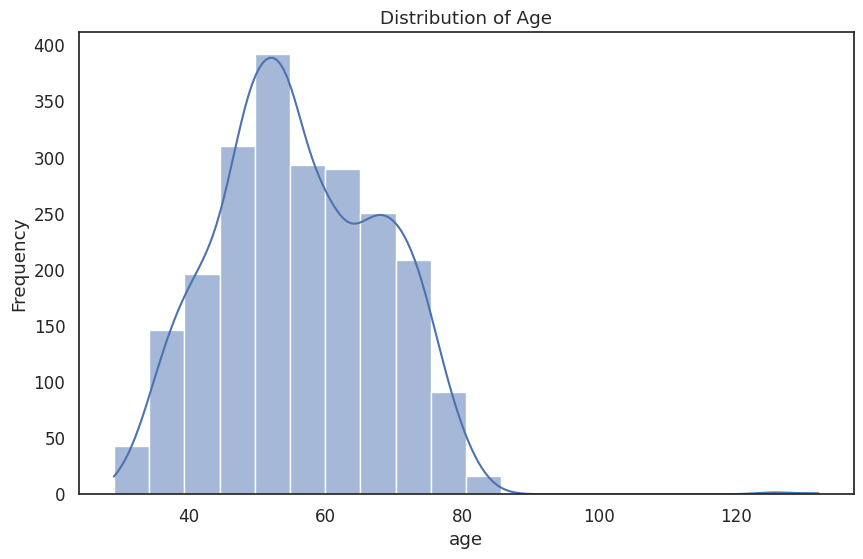

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(dfe['age'], bins=20, kde=True)  # Adjust bins as needed
plt.title('Distribution of Age')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
dfe.describe().T

count          mean           std        min  \
unnamed: 0           2240.0  1.119500e+03  6.467766e+02        0.0   
id                   2240.0  5.592160e+03  3.246662e+03        0.0   
year_birth           2240.0  1.968806e+03  1.198407e+01     1893.0   
income               2240.0  5.223798e+07  2.503796e+07  1730000.0   
kidhome              2240.0  4.441964e-01  5.383981e-01        0.0   
teenhome             2240.0  5.062500e-01  5.445382e-01        0.0   
recency              2240.0  4.910938e+01  2.896245e+01        0.0   
mntcoke              2240.0  3.039357e+05  3.365974e+05        0.0   
mntfruits            2240.0  2.630223e+04  3.977343e+04        0.0   
mntmeatproducts      2240.0  1.669500e+05  2.257154e+05        0.0   
mntfishproducts      2240.0  3.752545e+04  5.462898e+04        0.0   
mntsweetproducts     2240.0  2.706295e+04  4.128050e+04        0.0   
mntgoldprods         2240.0  4.402188e+04  5.216744e+04        0.0   
numdealspurchases    2240.0  2.325000e+00  1.932238e+00        0.0   
numwebpurchases      2240.0  4.084821e+00  2.778714e+00        0.0   
numcatalogpurchases  2240.0  2.662054e+00  2.923101e+00        0.0   
numstorepurchases    2240.0  5.790179e+00  3.250958e+00        0.0   
numwebvisitsmonth    2240.0  5.316518e+00  2.426645e+00        0.0   
acceptedcmp3         2240.0  7.276786e-02  2.598131e-01        0.0   
acceptedcmp4         2240.0  7.455357e-02  2.627283e-01        0.0   
acceptedcmp5         2240.0  7.276786e-02  2.598131e-01        0.0   
acceptedcmp1         2240.0  6.428571e-02  2.453160e-01        0.0   
acceptedcmp2         2240.0  1.339286e-02  1.149756e-01        0.0   
complain             2240.0  9.375000e-03  9.639117e-02        0.0   
z_costcontact        2240.0  3.000000e+00  0.000000e+00        3.0   
z_revenue            2240.0  1.100000e+01  0.000000e+00       11.0   
response             2240.0  1.491071e-01  3.562736e-01        0.0   
age                  2240.0  5.619420e+01  1.198407e+01       29.0   

                             25%         50%          75%          max  
unnamed: 0                559.75      1119.5      1679.25       2239.0  
id                       2828.25      5458.5      8427.75      11191.0  
year_birth               1959.00      1970.0      1977.00       1996.0  
income               35538750.00  51381500.0  68289750.00  666666000.0  
kidhome                     0.00         0.0         1.00          2.0  
teenhome                    0.00         0.0         1.00          2.0  
recency                    24.00        49.0        74.00         99.0  
mntcoke                 23750.00    173500.0    504250.00    1493000.0  
mntfruits                1000.00      8000.0     33000.00     199000.0  
mntmeatproducts         16000.00     67000.0    232000.00    1725000.0  
mntfishproducts          3000.00     12000.0     50000.00     259000.0  
mntsweetproducts         1000.00      8000.0     33000.00     263000.0  
mntgoldprods             9000.00     24000.0     56000.00     362000.0  
numdealspurchases           1.00         2.0         3.00         15.0  
numwebpurchases             2.00         4.0         6.00         27.0  
numcatalogpurchases         0.00         2.0         4.00         28.0  
numstorepurchases           3.00         5.0         8.00         13.0  
numwebvisitsmonth           3.00         6.0         7.00         20.0  
acceptedcmp3                0.00         0.0         0.00          1.0  
acceptedcmp4                0.00         0.0         0.00          1.0  
acceptedcmp5                0.00         0.0         0.00          1.0  
acceptedcmp1                0.00         0.0         0.00          1.0  
acceptedcmp2                0.00         0.0         0.00          1.0  
complain                    0.00         0.0         0.00          1.0  
z_costcontact               3.00         3.0         3.00          3.0  
z_revenue                  11.00        11.0        11.00         11.0  
response            

Terlihat bahwa adanya umur yang tidak normal yaitu dengan konsumen yang memounyai umur 132 tahun, Namun dalam kasus ini akan tetap saya simpan dengan kemungkinan akun digunakan oleh keluarganya.

In [ ]:
# Mengelompokkan pelanggan ke dalam kategori umur
# Young Adults: usia 28–39, Middle-aged Adults: usia 40–59, Old Adults: usia 60 ke atas
age_grouping = [
    (dfe['age'] >= 60),
    (dfe['age'] >= 40) & (dfe['age'] < 60),
    (dfe['age'] >= 28) & (dfe['age'] < 40)
]
age_category = ['Old Adults', 'Middled-aged Adults', 'Young Adults']
# Explicitly set the default value to an empty string to match the type of age_category
dfe['age_group'] = np.select(age_grouping, age_category, default='')

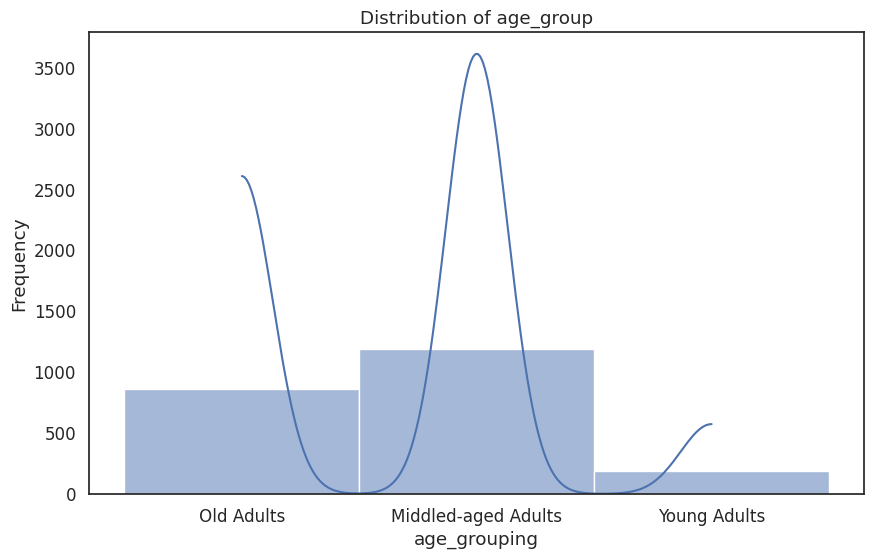

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(dfe['age_group'], bins=20, kde=True)  # Adjust bins as needed
plt.title('Distribution of age_group')
plt.xlabel('age_grouping')
plt.ylabel('Frequency')
plt.show()

#### **Total Children**

Jumlah anak yang dihitung dari kolom Kidhome (jumlah anak di rumah) dan Teenhome (jumlah remaja di rumah).

In [ ]:
dfe['total_children'] = dfe['kidhome'] + dfe['teenhome']

#### **Total Spent**
Total pengeluaran customer untuk berbagai produk seperti Coke, Fish Products, Fruits, dll.

In [ ]:
dfe['total_spent'] = dfe[['mntcoke', 'mntfishproducts', 'mntfruits', 'mntmeatproducts', 'mntsweetproducts', 'mntgoldprods']].sum(axis=1)

#### **Total Purchases**
Total transaksi yang dilakukan oleh customer melalui berbagai channel (deals, web, catalog, store).

In [ ]:
dfe['total_purchases'] = dfe[['numdealspurchases', 'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases']].sum(axis=1)

#### **Total Responses**
Total respon customer terhadap kampanye (AcceptedCmp1, AcceptedCmp2, dll.)

In [ ]:
dfe['total_responses'] = dfe[['acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'response']].sum(axis=1)

#### **Conversion Rate**
Rasio konversi dihitung berdasarkan Total Respon terhadap jumlah web visits.

In [ ]:
def safe_div(x, y):
    return 0 if y == 0 else x / y

dfe['conversion_rate'] = dfe.apply(lambda x: safe_div(x['total_responses'], x['numwebvisitsmonth']), axis=1)

#### **Tenure Days & Tenure Group**
Tenure (lama waktu berlangganan) customer dihitung berdasarkan tanggal pertama kali mereka mendaftar.

In [ ]:
print(dfe['dt_customer'].head())

0    04-09-2012
1    08-03-2014
2    21-08-2013
3    10-02-2014
4    19-01-2014
Name: dt_customer, dtype: object


In [ ]:
dfe['dt_customer'] = pd.to_datetime(dfe['dt_customer'], format='%d-%m-%Y') # Changed the format to day-month-year
dfe['tenure_days'] = (pd.to_datetime('2025-01-01') - dfe['dt_customer']).dt.days

dfe['tenure_group'] = pd.qcut(dfe['tenure_days'], q=5, labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'])

#### **Income Level**
Kategori penghasilan customer berdasarkan bin yang telah didefinisikan (Low, Moderate, High, Very High).

In [ ]:
dfe['income'].describe()


count    2.240000e+03
mean     5.223798e+07
std      2.503796e+07
min      1.730000e+06
25%      3.553875e+07
50%      5.138150e+07
75%      6.828975e+07
max      6.666660e+08
Name: income, dtype: float64

In [ ]:
income_bins = [0, 35000000, 51000000, 70000000, np.inf]
income_labels = ['Low Income', 'Moderate Income', 'High Income', 'Very High Income']
dfe['income_level'] = pd.cut(dfe['income'], bins=income_bins, labels=income_labels, include_lowest=True)

#### **Recency Group**
Kelompokkan customer berdasarkan recency mereka (Recent, Moderate, Less Recent, Inactive).

In [ ]:
dfe['recency'].describe()

count    2240.000000
mean       49.109375
std        28.962453
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: recency, dtype: float64

In [ ]:
recency_bins = [0, 30, 60, 90, 100]
recency_labels = ['Recent', 'Moderate', 'Less Recent', 'Inactive']
dfe['recency_group'] = pd.cut(dfe['recency'], bins=recency_bins, labels=recency_labels, include_lowest=True)

#### **Channel Preference**


In [ ]:
def most_used_channel(row):
    channels = {
        'Web': row['numwebpurchases'],
        'Catalog': row['numcatalogpurchases'],
        'Store': row['numstorepurchases']
    }
    return max(channels, key=channels.get)

dfe['channel_preference'] = dfe.apply(most_used_channel, axis=1)

In [ ]:
categorical_col_dfe = dfe.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_col_dfe = dfe.select_dtypes(include=['number']).columns.tolist()

print("Categorical columns: ", categorical_col_dfe)
print("Numerical columns: ", numerical_col_dfe)

Categorical columns:  ['education', 'marital_status', 'age_group', 'tenure_group', 'income_level', 'recency_group', 'channel_preference']
Numerical columns:  ['unnamed: 0', 'id', 'year_birth', 'income', 'kidhome', 'teenhome', 'recency', 'mntcoke', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods', 'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1', 'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response', 'age', 'total_children', 'total_spent', 'total_purchases', 'total_responses', 'conversion_rate', 'tenure_days']


In [ ]:
# recheck missing values
check_nan(dfe)

In [ ]:
print(dfe['total_responses'].unique())


[1 0 3 2 4 5]


In [ ]:
display(dfe[['id','age', 'age_group', 'total_children', 'total_spent', 'total_purchases', 'total_responses', 'conversion_rate', 'tenure_days','tenure_group', 'income_level', 'recency_group', 'channel_preference']].head())


id  age            age_group  total_children  total_spent  \
0  5524   68           Old Adults               0      1617000   
1  2174   71           Old Adults               2        27000   
2  4141   60           Old Adults               0       776000   
3  6182   41  Middled-aged Adults               1        53000   
4  5324   44  Middled-aged Adults               1       422000   

   total_purchases  total_responses  conversion_rate  tenure_days  \
0               25                1         0.142857         4502   
1                6                0         0.000000         3952   
2               21                0         0.000000         4151   
3                8                0         0.000000         3978   
4               19                0         0.000000         4000   

  tenure_group      income_level recency_group channel_preference  
0    Very Long       High Income      Moderate            Catalog  
1   Very Short   Moderate Income      Moderate              Store  
2       Medium  Very High Income        Recent              Store  
3   Very Short        Low Income        Recent              Store  
4        Short       High Income      Inactive              Store

## **EDA**

### **Univariate Analysis**

#### **Outlier Check**

In [ ]:
# Get numerical columns from the DataFrame 'df'
num_columns = dfe.select_dtypes(include=['number']).columns

# Now you can use 'num_columns' as intended
num_columns # numerical columns

Index(['unnamed: 0', 'id', 'year_birth', 'income', 'kidhome', 'teenhome',
       'recency', 'mntcoke', 'mntfruits', 'mntmeatproducts', 'mntfishproducts',
       'mntsweetproducts', 'mntgoldprods', 'numdealspurchases',
       'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases',
       'numwebvisitsmonth', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5',
       'acceptedcmp1', 'acceptedcmp2', 'complain', 'z_costcontact',
       'z_revenue', 'response', 'age', 'total_children', 'total_spent',
       'total_purchases', 'total_responses', 'conversion_rate', 'tenure_days'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

def plot_outliers(dfe, num_cols, cols_per_row=4, row_height=4, col_width=5):
    total = len(num_cols)
    rows = math.ceil(total / cols_per_row)
    figsize = (col_width * cols_per_row, row_height * rows)

    plt.style.use('default')  # Background putih
    fig, axes = plt.subplots(rows, cols_per_row, figsize=figsize)
    axes = axes.flatten()

    for i, col in enumerate(num_cols):
        sns.boxplot(y=dfe[col], ax=axes[i], color='steelblue', linewidth=1)
        axes[i].set_title(f'{col}', fontsize=10)
        axes[i].set_ylabel('')
        axes[i].grid(True, linestyle='--', alpha=0.5)

    # Hapus subplot kosong
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.suptitle('Boxplots of Numerical Features', fontsize=14, y=1.02)
    plt.show()

In [ ]:
dfe

unnamed: 0     id  year_birth education marital_status      income  \
0              0   5524        1957        S1         Lajang  58138000.0   
1              1   2174        1954        S1         Lajang  46344000.0   
2              2   4141        1965        S1    Bertunangan  71613000.0   
3              3   6182        1984        S1    Bertunangan  26646000.0   
4              4   5324        1981        S3        Menikah  58293000.0   
...          ...    ...         ...       ...            ...         ...   
2235        2235  10870        1967        S1        Menikah  61223000.0   
2236        2236   4001        1946        S3    Bertunangan  64014000.0   
2237        2237   7270        1981        S1          Cerai  56981000.0   
2238        2238   8235        1956        S2    Bertunangan  69245000.0   
2239        2239   9405        1954        S3        Menikah  52869000.0   

      kidhome  teenhome dt_customer  recency  mntcoke  mntfruits  \
0           0         0  2012-09-04       58   635000      88000   
1           1         1  2014-03-08       38    11000       1000   
2           0         0  2013-08-21       26   426000      49000   
3           1         0  2014-02-10       26    11000       4000   
4           1         0  2014-01-19       94   173000      43000   
...       ...       ...         ...      ...      ...        ...   
2235        0         1  2013-06-13       46   709000      43000   
2236        2         1  2014-06-10       56   406000          0   
2237        0         0  2014-01-25       91   908000      48000   
2238        0         1  2014-01-24        8   428000      30000   
2239        1         1  2012-10-15       40    84000       3000   

      mntmeatproducts  mntfishproducts  mntsweetproducts  mntgoldprods  \
0              546000           172000             88000         88000   
1                6000             2000              1000          6000   
2              127000           111000             21000         42000   
3               20000            10000              3000          5000   
4              118000            46000             27000         15000   
...               ...              ...               ...           ...   
2235           182000            42000            118000        247000   
2236            30000                0                 0          8000   
2237           217000            32000             12000         24000   
2238           214000            80000             30000         61000   
2239            61000             2000              1000         21000   

      numdealspurchases  numwebpurchases  numcatalogpurchases  \
0                     3                8                   10   
1                     2                1                    1   
2                     1                8                    2   
3                     2                2                    0   
4                     5                5                    3   
...                 ...              ...                  ...   
2235                  2                9                    3   
2236                  7                8                    2   
2237                  1                2                    3   
2238                  2                6                    5   
2239                  3                3                    1   

      numstorepurchases  numwebvisitsmonth  acceptedcmp3  acceptedcmp4  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
...                 ...                ...           ...           ...   
2235                  4                  5             0             0   
2236          

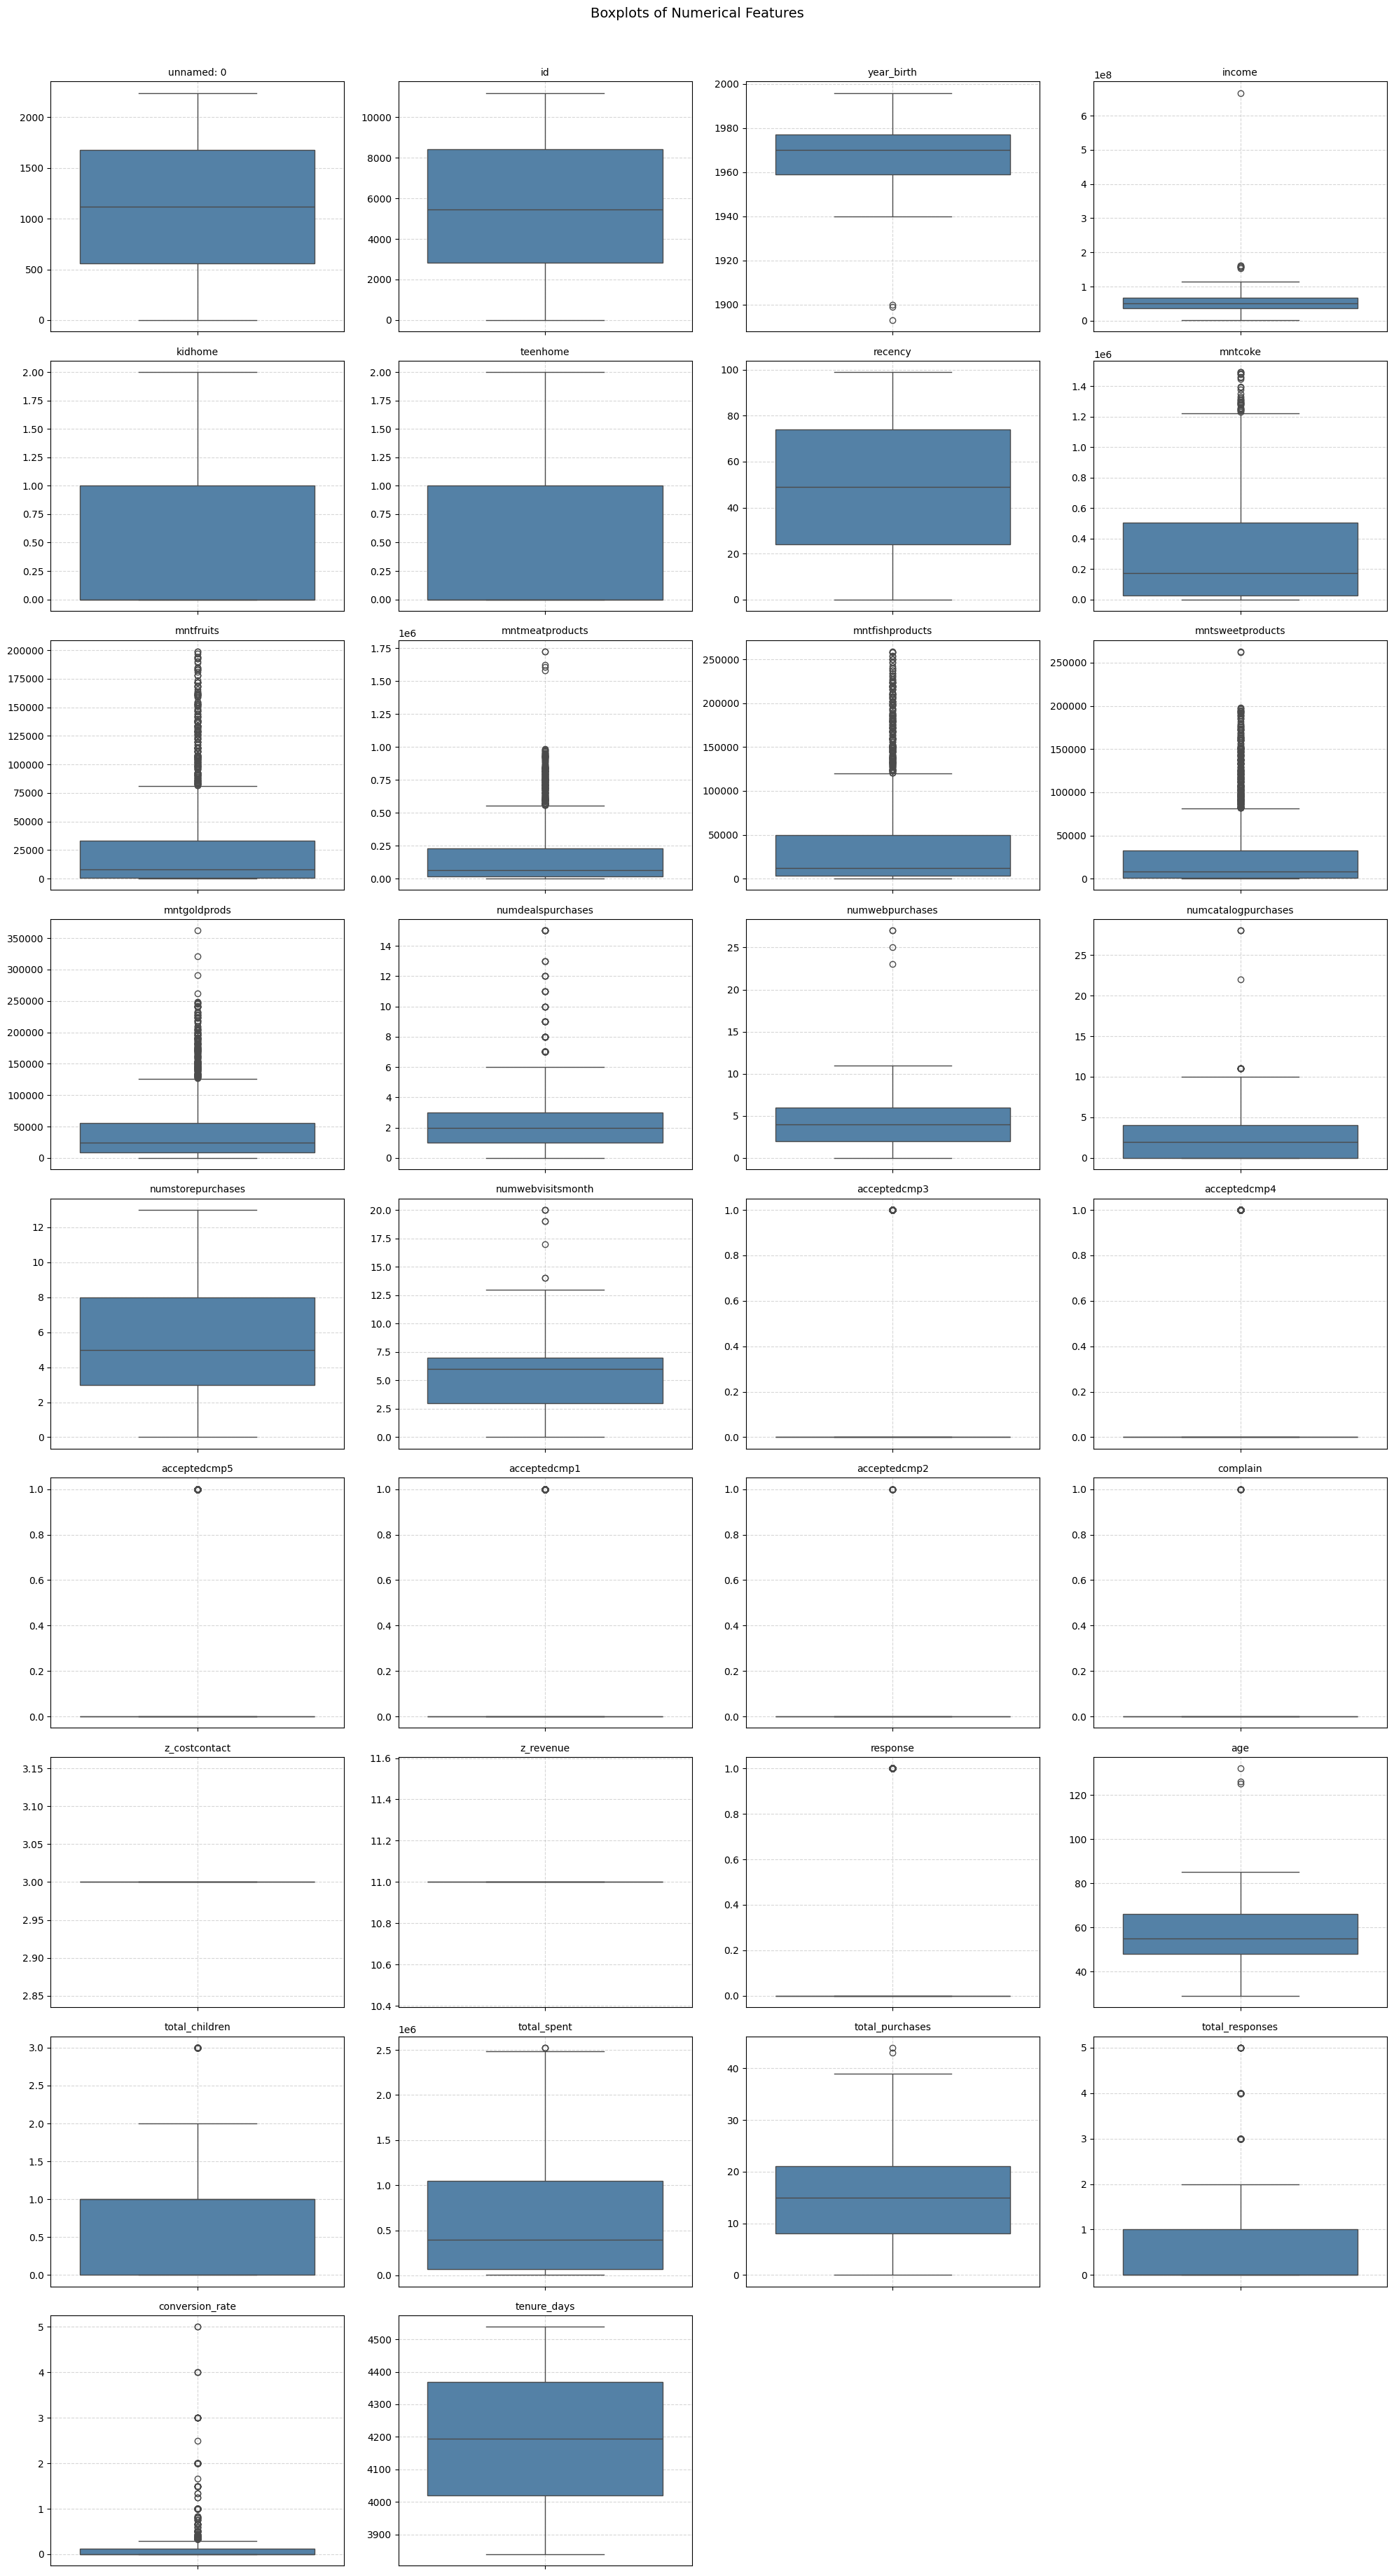

In [ ]:
# function call
plot_outliers(dfe, num_columns)

In [ ]:
def outliers_info(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    count = ((series < lower_bound) | (series > upper_bound)).sum()
    return count, upper_bound, lower_bound

In [ ]:
def print_outliers(dfe, num_cols):
    outliers_dict = {}  # store the column name and the number of outliers present

    for col in num_cols:
        count, upper, lower = outliers_info(dfe[col])  # gunakan variabel baru

        if count > 0:
            outliers_dict[col] = count  # simpan hanya kolom yang punya outlier

    # Sort hasilnya dari yang paling banyak outlier
    sorted_outliers = dict(sorted(outliers_dict.items(), key=lambda item: item[1], reverse=True))

    # Tampilkan
    for col, val in sorted_outliers.items():
        print(f'Total outliers in {col}: {val} ({((val/len(df)) * 100):.2f}%)')

    print(f'\nTotal columns with outliers: {len(sorted_outliers)} out of {len(num_cols)}')

In [ ]:
print_outliers(dfe, num_columns)

Total outliers in response: 334 (14.91%)
Total outliers in conversion_rate: 294 (13.12%)
Total outliers in mntsweetproducts: 248 (11.07%)
Total outliers in mntfruits: 227 (10.13%)
Total outliers in mntfishproducts: 223 (9.96%)
Total outliers in mntgoldprods: 207 (9.24%)
Total outliers in mntmeatproducts: 175 (7.81%)
Total outliers in acceptedcmp4: 167 (7.46%)
Total outliers in acceptedcmp3: 163 (7.28%)
Total outliers in acceptedcmp5: 163 (7.28%)
Total outliers in acceptedcmp1: 144 (6.43%)
Total outliers in total_responses: 97 (4.33%)
Total outliers in numdealspurchases: 86 (3.84%)
Total outliers in total_children: 53 (2.37%)
Total outliers in mntcoke: 35 (1.56%)
Total outliers in acceptedcmp2: 30 (1.34%)
Total outliers in numcatalogpurchases: 23 (1.03%)
Total outliers in complain: 21 (0.94%)
Total outliers in income: 8 (0.36%)
Total outliers in numwebvisitsmonth: 8 (0.36%)
Total outliers in numwebpurchases: 4 (0.18%)
Total outliers in year_birth: 3 (0.13%)
Total outliers in age: 3 (0.1

* Outlier yang tinggi seperti pada kolom TotalAcceptedCmp, Response, dan

* pengeluaran untuk produk tertentu bisa menunjukkan adanya perbedaan yang signifikan dalam perilaku pelanggan yang perlu dianalisis lebih lanjut.

* Outlier pada kampanye dan pembelian dapat menunjukkan adanya pelanggan dengan tingkat keterlibatan yang sangat tinggi, yang perlu dianalisis lebih lanjut apakah ini wajar atau ada masalah dalam data.

* Outlier yang rendah pada kolom seperti Income, Year_Birth, dan NumWebVisitsMonth menunjukkan data yang cukup homogen, namun tetap ada beberapa nilai ekstrem yang perlu diperhatikan, meskipun jumlahnya sangat kecil.

**Tindakan yang bisa diambil:**

* Menghapus outlier: Jika outlier tidak relevan atau diduga merupakan kesalahan data, bisa dipertimbangkan untuk menghapusnya.

* Transformasi data: Menggunakan teknik transformasi data seperti log-transformation untuk mereduksi pengaruh outlier pada model prediktif.

* Penyelidikan lebih lanjut: Untuk outlier yang masuk akal, bisa menjadi wawasan untuk mengidentifikasi pelanggan yang memiliki perilaku berbeda, seperti pelanggan yang sangat responsif terhadap kampanye atau pelanggan dengan pengeluaran yang sangat tinggi.

#### **Data Distribution Numeric & Categoric**

In [ ]:
from scipy.stats import skew, kurtosis
import pandas as pd

num_cols = dfe.select_dtypes(include=np.number).columns.tolist()

skew_type_list = []
skew_val_list = []
kurtosis_val_list = []

for column in num_cols:
    data = dfe[column].dropna(axis=0)
    mean = round(data.mean(), 3)
    median = data.median()
    mode = data.mode()[0]
    skew_val = round(skew(data, nan_policy="omit"), 3)
    kurtosis_val = round(kurtosis(data, nan_policy="omit"), 3)

    if (mean == median == mode) or (-0.2 < skew_val < 0.2):
        skew_type = "Normal Distribution (Symmetric)"
    elif mean < median < mode:
        skew_type = "Negatively Skewed"
        if skew_val <= -1:
            skew_type = "Highly Negatively Skewed"
        elif -0.5 >= skew_val > -1:
            skew_type = "Moderately Negatively Skewed"
        else:
            skew_type = "Moderately Normal Distribution (Symmetric)"
    else:
        skew_type = "Positively Skewed"
        if skew_val >= 1:
            skew_type = "Highly Positively Skewed"
        elif 0.5 <= skew_val < 1:
            skew_type = "Moderately Positively Skewed"
        else:
            skew_type = "Moderately Normal Distribution (Symmetric)"

    skew_type_list.append(skew_type)
    skew_val_list.append(skew_val)
    kurtosis_val_list.append(kurtosis_val)

dist = pd.DataFrame({
    "Column Name": num_cols,
    "Skewness": skew_val_list,
    "Kurtosis": kurtosis_val_list,
    "Type of Distribution": skew_type_list
})

dist = dist.sort_values(["Type of Distribution", "Column Name"]).reset_index(drop=True)
dist

Column Name  Skewness  Kurtosis  \
0          acceptedcmp1     3.553    10.624   
1          acceptedcmp2     8.466    69.680   
2          acceptedcmp3     3.289     8.821   
3          acceptedcmp4     3.239     8.494   
4          acceptedcmp5     3.289     8.821   
5              complain    10.182   101.676   
6       conversion_rate     5.176    35.470   
7                income     6.796   161.037   
8               mntcoke     1.175     0.595   
9       mntfishproducts     1.918     3.087   
10            mntfruits     2.101     4.039   
11         mntgoldprods     1.885     3.541   
12      mntmeatproducts     2.082     5.502   
13     mntsweetproducts     2.135     4.364   
14  numcatalogpurchases     1.880     8.027   
15    numdealspurchases     2.417     8.914   
16      numwebpurchases     1.382     5.688   
17             response     1.970     1.882   
18      total_responses     2.439     6.327   
19                  age     0.350     0.713   
20    numwebvisitsmonth     0.208     1.815   
21             teenhome     0.407    -0.987   
22       total_children     0.416    -0.249   
23      total_purchases     0.252    -0.894   
24           year_birth    -0.350     0.713   
25              kidhome     0.635    -0.781   
26    numstorepurchases     0.702    -0.623   
27          total_spent     0.860    -0.344   
28                   id     0.040    -1.190   
29              recency    -0.002    -1.202   
30          tenure_days    -0.015    -1.195   
31           unnamed: 0     0.000    -1.200   
32        z_costcontact       NaN       NaN   
33            z_revenue       NaN       NaN   

                          Type of Distribution  
0                     Highly Positively Skewed  
1                     Highly Positively Skewed  
2                     Highly Positively Skewed  
3                     Highly Positively Skewed  
4                     Highly Positively Skewed  
5                     Highly Positively Skewed  
6                     Highly Positively Skewed  
7                     Highly Positively Skewed  
8                     Highly Positively Skewed  
9                     Highly Positively Skewed  
10                    Highly Positively Skewed  
11                    Highly Positively Skewed  
12                    Highly Positively Skewed  
13                    Highly Positively Skewed  
14                    Highly Positively Skewed  
15                    Highly Positively Skewed  
16                    Highly Positively Skewed  
17                    Highly Positively Skewed  
18                    Highly Positively Skewed  
19  Moderately Normal Distribution (Symmetric)  
20  Moderately Normal Distribution (Symmetric)  
21  Moderately Normal Distribution (Symmetric)  
22  Moderately Normal Distribution (Symmetric)  
23  Moderately Normal Distribution (Symmetric)  
24  Moderately Normal Distribution (Symmetric)  
25                Moderately Positively Skewed  
26                Moderately Positively Skewed  
27                Moderately Positively Skewed  
28             Normal Distribution (Symmetric)  
29             Normal Distribution (Symmetric)  
30             Normal Distribution (Symmetric)  
31             Normal Distribution (Symmetric)  
32             Normal Distribution (Symmetric)  
33             Normal Distribution (Symmetric)

  	Total Null Values 	Percentage 	Data Type
income_level 	383 	17.098214 	object
recency_group 	28 	1.250000 	int64
income 	24 	1.071429 	int64

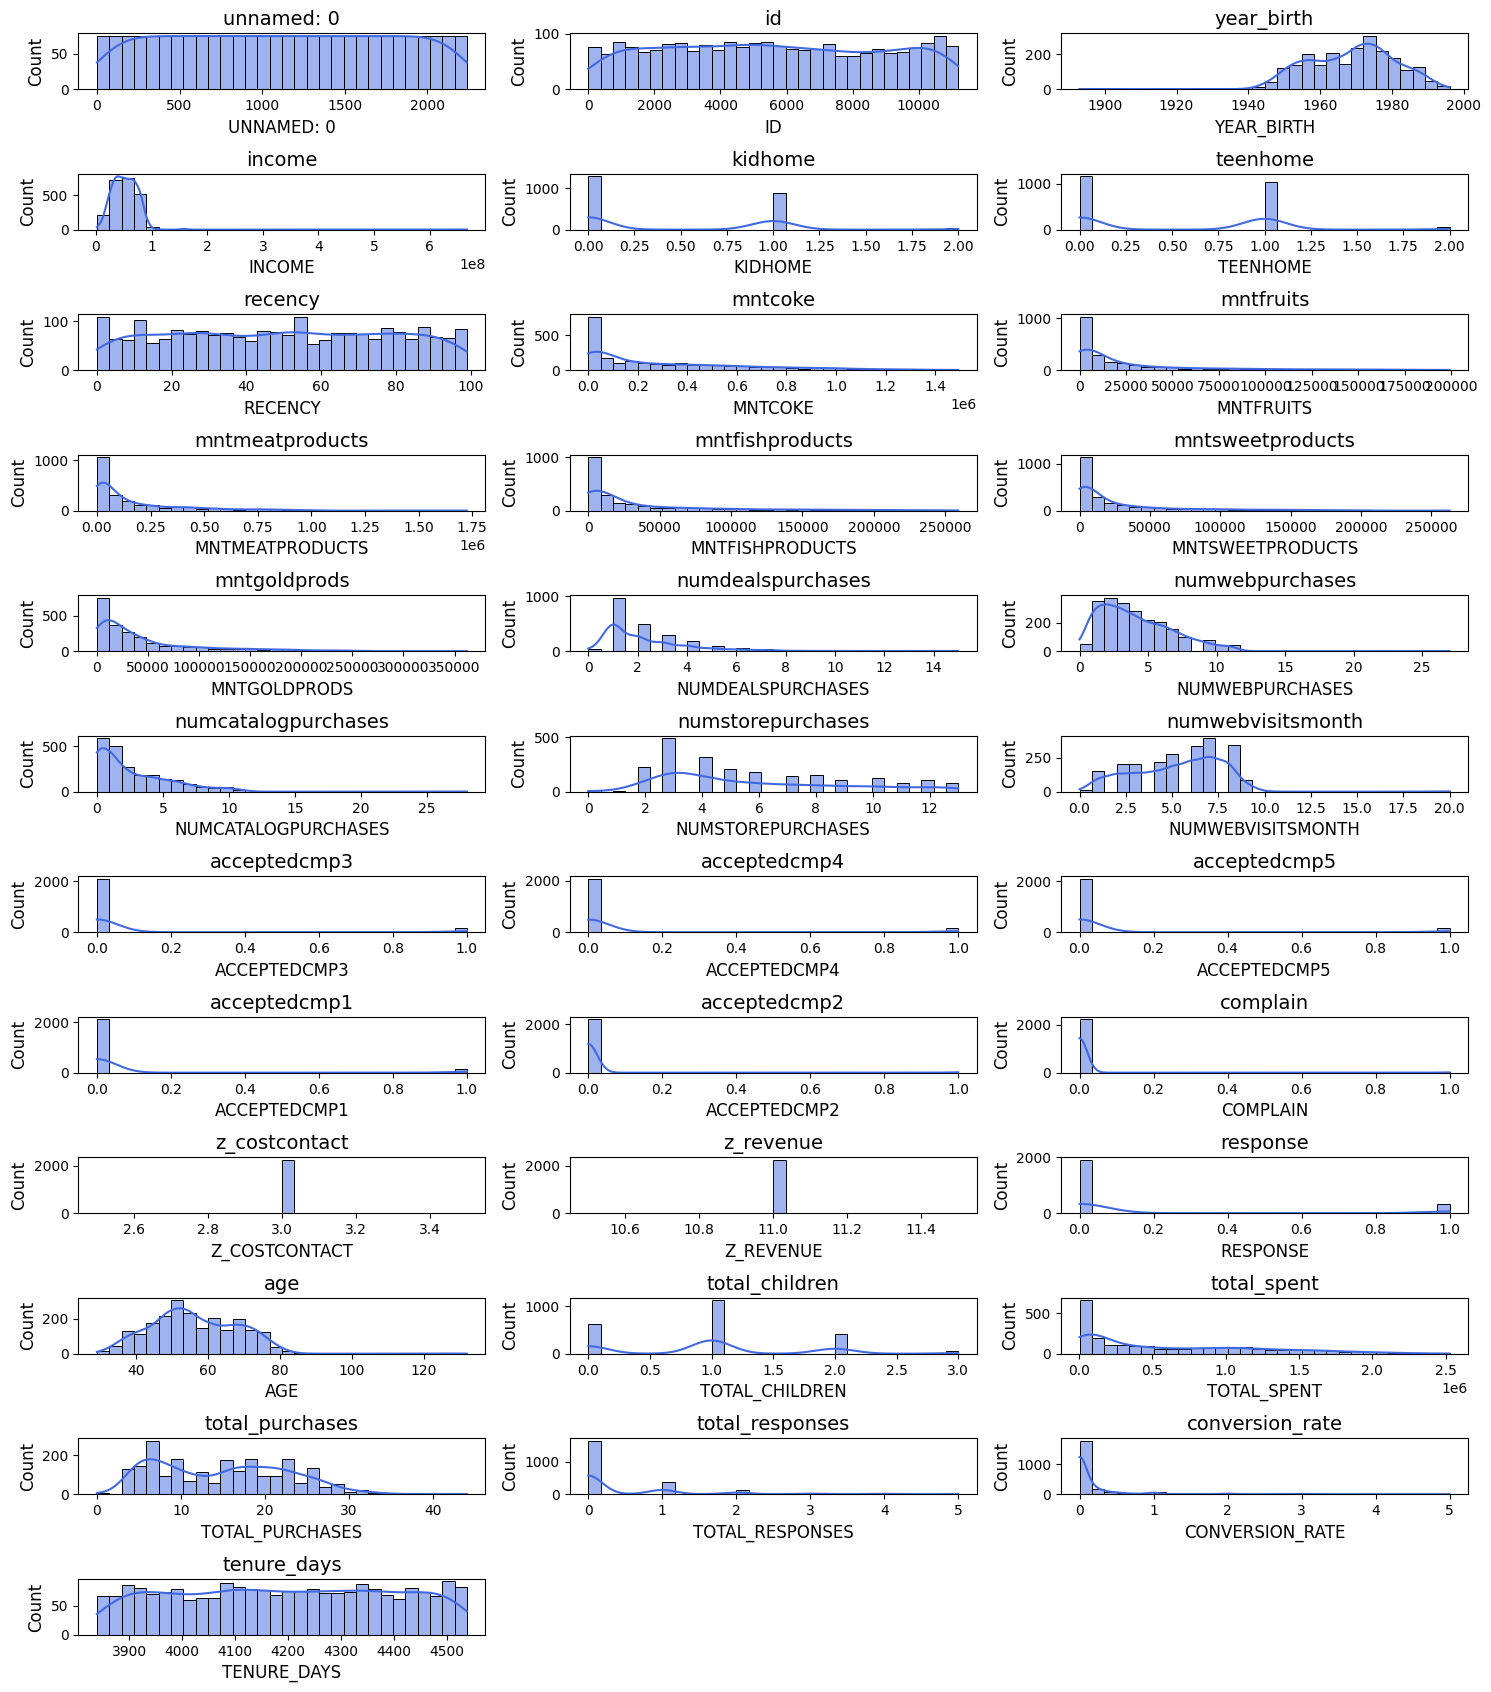

In [ ]:
# Menentukan ukuran figure
plt.figure(figsize=(15, 17))

numeric_filtered = dfe.select_dtypes(include=np.number)  # Define numeric_filtered here

# Menentukan jumlah plot yang akan dibuat
num_plots = len(numeric_filtered.columns)  # Pastikan 'numeric_filtered' berisi kolom numerik
num_rows = (num_plots + 2) // 3  # Menyesuaikan dengan jumlah kolom per baris

# Looping untuk membuat histogram + KDE plot per kolom
for index, column in enumerate(numeric_filtered.columns):
    plt.subplot(num_rows, 3, index + 1)  # Mengatur jumlah baris dan kolom
    plt.subplots_adjust(wspace=0.3, hspace=0.5)  # Menyesuaikan jarak antar plot

    # Membuat histogram dengan KDE
    sns.histplot(numeric_filtered[column], kde=True, color="royalblue", bins=30)

    # Mengatur judul dan label
    plt.title(column, fontsize=14)
    plt.xlabel(column.upper(), fontsize=12)
    plt.ylabel("Count", fontsize=12)

# Menyesuaikan tata letak plot
plt.tight_layout(pad=1.0)

# Menampilkan plot
plt.show()

### **Multivariate Analysis**

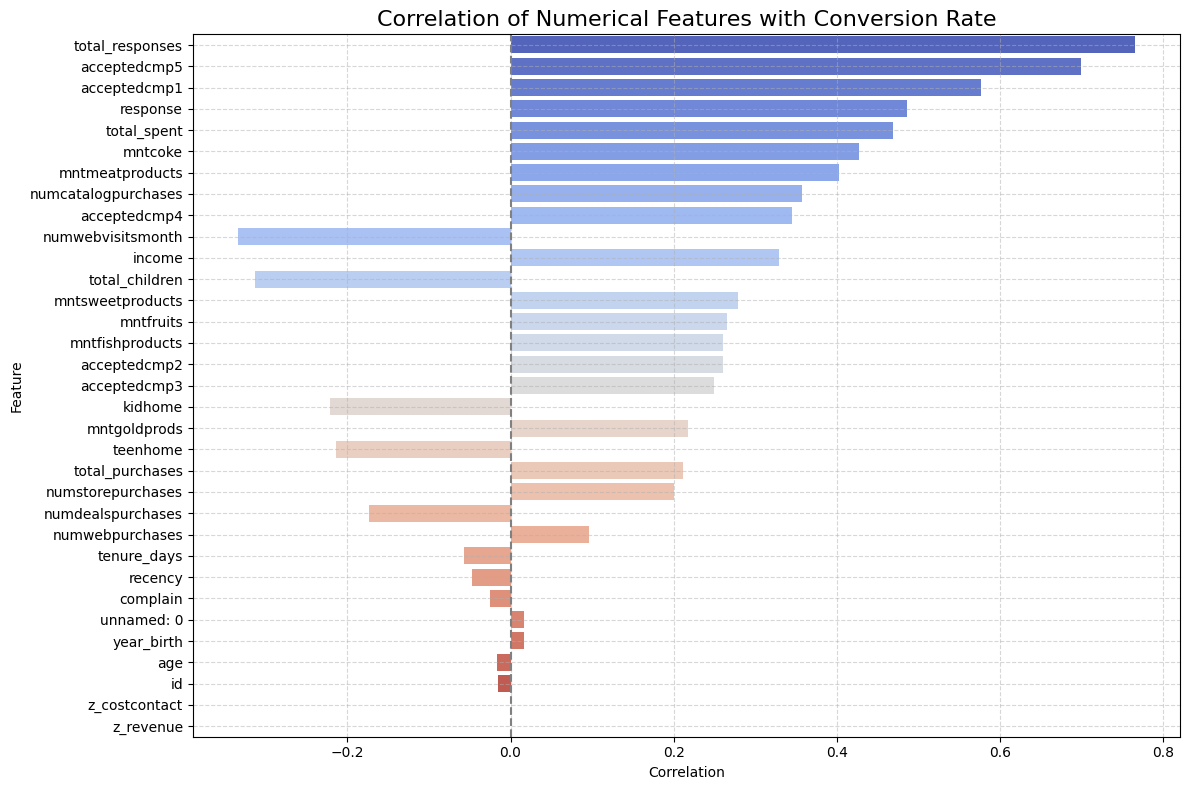

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil hanya kolom numerik
numeric_cols = dfe.select_dtypes(include='number')

# Hitung korelasi semua fitur numerik terhadap ConversionRate
corr_with_conversion = numeric_cols.corr()['conversion_rate'].drop('conversion_rate').sort_values(key=abs, ascending=False)

# Plot korelasi dalam bentuk barplot
plt.figure(figsize=(12, 8))
sns.barplot(x=corr_with_conversion.values, y=corr_with_conversion.index, palette='coolwarm')

plt.title('Correlation of Numerical Features with Conversion Rate', fontsize=16)
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.grid(True, linestyle='--', alpha=0.5)
plt.axvline(x=0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

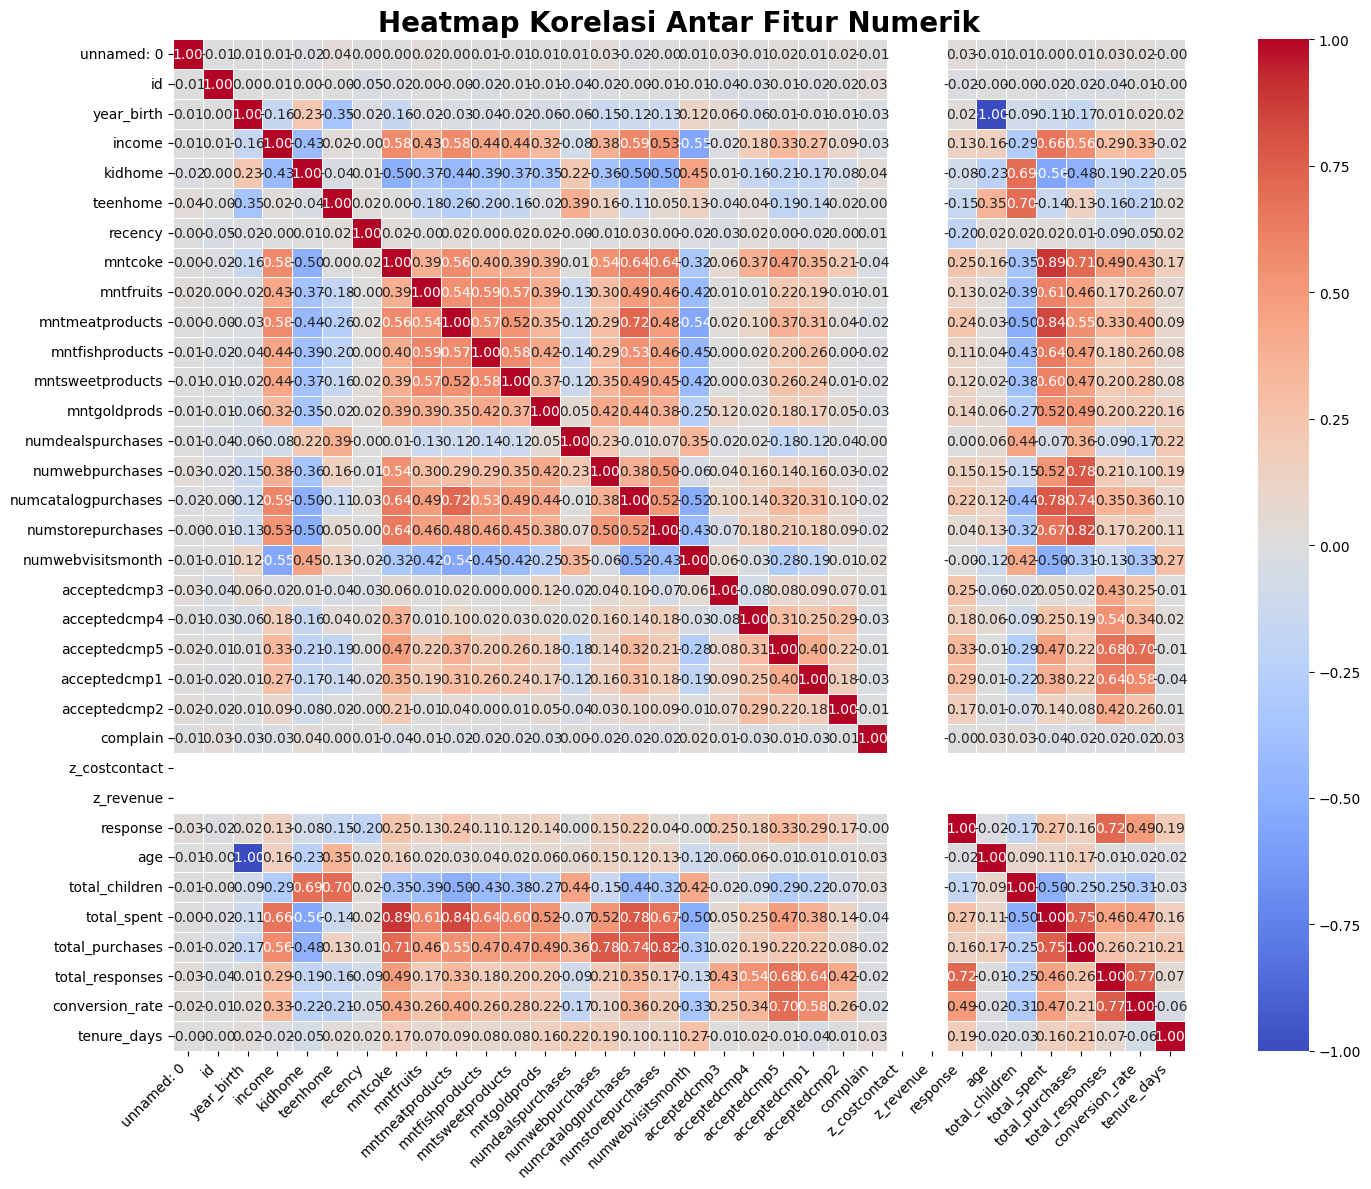

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ambil hanya kolom numerik
numeric_dfe = dfe.select_dtypes(include=np.number)

# Hitung korelasi
corr_matrix = numeric_dfe.corr()

# Buat heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True)

# Judul dan tampilan
plt.title("Heatmap Korelasi Antar Fitur Numerik", fontsize=20, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()


Berikut kolom yang bisa dihapus (pilihan optimal untuk clustering):

year_birth → sudah ada age

response → sudah tercakup di total_responses

total_purchases → sudah terwakili oleh komponen numwebpurchases, numstorepurchases, dst

mntmeatproducts → jika sudah ada mntgoldproducts, mntfishproducts, mntsweetproducts, dst

numcatalogpurchases atau numstorepurchases → jika terlalu mirip, pilih salah satu

total_spent → opsional hapus jika semua mnt*products masih digunakan


Fitur 1	Fitur 2	Korelasi	Catatan
year_birth	age	-1.00	Pilih salah satu, simpan age
response	total_responses	0.95	Simpan salah satu, total_responses cukup
total_spent	mntmeatproducts	0.84	Bisa pertimbangkan hapus salah satunya
total_purchases	numstorepurchases	0.84	Hati-hati, bisa drop total_purchases jika semua channel ada
conversion_rate	response	0.70	Masih aman, tidak perlu dihapus
mntsweetproducts	mntmeatproducts	0.86	Hapus salah satu jika fokusnya efisiensi
mntfishproducts	mntmeatproducts	0.85	Mirip seperti di atas

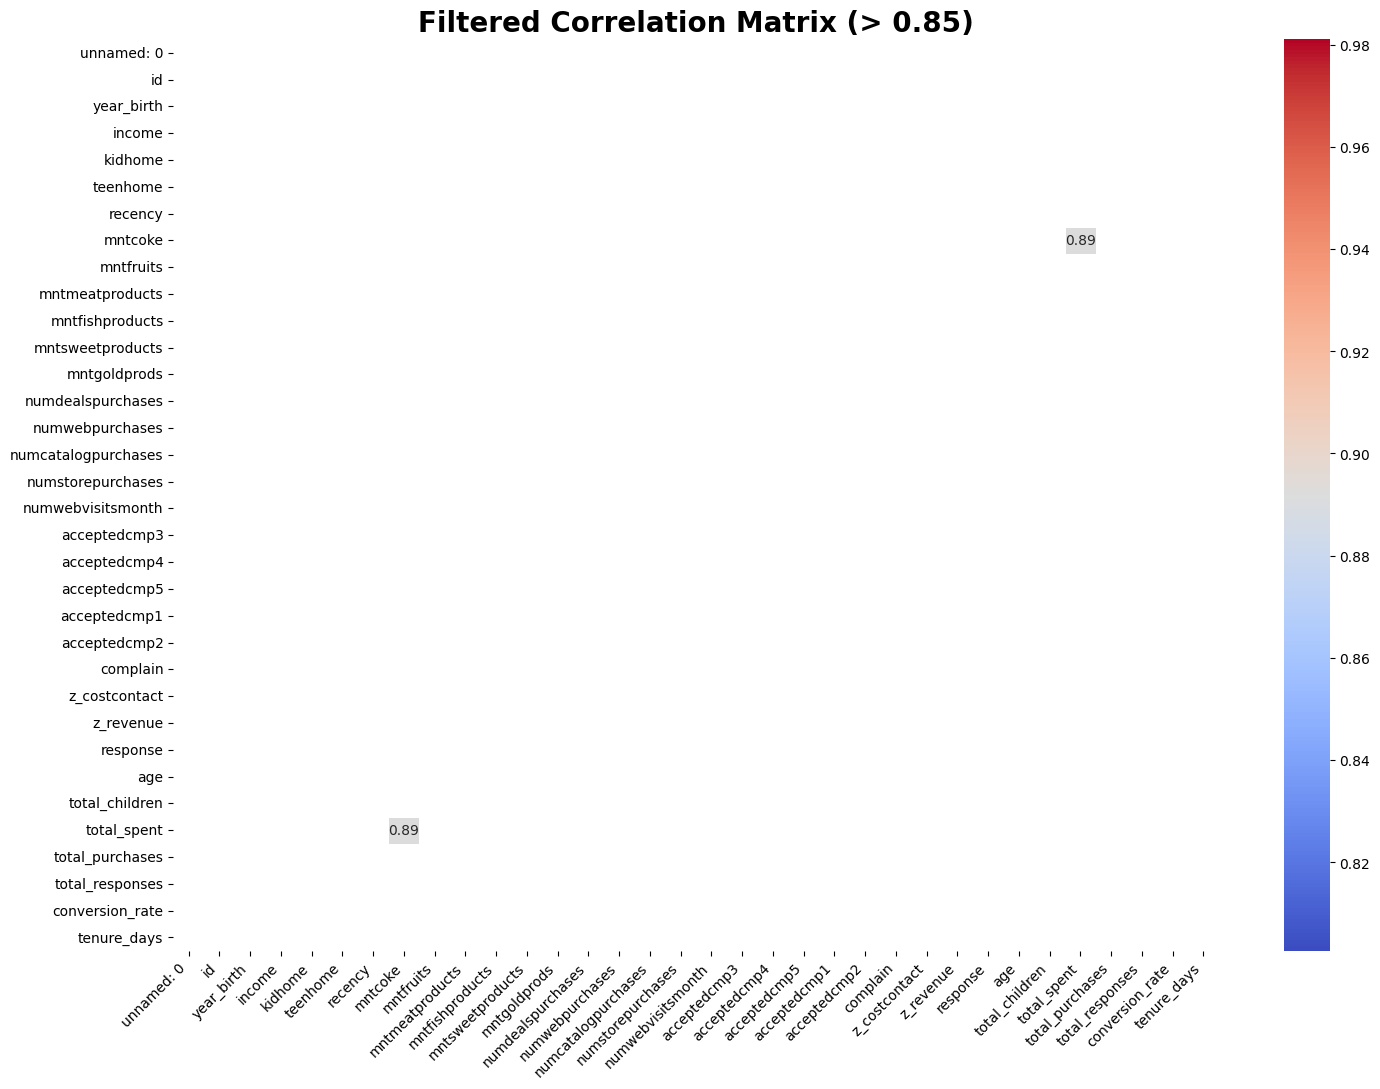

In [ ]:
# Ambil hanya kolom numerik dari data lo
numeric_dfe = dfe.select_dtypes(include=np.number)

# Hitung korelasi antar fitur numerik
num_corr = numeric_dfe.corr()

# Filter korelasi signifikan > 0.85 tapi < 1.0 (biar gak include diagonal 1.0)
filtered_corr = num_corr.where((num_corr > 0.85) & (num_corr < 1.0))

# Plot heatmap korelasi yang sudah difilter
plt.figure(figsize=(15, 11))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', mask=filtered_corr.isnull(), linewidths=0.5)
plt.title('Filtered Correlation Matrix (> 0.85)', fontsize=20, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### **Analysis Data & Business Insight**

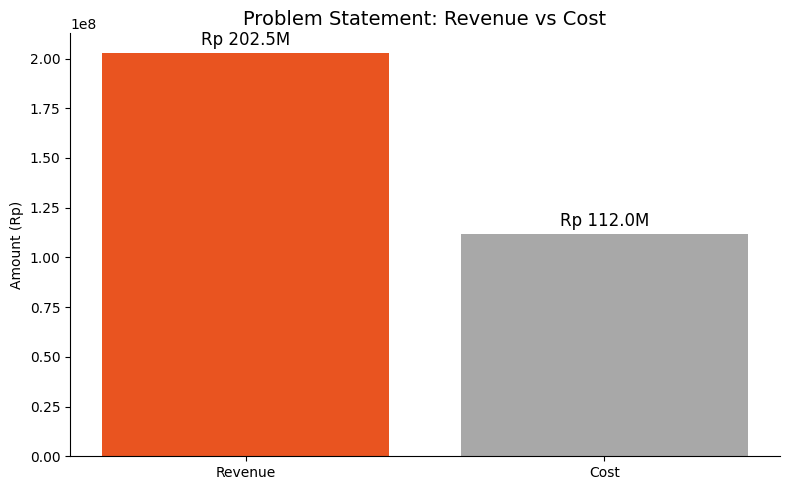

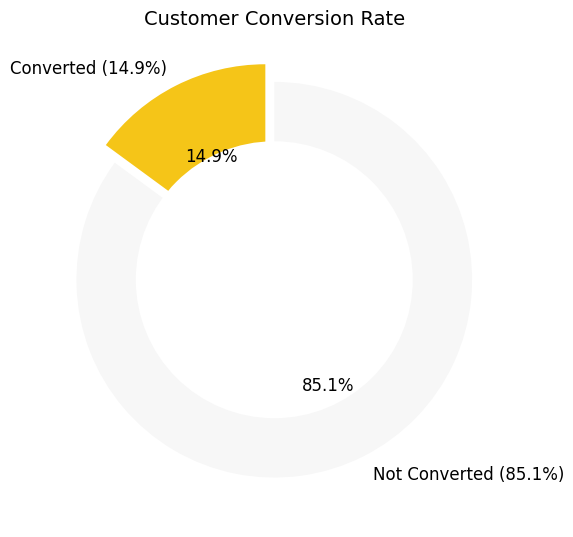

In [ ]:
# Biaya campaign per customer
cost_per_customer = 50000  # Rp

# Hitung jumlah customer
total_customers_before = len(dfe)

# Hitung rata-rata conversion rate & total spending
conversion_rate_before = dfe['conversion_rate'].mean()
avg_spending_before = dfe['total_spent'].mean()

# Hitung total revenue dan cost
total_revenue_before = conversion_rate_before * avg_spending_before * total_customers_before
total_cost_before = total_customers_before * cost_per_customer
roi_before = (total_revenue_before - total_cost_before) / total_cost_before

# --- Visualisasi Revenue vs Cost ---
labels = ['Revenue', 'Cost']
values = [total_revenue_before, total_cost_before]
colors = ['#e95420', '#a8a8a8']  # Oranye & abu-abu dari slide

plt.figure(figsize=(8, 5))

bars = plt.bar(labels, values, color=colors)

# Label nilai
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2e6, f'Rp {yval/1e6:.1f}M',
             ha='center', va='bottom', fontsize=12)

plt.title('Problem Statement: Revenue vs Cost', fontsize=14)
plt.ylabel('Amount (Rp)')

plt.grid(False)  #
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

# --- Visualisasi Conversion Rate Donut Chart ---
converted = conversion_rate_before
not_converted = 1 - converted
sizes = [converted, not_converted]
labels = [f'Converted ({converted*100:.1f}%)', f'Not Converted ({not_converted*100:.1f}%)']
colors = ['#f5c518', '#f7f7f7']  # Kuning & putih

explode = (0.1, 0)

plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(sizes,
                                   labels=labels,
                                   colors=colors,
                                   startangle=90,
                                   autopct='%1.1f%%',
                                   explode=explode,
                                   textprops={'fontsize': 12})

centre_circle = plt.Circle((0,0),0.70,fc='white')
plt.gca().add_artist(centre_circle)

plt.title('Customer Conversion Rate', fontsize=14)
plt.tight_layout()
plt.show()



#### **Customer Demographics**

1. Conversion Rate vs Age Group
2. Conversion Rate vs Education

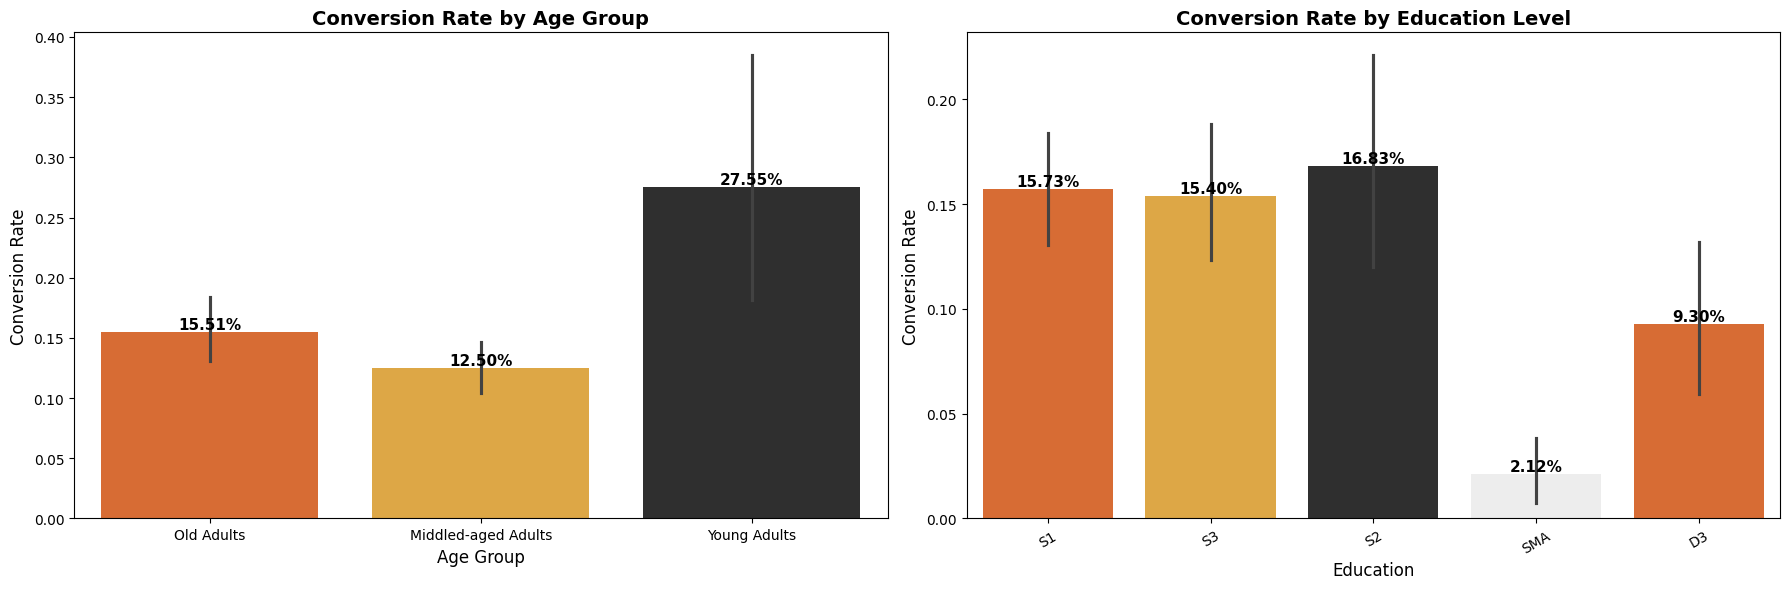

In [ ]:
# Palet warna yang disesuaikan dengan slide presentasi
custom_palette = ['#F26419', '#F6AE2D', '#2F2F2F', '#EDEDED']  # oranye, kuning, abu gelap, abu terang

# Mengatur ukuran figure
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Subplot 1: Conversion Rate by Age Group
sns.barplot(data=dfe, x='age_group', y='conversion_rate', palette=custom_palette, ax=axes[0])
axes[0].set_title('Conversion Rate by Age Group', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Age Group', fontsize=12)
axes[0].set_ylabel('Conversion Rate', fontsize=12)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].grid(False)  # Menghilangkan grid

# Menampilkan label nilai di atas tiap bar
for p in axes[0].patches:
    height = p.get_height()
    axes[0].annotate(f'{height:.2%}',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=11, fontweight='bold')

# Subplot 2: Education Level vs Conversion Rate
sns.barplot(data=dfe, x='education', y='conversion_rate', palette=custom_palette, ax=axes[1])
axes[1].set_title('Conversion Rate by Education Level', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Education', fontsize=12)
axes[1].set_ylabel('Conversion Rate', fontsize=12)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=30)
axes[1].grid(False)  # Menghilangkan grid

# Menampilkan label nilai di atas tiap bar
for p in axes[1].patches:
    height = p.get_height()
    axes[1].annotate(f'{height:.2%}',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=11, fontweight='bold')

# Menyusun layout agar tidak tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()



#### **Household Insight**

1. Marital Status vs Conversion Rate
2. Total Children vs Conversion Rate

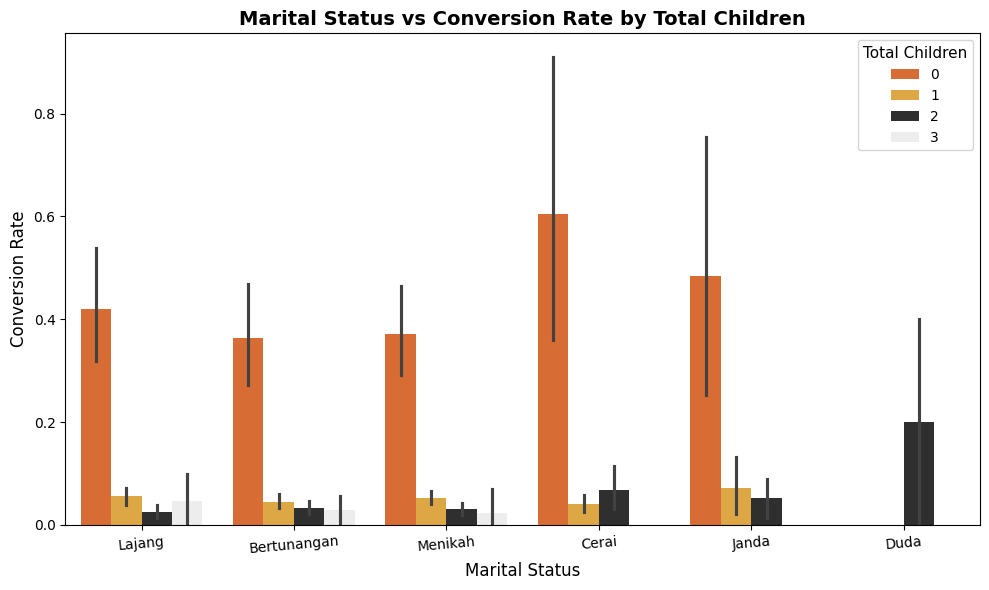

In [ ]:
# Palet warna disesuaikan dengan presentasi
custom_palette = ['#F26419', '#F6AE2D', '#2F2F2F', '#EDEDED']

# Ukuran gambar
plt.figure(figsize=(10, 6))

# Plot tunggal
sns.barplot(
    data=dfe,
    x='marital_status',
    y='conversion_rate',
    hue='total_children',
    palette=custom_palette
)

# Pengaturan tampilan
plt.title('Marital Status vs Conversion Rate by Total Children', fontsize=14, fontweight='bold')
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.xticks(rotation=5)
plt.grid(False)
plt.legend(title='Total Children', fontsize=10, title_fontsize=11)

# Tampilkan plot
plt.tight_layout()
plt.show()

#### **Income & Spending**

**Income Level vs Conversion Rate**

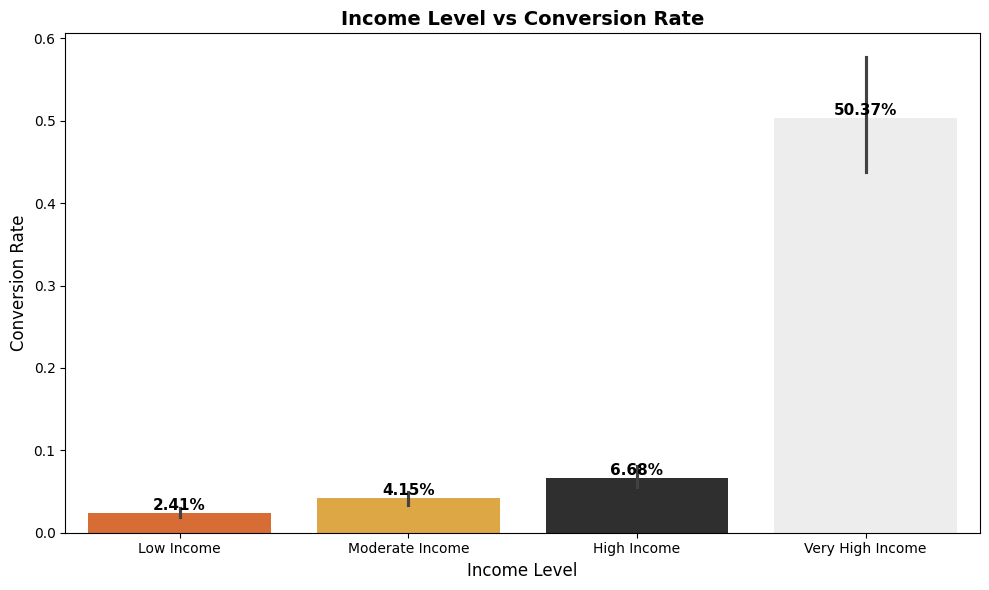

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Palet warna yang konsisten
custom_palette = ['#F26419', '#F6AE2D', '#2F2F2F', '#EDEDED']

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=dfe, x='income_level', y='conversion_rate', palette=custom_palette)
ax.set_title('Income Level vs Conversion Rate', fontsize=14, fontweight='bold')
ax.set_xlabel('Income Level', fontsize=12)
ax.set_ylabel('Conversion Rate', fontsize=12)
ax.tick_params(axis='x', rotation=0)
ax.grid(False)

# Menambahkan label persentase pada setiap bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2%}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

**Total Spent vs Total Purchases**

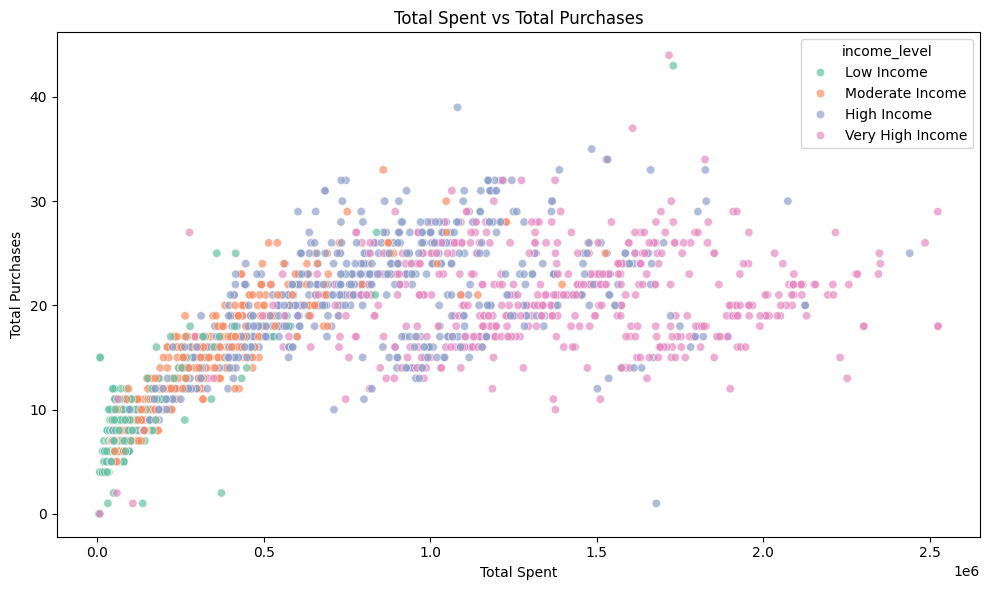

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=dfe, x='total_spent', y='total_purchases', hue='income_level', alpha=0.7, palette='Set2')
plt.title('Total Spent vs Total Purchases')
plt.xlabel('Total Spent')
plt.ylabel('Total Purchases')
plt.tight_layout()
plt.show()

### **Top Favorite Products**

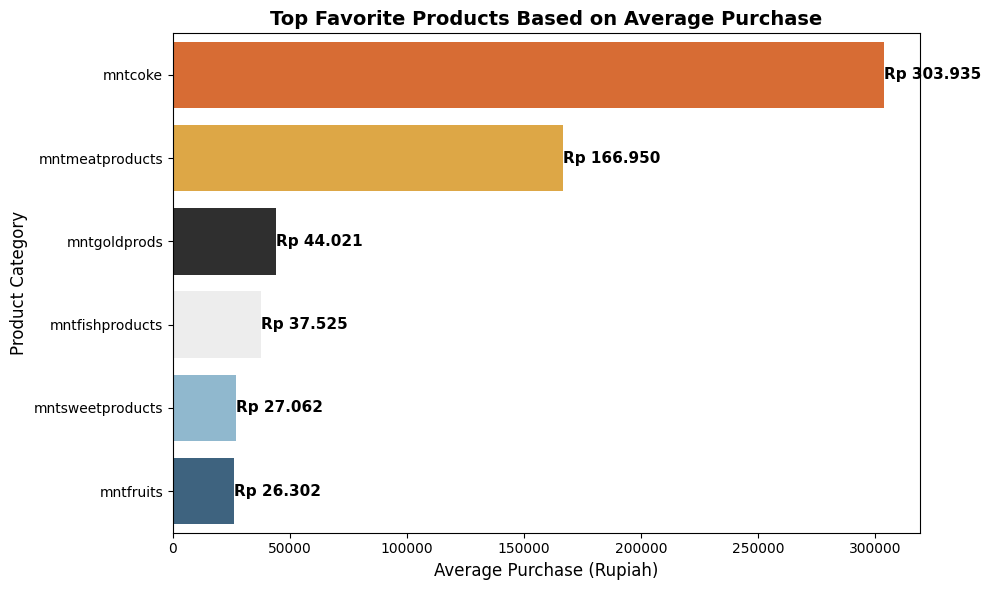

In [ ]:
# Menjumlahkan pembelian produk untuk setiap pengguna
product_columns = ['mntcoke', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods']
dfe['total_product_spent'] = dfe[product_columns].sum(axis=1)

# Menghitung rata-rata pembelian untuk setiap kategori produk
avg_product_purchase = dfe[product_columns].mean()

# Membuat DataFrame untuk visualisasi
product_data = pd.DataFrame(avg_product_purchase).reset_index()
product_data.columns = ['Product Category', 'Average Purchase']
product_data = product_data.sort_values(by='Average Purchase', ascending=False)

# Custom palette sesuai dengan slide
custom_palette = ['#F26419', '#F6AE2D', '#2F2F2F', '#EDEDED', '#86BBD8', '#33658A']

# Visualisasi
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=product_data, x='Average Purchase', y='Product Category', palette=custom_palette)
plt.title('Top Favorite Products Based on Average Purchase', fontsize=14, fontweight='bold')
plt.xlabel('Average Purchase (Rupiah)', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
ax.grid(False)

# Menambahkan label nilai dalam format Rupiah pada setiap bar
for p in ax.patches:
    width = p.get_width()
    label = f'Rp {int(width):,}'.replace(',', '.')
    ax.text(width + 3, p.get_y() + p.get_height() / 2,
            label, ha='left', va='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


In [ ]:
product_data.to_excel('avg_product_purchase.xlsx', index=False)

**Product Category vs Conversion Rate**

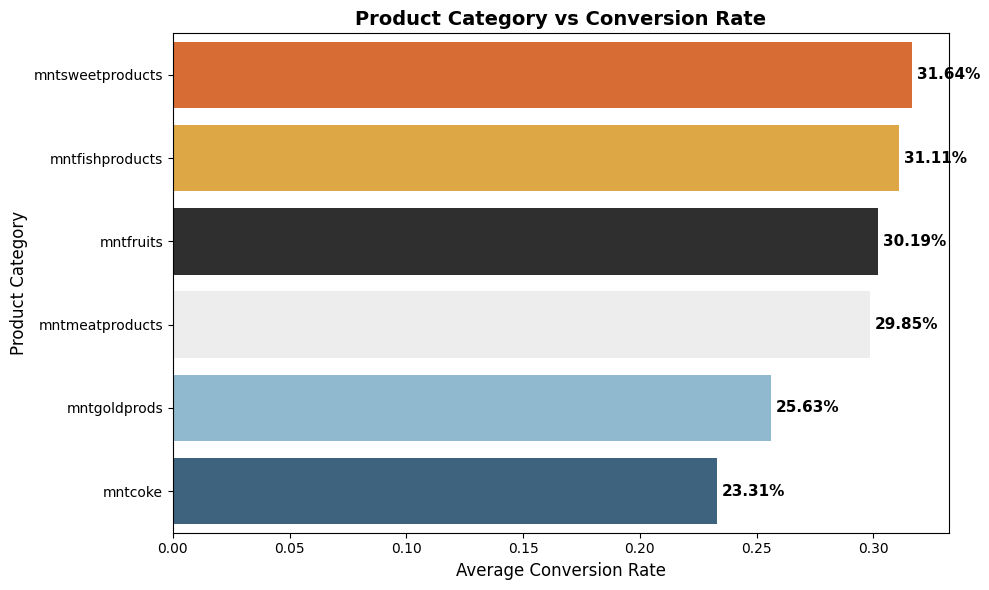

In [ ]:
# Create a new column for total spent across product categories
dfe['total_product_spent'] = dfe[product_columns].sum(axis=1)

# Step 2: Calculate the average conversion rate for each category
category_conversion = []

for column in product_columns:
    category_avg = dfe.groupby(column)['conversion_rate'].mean().reset_index()
    category_avg['Product Category'] = column
    category_conversion.append(category_avg[['Product Category', 'conversion_rate']])

# Combine all category data
product_data = pd.concat(category_conversion)

# Step 3: Calculate the average conversion rate per category
avg_conversion_rate = product_data.groupby('Product Category')['conversion_rate'].mean().reset_index()
avg_conversion_rate = avg_conversion_rate.sort_values(by='conversion_rate', ascending=False)

# Custom palette sesuai dengan slide
custom_palette = ['#F26419', '#F6AE2D', '#2F2F2F', '#EDEDED', '#86BBD8', '#33658A']

# Step 4: Visualization
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=avg_conversion_rate, x='conversion_rate', y='Product Category', palette=custom_palette)
plt.title('Product Category vs Conversion Rate', fontsize=14, fontweight='bold')
plt.xlabel('Average Conversion Rate', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
ax.grid(False)

# Menambahkan label persentase pada setiap bar
for p in ax.patches:
    width = p.get_width()
    label = f'{width:.2%}'
    ax.text(width + 0.002, p.get_y() + p.get_height() / 2,
            label, ha='left', va='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

#### **Engagement & Journey**

**Tenure Group vs Total Purchases**

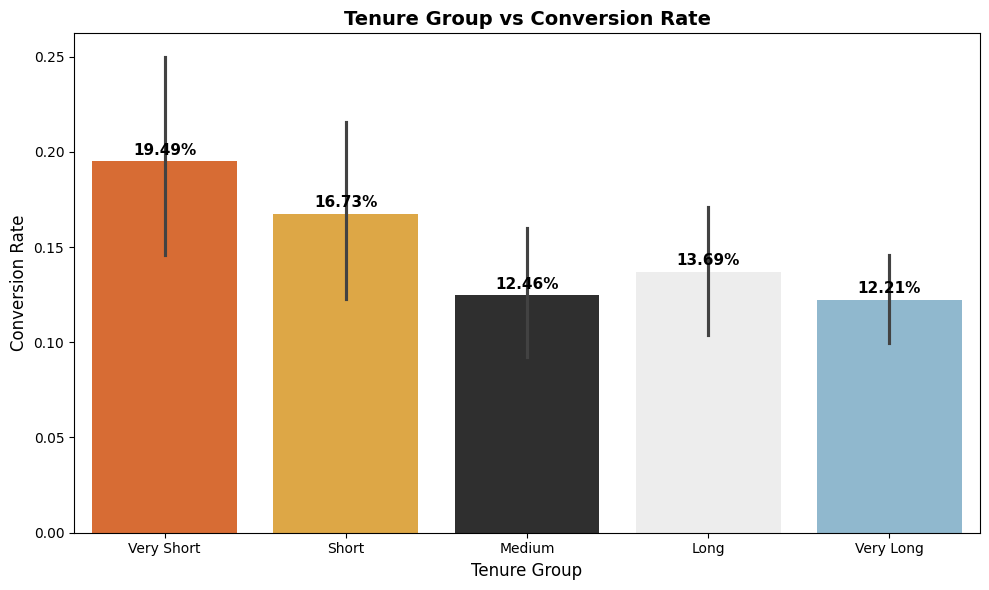

In [ ]:
# Palet warna sesuai slide
custom_palette = ['#F26419', '#F6AE2D', '#2F2F2F', '#EDEDED', '#86BBD8', '#33658A']

# Mengatur ukuran figure
plt.figure(figsize=(10, 6))

# Membuat bar plot dengan rata-rata conversion rate per tenure group
ax = sns.barplot(data=dfe, x='tenure_group', y='conversion_rate', palette=custom_palette)

# Menambahkan judul dan label sumbu
plt.title('Tenure Group vs Conversion Rate', fontsize=14, fontweight='bold')
plt.xlabel('Tenure Group', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
ax.grid(False)

# Menambahkan label nilai persentase pada setiap bar
for p in ax.patches:
    height = p.get_height()
    label = f'{height:.2%}'
    ax.text(p.get_x() + p.get_width() / 2, height + 0.002,
            label, ha='center', va='bottom', fontsize=11, fontweight='bold')

# Menyusun layout agar tidak tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()

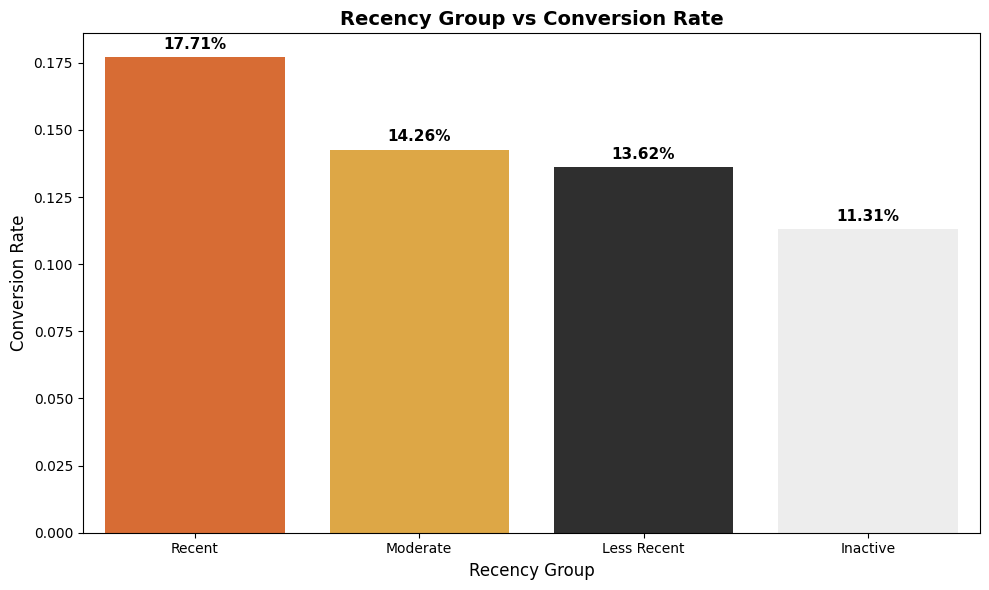

In [ ]:
# Palet warna sesuai slide
custom_palette = ['#F26419', '#F6AE2D', '#2F2F2F', '#EDEDED', '#86BBD8', '#33658A']

# Mengatur ukuran figure
plt.figure(figsize=(10, 6))

# Membuat bar plot dengan rata-rata conversion rate per recency group
ax = sns.barplot(data=dfe, x='recency_group', y='conversion_rate', palette=custom_palette, ci=None)

# Menambahkan judul dan label sumbu
plt.title('Recency Group vs Conversion Rate', fontsize=14, fontweight='bold')
plt.xlabel('Recency Group', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
ax.grid(False)

# Menambahkan label nilai persentase di atas setiap bar
for p in ax.patches:
    height = p.get_height()
    label = f'{height:.2%}'
    ax.text(p.get_x() + p.get_width() / 2, height + 0.002,
            label, ha='center', va='bottom', fontsize=11, fontweight='bold')

# Menyusun layout agar tidak tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()

#### **Preference & Behavior**

**Channel Preference Distribution**

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=dfe, x='channel_preference', y='conversion_rate', palette='Set2')
plt.title(' Conversion Rate by Channel')
plt.xlabel('Channel Preference')
plt.ylabel('Conversion Rate')
plt.tight_layout()
plt.show()

#### **Campaign Effectiveness**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data untuk visualisasi
campaign_cols = ['acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5']
cmp_sum = dfe[campaign_cols].sum()

# Buat subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Subplot 1: Channel Preference Distribution
sns.countplot(ax=axes[0], data=dfe, x='channel_preference', palette='Set2')
axes[0].set_title('Channel Preference Distribution')
axes[0].set_xlabel('Channel Preference')
axes[0].set_ylabel('Jumlah Pelanggan')

# Subplot 2: Campaign Performance
sns.barplot(ax=axes[1], x=campaign_cols, y=cmp_sum.values, palette='Set2')
axes[1].set_title('Campaign Performance')
axes[1].set_xlabel('Campaign')
axes[1].set_ylabel('Total Accepted')

# Layout rapih
plt.tight_layout()
plt.show()


In [ ]:
# Step 1: Calculate total accepted campaigns per customer
dfe['total_accepted'] = dfe[['acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5']].sum(axis=1)

# Step 2: Classify as Accepted or Not Accepted
dfe['campaign_response'] = dfe['total_accepted'].apply(lambda x: 'Accepted' if x > 0 else 'Not Accepted')

# Step 3: Count customers by channel and response
grouped = dfe.groupby(['channel_preference', 'campaign_response']).size().unstack(fill_value=0)

# Step 4: Calculate conversion rate per channel
conversion_by_channel = dfe.groupby('channel_preference')['conversion_rate'].mean()

# Step 5: Plot
fig, ax1 = plt.subplots(figsize=(12, 7))

# Colors matched to your slide design
colors = ['#aaadb3', '#c7491c']
bar_plot = grouped[['Not Accepted', 'Accepted']].plot(
    kind='bar', stacked=True, ax=ax1, color=colors
)

# Axis labels and title
ax1.set_ylabel('Number of Customers')
ax1.set_xlabel('Channel Preference')
ax1.set_title('Channel Preference: Campaign Acceptance & Conversion Rate', fontsize=14, fontweight='bold')
ax1.tick_params(axis='x', rotation=0)
ax1.legend(title='Campaign Response', loc='upper left')
ax1.grid(False)

# Add bar labels (number of customers)
for container in bar_plot.containers:
    bar_plot.bar_label(container, label_type='center', fontsize=12, color='white', weight='bold')

# Line chart for conversion rate
ax2 = ax1.twinx()
ax2.plot(conversion_by_channel.index, conversion_by_channel.values,
         color='#ffc43d', marker='o', linewidth=2, label='Conversion Rate (%)')
ax2.set_ylabel('Conversion Rate (%)')
ax2.set_ylim(0, conversion_by_channel.max() * 1.2)
ax2.legend(loc='upper right')
ax2.grid(False)

plt.tight_layout()
plt.show()

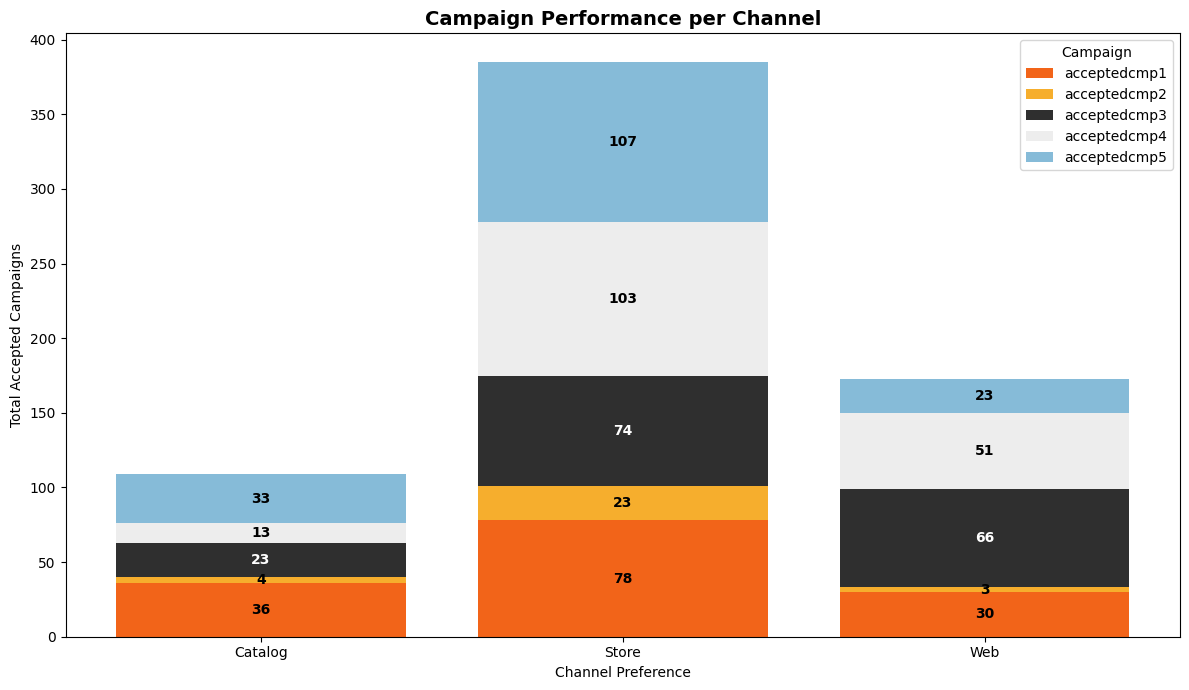

In [ ]:
# Step 1: Kolom campaign & hitung total accepted per channel
campaign_cols = ['acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5']
campaign_by_channel = dfe.groupby('channel_preference')[campaign_cols].sum()

# Step 2: Plot manual barplot dengan warna dari palette custom
campaign_palette = ['#F26419', '#F6AE2D', '#2F2F2F', '#EDEDED', '#86BBD8']
fig, ax = plt.subplots(figsize=(12, 7))

# Inisialisasi posisi awal (bawah) untuk stacked
bottom_values = [0] * len(campaign_by_channel)

# Loop untuk setiap campaign (tiap layer)
for idx, col in enumerate(campaign_cols):
    bar = ax.bar(
        campaign_by_channel.index,
        campaign_by_channel[col],
        bottom=bottom_values,
        label=col,
        color=campaign_palette[idx]
    )

    # Tambah label angka di dalam batang
    for bar_rect in bar:
        height = bar_rect.get_height()
        if height > 0:
            ax.text(
                bar_rect.get_x() + bar_rect.get_width() / 2,
                bar_rect.get_y() + height / 2,
                f'{int(height)}',
                ha='center',
                va='center',
                fontsize=10,
                color='black' if campaign_palette[idx] != '#2F2F2F' else 'white',
                fontweight='bold'
            )

    # Update posisi bottom
    bottom_values = [i + j for i, j in zip(bottom_values, campaign_by_channel[col])]

# Beautify
ax.set_title('Campaign Performance per Channel', fontsize=14, fontweight='bold')
ax.set_xlabel('Channel Preference')
ax.set_ylabel('Total Accepted Campaigns')
ax.legend(title='Campaign')
plt.xticks(rotation=0)

# Hilangkan grid
ax.grid(False)

plt.tight_layout()
plt.show()


# **2. Data Preprocessing**

In [ ]:
# Display the information about the DataFrame
print("DataFrame Information:")
dfe.info()

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   unnamed: 0           2240 non-null   int64         
 1   id                   2240 non-null   int64         
 2   year_birth           2240 non-null   int64         
 3   education            2240 non-null   object        
 4   marital_status       2240 non-null   object        
 5   income               2240 non-null   float64       
 6   kidhome              2240 non-null   int64         
 7   teenhome             2240 non-null   int64         
 8   dt_customer          2240 non-null   datetime64[ns]
 9   recency              2240 non-null   int64         
 10  mntcoke              2240 non-null   int64         
 11  mntfruits            2240 non-null   int64         
 12  mntmeatproducts      2240 non-null   int64         
 13  mntfishpro

In [ ]:
pd.set_option('display.max_columns', None)

# Pilih kolom-kolom bertipe objek dan simpan dalam variabel 'categoric'
categoric = dfe.select_dtypes('object')

# Pilih kolom-kolom bertipe numerik dan simpan dalam variabel 'numeric'
numeric = dfe.select_dtypes('number')

# Tentukan jumlah baris dan kolom
rows = dfe.shape[0]
cols = dfe.shape[1]

# Cetak bentuk DataFrame
print(f'Jumlah Baris: {rows}\nJumlah Kolom: {cols}')

# Cetak sampel 6 baris dari DataFrame
print('\nContoh Data:')
display(dfe.sample(6))

# Cetak ringkasan statistik data kategorikal
print('\nRingkasan Statistik Data Kategorikal:')
display(categoric.describe())

# Cetak ringkasan statistik data numerik
print('\nRingkasan Statistik Data Numerik:')
display(numeric.describe())

# Define categorical_col and numerical_col before printing
categorical_col = categoric.columns.tolist()  # Get the list of categorical columns
numerical_col = numeric.columns.tolist()    # Get the list of numerical columns

Jumlah Baris: 2240
Jumlah Kolom: 45

Contoh Data:


unnamed: 0    id  year_birth education marital_status      income  \
635          635  8461        1962        S1          Cerai  46102000.0   
1857        1857  5316        1976        S2    Bertunangan  21024000.0   
1481        1481  7787        1960        S1    Bertunangan  62807000.0   
227          227   709        1952        S1          Cerai  51537000.0   
1095        1095  9964        1979        S1         Lajang  61825000.0   
1413        1413  4310        1944        S1        Menikah  80589000.0   

      kidhome  teenhome dt_customer  recency  mntcoke  mntfruits  \
635         2         1  2014-03-10        3    14000          0   
1857        0         0  2013-07-04       89    36000       4000   
1481        0         1  2012-08-31       83   526000      28000   
227         0         1  2012-12-09       27   787000      20000   
1095        0         1  2013-08-07       56   162000      50000   
1413        0         0  2014-01-22       25   507000      93000   

      mntmeatproducts  mntfishproducts  mntsweetproducts  mntgoldprods  \
635              1000                0                 0          1000   
1857            18000             6000              2000         18000   
1481           135000            10000             21000         99000   
227            204000                0                 0         92000   
1095           100000            55000             30000         27000   
1413           520000           242000             40000         26000   

      numdealspurchases  numwebpurchases  numcatalogpurchases  \
635                   1                1                    0   
1857                  1                2                    0   
1481                  3                5                    3   
227                   3                2                    2   
1095                  1                4                    2   
1413                  1                5                   10   

      numstorepurchases  numwebvisitsmonth  acceptedcmp3  acceptedcmp4  \
635                   2                  7             0             0   
1857                  4                  7             0             0   
1481                 12                  5             0             0   
227                  11                  8             0             0   
1095                  8                  4             0             0   
1413                  5                  1             0             0   

      acceptedcmp5  acceptedcmp1  acceptedcmp2  complain  z_costcontact  \
635              0             0             0         0              3   
1857             0             0             0         0              3   
1481             0             0             0         0              3   
227              0             0             0         0              3   
1095             0             0             0         0              3   
1413             0             1             0         0              3   

      z_revenue  response  age            age_group  total_children  \
635          11         0   63           Old Adults               3   
1857         11         0   49  Middled-aged Adults               0   
1481         11         0   65           Old Adults               1   
227          11         0   73           Old Adults               1   
1095         11         0   46  Middled-aged Adults               1   
1413         11         1   81           Old Adults               0   

      total_spent  total_purchases  total_responses  conversion_rate  \
635         16000                4                0              0.0   
1857        84000                7                0              0.0   
1481       819000               23                0              0.0   
227       1103000               18                0              0.0   
1095       424000               15                0              0.0   
1413      1428000               21                2  


Ringkasan Statistik Data Kategorikal:


education marital_status            age_group channel_preference  \
count       2240           2240                 2240               2240   
unique         5              6                    3                  3   
top           S1        Menikah  Middled-aged Adults              Store   
freq        1127            864                 1191               1478   

       campaign_response  
count               2240  
unique                 2  
top         Not Accepted  
freq                1777


Ringkasan Statistik Data Numerik:


unnamed: 0            id   year_birth        income      kidhome  \
count  2240.000000   2240.000000  2240.000000  2.240000e+03  2240.000000   
mean   1119.500000   5592.159821  1968.805804  5.223798e+07     0.444196   
std     646.776623   3246.662198    11.984069  2.503796e+07     0.538398   
min       0.000000      0.000000  1893.000000  1.730000e+06     0.000000   
25%     559.750000   2828.250000  1959.000000  3.553875e+07     0.000000   
50%    1119.500000   5458.500000  1970.000000  5.138150e+07     0.000000   
75%    1679.250000   8427.750000  1977.000000  6.828975e+07     1.000000   
max    2239.000000  11191.000000  1996.000000  6.666660e+08     2.000000   

          teenhome      recency       mntcoke      mntfruits  mntmeatproducts  \
count  2240.000000  2240.000000  2.240000e+03    2240.000000     2.240000e+03   
mean      0.506250    49.109375  3.039357e+05   26302.232143     1.669500e+05   
std       0.544538    28.962453  3.365974e+05   39773.433765     2.257154e+05   
min       0.000000     0.000000  0.000000e+00       0.000000     0.000000e+00   
25%       0.000000    24.000000  2.375000e+04    1000.000000     1.600000e+04   
50%       0.000000    49.000000  1.735000e+05    8000.000000     6.700000e+04   
75%       1.000000    74.000000  5.042500e+05   33000.000000     2.320000e+05   
max       2.000000    99.000000  1.493000e+06  199000.000000     1.725000e+06   

       mntfishproducts  mntsweetproducts   mntgoldprods  numdealspurchases  \
count      2240.000000       2240.000000    2240.000000        2240.000000   
mean      37525.446429      27062.946429   44021.875000           2.325000   
std       54628.979403      41280.498488   52167.438915           1.932238   
min           0.000000          0.000000       0.000000           0.000000   
25%        3000.000000       1000.000000    9000.000000           1.000000   
50%       12000.000000       8000.000000   24000.000000           2.000000   
75%       50000.000000      33000.000000   56000.000000           3.000000   
max      259000.000000     263000.000000  362000.000000          15.000000   

       numwebpurchases  numcatalogpurchases  numstorepurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       numwebvisitsmonth  acceptedcmp3  acceptedcmp4  acceptedcmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       acceptedcmp1  acceptedcmp2     complain  z_costcontact  z_revenue  \
count   2240.000000   2240.000000  2240.000000         2240.0     2240.0   
mean       0.064286      0.013393     0.009375            3.0       11.0   
std        0.245316      0.114976     0.096391            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000          

In [ ]:
print("Categorical columns: ", categorical_col)
print("Numerical columns: ", numerical_col)

Categorical columns:  ['education', 'marital_status', 'age_group', 'channel_preference', 'campaign_response']
Numerical columns:  ['unnamed: 0', 'id', 'year_birth', 'income', 'kidhome', 'teenhome', 'recency', 'mntcoke', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods', 'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1', 'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response', 'age', 'total_children', 'total_spent', 'total_purchases', 'total_responses', 'conversion_rate', 'tenure_days', 'total_product_spent', 'total_accepted']


Drop fitur unneseccery

In [ ]:
drop_columns = [
    'unnamed: 0',      #  Index otomatis dari file CSV, tidak relevan untuk analisis
    'id',              #  ID unik customer, tidak memberikan insight perilaku pelanggan
    'year_birth',      #  Sudah diubah jadi 'age', jadi redundan
    'dt_customer', # sudah dijadikan age

    #  Sudah digabung ke dalam 'total_children'
    'kidhome',
    'teenhome',

    # Kolom pembelian channel — sudah diringkas jadi 'total_purchases':
    'numdealspurchases',
    'numwebpurchases',
    'numcatalogpurchases',
    'numstorepurchases',

    # Respon kampanye marketing — sudah diringkas 'total_responses':
    'acceptedcmp1',
    'acceptedcmp2',
    'acceptedcmp3',
    'acceptedcmp4',
    'acceptedcmp5',
    'response',

    'z_costcontact',  #  Variabel konstan, semua nilainya sama, tidak berguna untuk clustering
    'z_revenue',       #  Sama seperti di atas, variabel konstan, tidak menambah variasi

    # sudah ada total_spent
    'total_product_spent'
]

dfe_bfcapped = dfe.copy()

# Drop kolom dan simpan ke dfe_bfcapped
dfe_bfcapped = dfe.drop(columns=drop_columns)

In [ ]:
# Get numerical columns from the DataFrame 'df'
num_columns = dfe_bfcapped.select_dtypes(include=['number']).columns

# Now you can use 'num_columns' as intended
num_columns # numerical columns

Index(['income', 'recency', 'mntcoke', 'mntfruits', 'mntmeatproducts',
       'mntfishproducts', 'mntsweetproducts', 'mntgoldprods',
       'numwebvisitsmonth', 'complain', 'age', 'total_children', 'total_spent',
       'total_purchases', 'total_responses', 'conversion_rate', 'tenure_days',
       'total_accepted'],
      dtype='object')

## **Handling Outlier**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

def plot_outliers(df, num_cols, cols_per_row=4, row_height=4, col_width=5):
    total = len(num_cols)
    rows = math.ceil(total / cols_per_row)
    figsize = (col_width * cols_per_row, row_height * rows)

    plt.style.use('default')  # Background putih
    fig, axes = plt.subplots(rows, cols_per_row, figsize=figsize)
    axes = axes.flatten()

    for i, col in enumerate(num_cols):
        sns.boxplot(y=df[col], ax=axes[i], color='steelblue', linewidth=1)
        axes[i].set_title(f'{col}', fontsize=10)
        axes[i].set_ylabel('')
        axes[i].grid(True, linestyle='--', alpha=0.5)

    # Hapus subplot kosong
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.suptitle('Boxplots of Numerical Features', fontsize=14, y=1.02)
    plt.show()

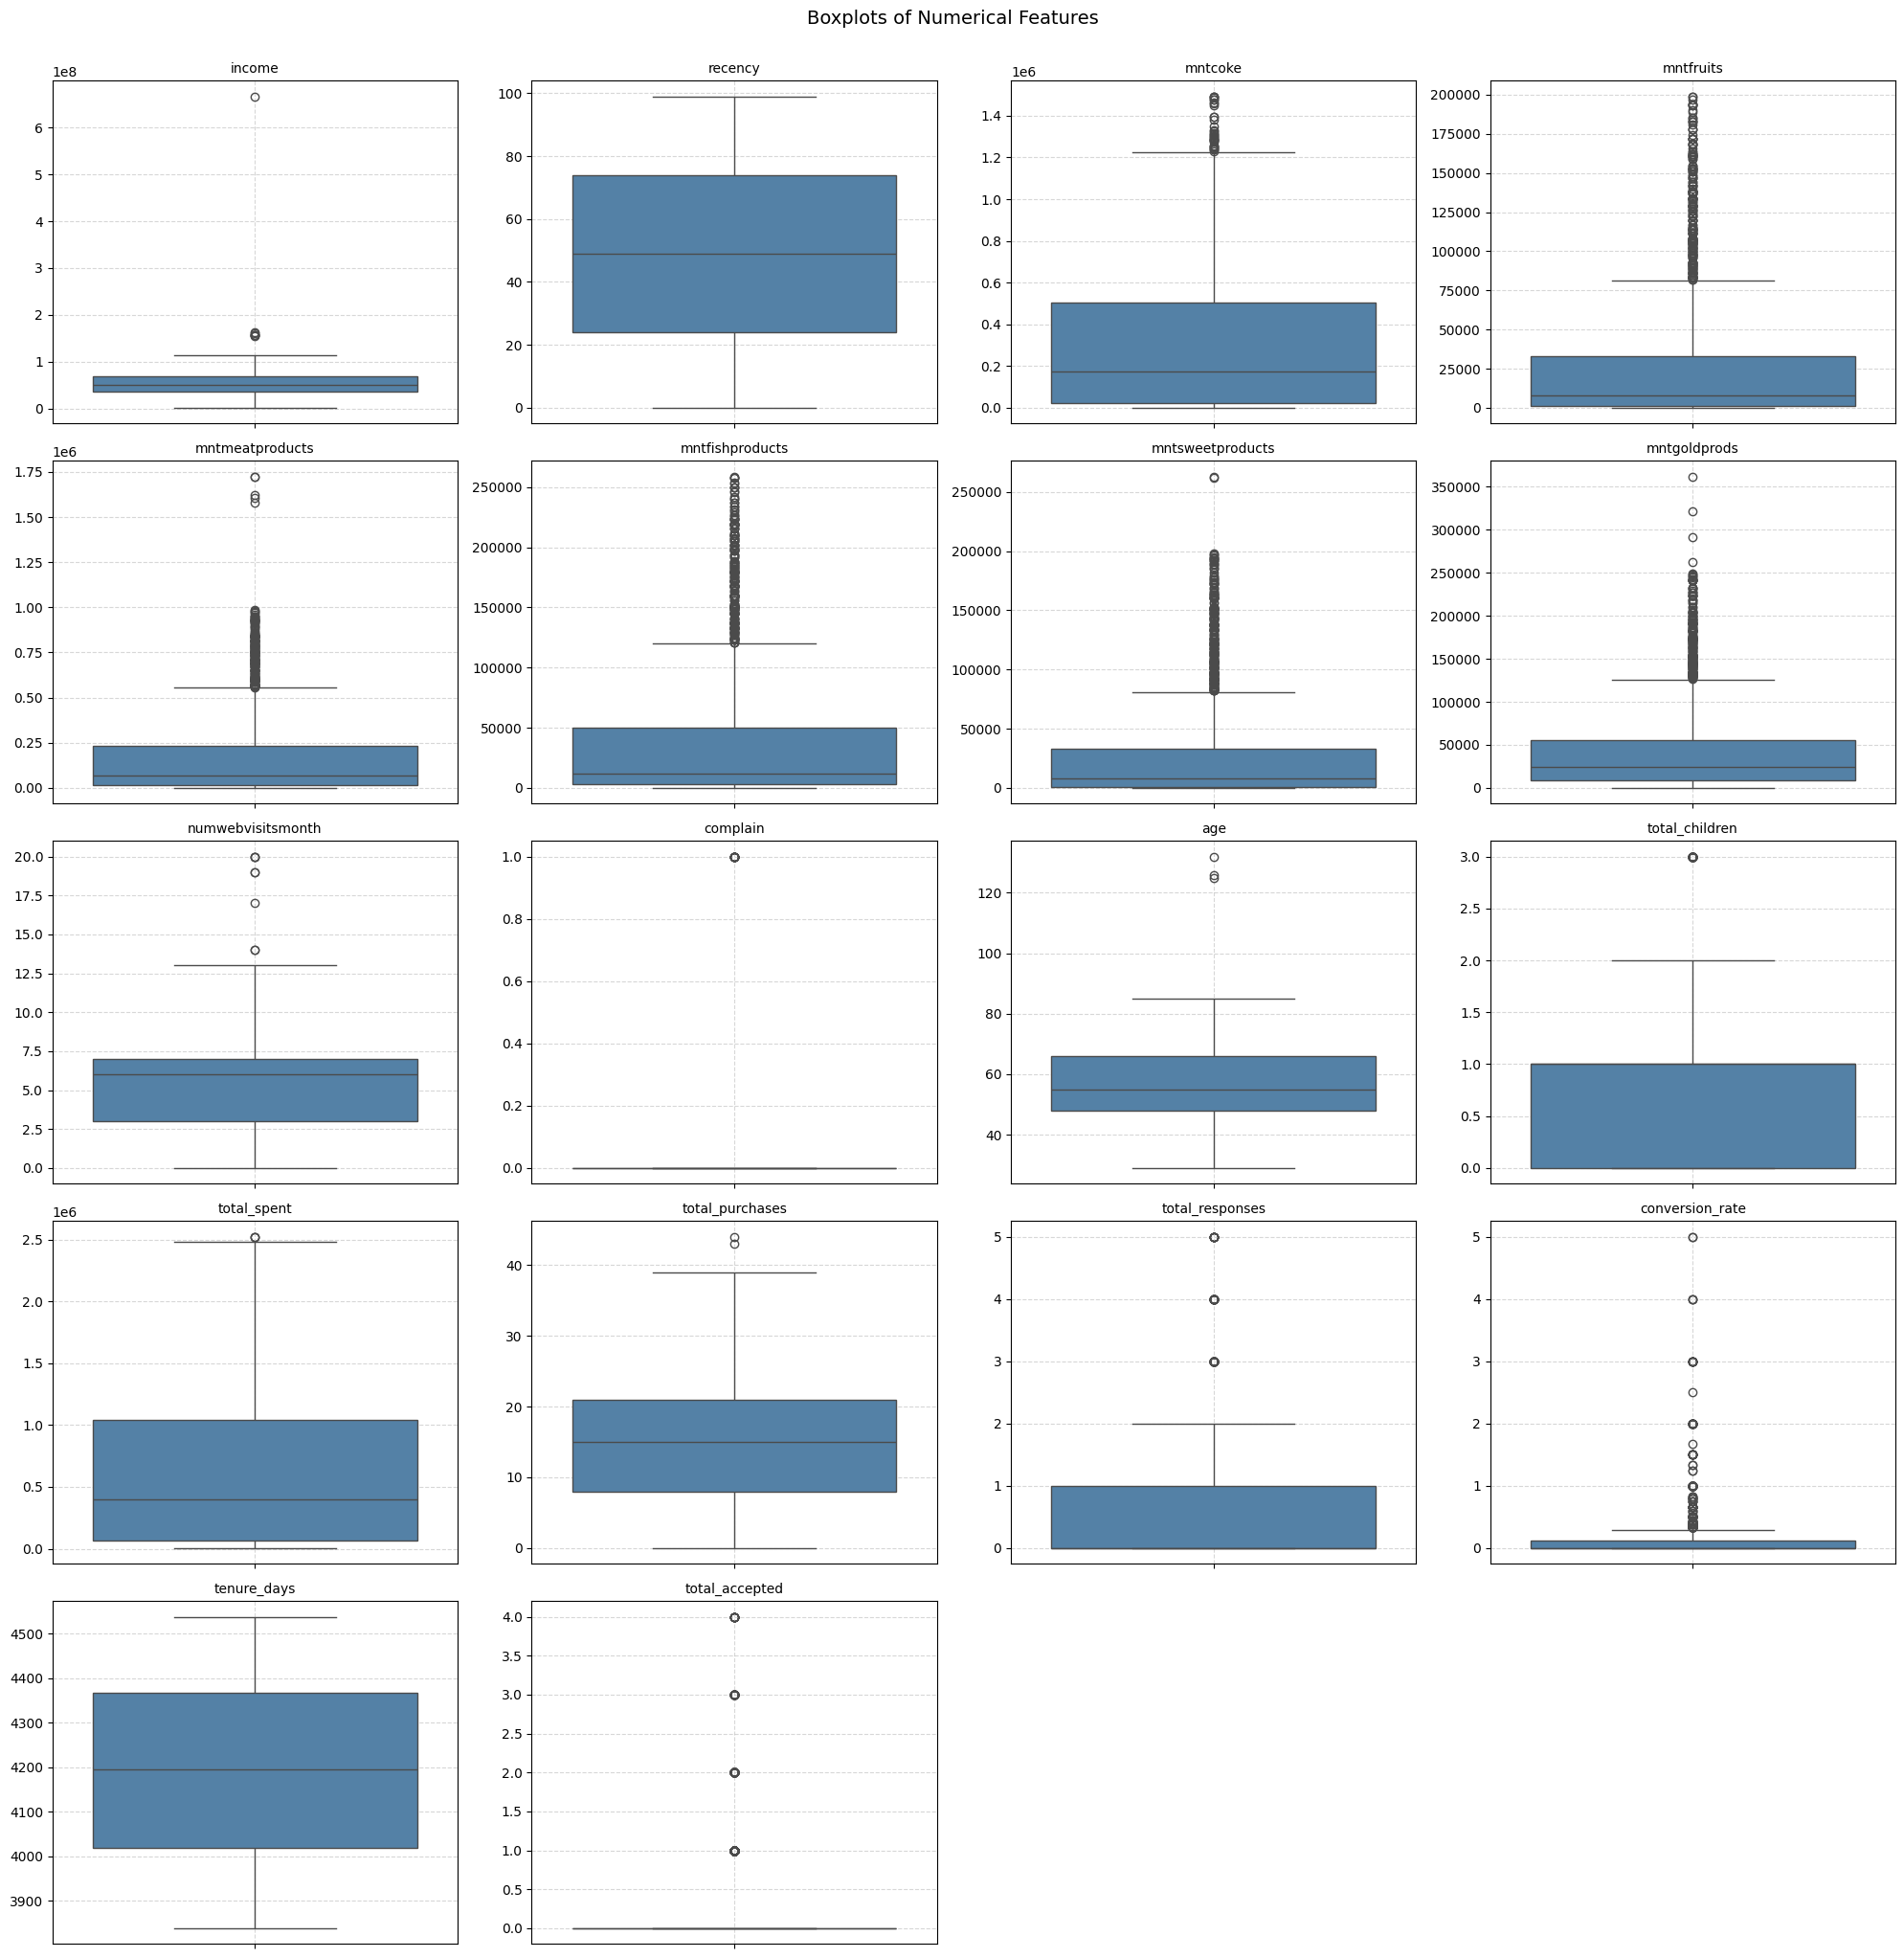

In [ ]:
# function call
plot_outliers(dfe_bfcapped, num_columns)

In [ ]:
def outliers_info(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    count = ((series < lower_bound) | (series > upper_bound)).sum()
    return count, upper_bound, lower_bound

In [ ]:
def print_outliers(df, num_cols):
    outliers_dict = {}  # store the column name and the number of outliers present

    for col in num_cols:
        count, upper, lower = outliers_info(df[col])  # gunakan variabel baru

        if count > 0:
            outliers_dict[col] = count  # simpan hanya kolom yang punya outlier

    # Sort hasilnya dari yang paling banyak outlier
    sorted_outliers = dict(sorted(outliers_dict.items(), key=lambda item: item[1], reverse=True))

    # Tampilkan
    for col, val in sorted_outliers.items():
        print(f'Total outliers in {col}: {val} ({((val/len(dfe)) * 100):.2f}%)')

    print(f'\nTotal columns with outliers: {len(sorted_outliers)} out of {len(num_cols)}')

In [ ]:
print_outliers(dfe_bfcapped, num_columns)

Total outliers in total_accepted: 463 (20.67%)
Total outliers in conversion_rate: 294 (13.12%)
Total outliers in mntsweetproducts: 248 (11.07%)
Total outliers in mntfruits: 227 (10.13%)
Total outliers in mntfishproducts: 223 (9.96%)
Total outliers in mntgoldprods: 207 (9.24%)
Total outliers in mntmeatproducts: 175 (7.81%)
Total outliers in total_responses: 97 (4.33%)
Total outliers in total_children: 53 (2.37%)
Total outliers in mntcoke: 35 (1.56%)
Total outliers in complain: 21 (0.94%)
Total outliers in income: 8 (0.36%)
Total outliers in numwebvisitsmonth: 8 (0.36%)
Total outliers in age: 3 (0.13%)
Total outliers in total_spent: 3 (0.13%)
Total outliers in total_purchases: 2 (0.09%)

Total columns with outliers: 16 out of 18


In [ ]:
def cap_outliers(dfedfe_bfcapped, num_cols):
  for col in num_cols:
    _, upper_bound, lower_bound = outliers_info(dfe_bfcapped[col])  # Ambil batas atas & bawah via IQR
    dfe_bfcapped[col] = dfe_bfcapped[col].clip(lower_bound, upper_bound)      # Potong (clip) nilai ekstrem
  return dfe_bfcapped

In [ ]:
# function call
dfe_capped = cap_outliers(dfe_bfcapped, num_columns)

# recheck outliers
print_outliers(dfe_capped, num_columns)


Total columns with outliers: 0 out of 18


In [ ]:
dfe_capped.sample(5)

education marital_status      income  recency  mntcoke  mntfruits  \
461         S1          Janda  70165000.0       60   161000          0   
911         S1    Bertunangan  75114000.0       40   571000      12000   
2023        S2        Menikah  77027000.0       23   820000      57000   
1083        S1    Bertunangan  40479000.0       95     5000          0   
1142        D3          Cerai  21282000.0       76     1000       5000   

      mntmeatproducts  mntfishproducts  mntsweetproducts  mntgoldprods  \
461            253000           120500             81000        122000   
911            523000            63000             60000         24000   
2023           242000            45000                 0         11000   
1083             8000             2000                 0             0   
1142             8000             4000              8000         20000   

      numwebvisitsmonth  complain  age            age_group  total_children  \
461                   1         0   76           Old Adults             0.0   
911                   2         0   33         Young Adults             0.0   
2023                  4         0   73           Old Adults             1.0   
1083                  4         0   43  Middled-aged Adults             1.0   
1142                  6         0   47  Middled-aged Adults             1.0   

      total_spent  total_purchases  total_responses  conversion_rate  \
461        926000             22.0              0.0              0.0   
911       1253000             19.0              0.0              0.0   
2023      1175000             19.0              0.0              0.0   
1083        15000              4.0              0.0              0.0   
1142        46000              7.0              0.0              0.0   

      tenure_days tenure_group      income_level recency_group  \
461          4119        Short  Very High Income      Moderate   
911          4073        Short  Very High Income      Moderate   
2023         3983        Short  Very High Income        Recent   
1083         4155       Medium   Moderate Income      Inactive   
1142         3888   Very Short        Low Income   Less Recent   

     channel_preference  total_accepted campaign_response  
461               Store               0      Not Accepted  
911             Catalog               0      Not Accepted  
2023                Web               0      Not Accepted  
1083              Store               0      Not Accepted  
1142                Web               0      Not Accepted

In [ ]:
dfe_capped.describe().T

count          mean           std        min          25%  \
income             2240.0  5.186587e+07  2.093610e+07  1730000.0  35538750.00   
recency            2240.0  4.910938e+01  2.896245e+01        0.0        24.00   
mntcoke            2240.0  3.021129e+05  3.310574e+05        0.0     23750.00   
mntfruits          2240.0  2.167902e+04  2.725735e+04        0.0      1000.00   
mntmeatproducts    2240.0  1.508732e+05  1.788167e+05        0.0     16000.00   
mntfishproducts    2240.0  3.211585e+04  4.036148e+04        0.0      3000.00   
mntsweetproducts   2240.0  2.193795e+04  2.754033e+04        0.0      1000.00   
mntgoldprods       2240.0  3.948772e+04  3.992751e+04        0.0      9000.00   
numwebvisitsmonth  2240.0  5.299107e+00  2.348357e+00        0.0         3.00   
complain           2240.0  0.000000e+00  0.000000e+00        0.0         0.00   
age                2240.0  5.614777e+01  1.177173e+01       29.0        48.00   
total_children     2240.0  9.386161e-01  7.228207e-01        0.0         0.00   
total_spent        2240.0  6.057794e+05  6.021896e+05     5000.0     68750.00   
total_purchases    2240.0  1.485938e+01  7.667679e+00        0.0         8.00   
total_responses    2240.0  4.002232e-01  7.276366e-01        0.0         0.00   
conversion_rate    2240.0  6.537450e-02  1.147941e-01        0.0         0.00   
tenure_days        2240.0  4.192582e+03  2.021225e+02     3839.0      4019.75   
total_accepted     2240.0  0.000000e+00  0.000000e+00        0.0         0.00   

                          50%           75%           max  
income             51381500.0  6.828975e+07  1.174162e+08  
recency                  49.0  7.400000e+01  9.900000e+01  
mntcoke              173500.0  5.042500e+05  1.225000e+06  
mntfruits              8000.0  3.300000e+04  8.100000e+04  
mntmeatproducts       67000.0  2.320000e+05  5.560000e+05  
mntfishproducts       12000.0  5.000000e+04  1.205000e+05  
mntsweetproducts       8000.0  3.300000e+04  8.100000e+04  
mntgoldprods          24000.0  5.600000e+04  1.265000e+05  
numwebvisitsmonth         6.0  7.000000e+00  1.300000e+01  
complain                  0.0  0.000000e+00  0.000000e+00  
age                      55.0  6.600000e+01  9.300000e+01  
total_children            1.0  1.000000e+00  2.500000e+00  
total_spent          396000.0  1.045500e+06  2.510625e+06  
total_purchases          15.0  2.100000e+01  4.050000e+01  
total_responses           0.0  1.000000e+00  2.500000e+00  
conversion_rate           0.0  1.250000e-01  3.125000e-01  
tenure_days            4194.5  4.368000e+03  4.538000e+03  
total_accepted            0.0  0.000000e+00  0.000000e+00

In [ ]:
drop_columns = [

    # Kolom individual spending produk — sudah diringkas jadi 'total_spent':
    'mntcoke',
    'mntfruits',
    'mntmeatproducts',
    'mntfishproducts',
    'mntsweetproducts',
    'mntgoldprods' ]

dfe_evaluation = dfe_bfcapped.copy()

# Drop kolom dan simpan ke dfe_bfcapped
dfe_capped = dfe_bfcapped.drop(columns=drop_columns)

In [ ]:
dfe_capped

education marital_status      income  recency  numwebvisitsmonth  \
0           S1         Lajang  58138000.0       58                  7   
1           S1         Lajang  46344000.0       38                  5   
2           S1    Bertunangan  71613000.0       26                  4   
3           S1    Bertunangan  26646000.0       26                  6   
4           S3        Menikah  58293000.0       94                  5   
...        ...            ...         ...      ...                ...   
2235        S1        Menikah  61223000.0       46                  5   
2236        S3    Bertunangan  64014000.0       56                  7   
2237        S1          Cerai  56981000.0       91                  6   
2238        S2    Bertunangan  69245000.0        8                  3   
2239        S3        Menikah  52869000.0       40                  7   

      complain  age            age_group  total_children  total_spent  \
0            0   68           Old Adults             0.0      1617000   
1            0   71           Old Adults             2.0        27000   
2            0   60           Old Adults             0.0       776000   
3            0   41  Middled-aged Adults             1.0        53000   
4            0   44  Middled-aged Adults             1.0       422000   
...        ...  ...                  ...             ...          ...   
2235         0   58  Middled-aged Adults             1.0      1341000   
2236         0   79           Old Adults             2.5       444000   
2237         0   44  Middled-aged Adults             0.0      1241000   
2238         0   69           Old Adults             1.0       843000   
2239         0   71           Old Adults             2.0       172000   

      total_purchases  total_responses  conversion_rate  tenure_days  \
0                25.0              1.0         0.142857         4502   
1                 6.0              0.0         0.000000         3952   
2                21.0              0.0         0.000000         4151   
3                 8.0              0.0         0.000000         3978   
4                19.0              0.0         0.000000         4000   
...               ...              ...              ...          ...   
2235             18.0              0.0         0.000000         4220   
2236             22.0              1.0         0.142857         3858   
2237             19.0              1.0         0.166667         3994   
2238             23.0              0.0         0.000000         3995   
2239             11.0              1.0         0.142857         4461   

     tenure_group      income_level recency_group channel_preference  \
0       Very Long       High Income      Moderate            Catalog   
1      Very Short   Moderate Income      Moderate              Store   
2          Medium  Very High Income        Recent              Store   
3      Very Short        Low Income        Recent              Store   
4           Short       High Income      Inactive              Store   
...           ...               ...           ...                ...   
2235       Medium       High Income      Moderate                Web   
2236   Very Short       High Income      Moderate                Web   
2237        Short       High Income      Inactive              Store   
2238        Short       High Income        Recent              Store   
2239    Very Long       High Income      Moderate              Store   

      total_accepted campaign_response  
0                  0      Not Accepted  
1                  0      Not Accepted  
2                  0      Not Accepted  
3                  0      Not Accepted  
4                  0      Not Accepted  
...              ...               ...  
2235               0      Not Accepted  
2236               0          Accepted  
2237               0          Accepted  
2238               0      Not Accepted  
2239               0      Not Accepted  

[2240 rows x 20 columns]

## **Feature Encoding**

In [ ]:
# recheck missing values
check_nan(dfe_evaluation)

In [ ]:
# Check categorical features in dfe_capped
categorical_cols_capped = dfe_capped.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns in dfe_capped:", categorical_cols_capped)

for col in categorical_cols_capped:
    print(f"\nCategories in {col}:")
    print(dfe_capped[col].value_counts())

Categorical columns in dfe_capped: ['education', 'marital_status', 'age_group', 'tenure_group', 'income_level', 'recency_group', 'channel_preference', 'campaign_response']

Categories in education:
education
S1     1127
S3      486
S2      370
D3      203
SMA      54
Name: count, dtype: int64

Categories in marital_status:
marital_status
Menikah        864
Bertunangan    580
Lajang         484
Cerai          232
Janda           77
Duda             3
Name: count, dtype: int64

Categories in age_group:
age_group
Middled-aged Adults    1191
Old Adults              860
Young Adults            189
Name: count, dtype: int64

Categories in tenure_group:
tenure_group
Very Short    454
Long          451
Medium        450
Very Long     443
Short         442
Name: count, dtype: int64

Categories in income_level:
income_level
High Income         639
Low Income          549
Moderate Income     544
Very High Income    508
Name: count, dtype: int64

Categories in recency_group:
recency_group
Recent  

### **Label Encoding, OHE & Binary**

In [ ]:
# Ordinal encoding for ordered categorical columns
ordinal_mapping = {
    'education': ['SMA', 'D3', 'S1', 'S2', 'S3'],  # Berdasarkan grafik conversion
    'age_group': ['Young Adults', 'Middled-aged Adults', 'Old Adults'],  # Young paling tinggi
    'tenure_group': ['Very Short', 'Short', 'Medium', 'Long', 'Very Long'],  # Sesuai grafik
    'income_level': ['Low Income', 'Moderate Income', 'High Income', 'Very High Income'],  # Sesuai grafik
    'recency_group': ['Recent', 'Moderate', 'Less Recent', 'Inactive']  # Sesuai grafik
}

for col, order in ordinal_mapping.items():
    dfe_capped[col] = pd.Categorical(dfe_capped[col], categories=order, ordered=True).codes

# One-hot encoding for nominal columns
dfe_encoded = pd.get_dummies(dfe_capped, columns=['marital_status', 'channel_preference'], drop_first=True)

# Binary encoding for campaign_response
dfe_encoded['campaign_response'] = dfe_encoded['campaign_response'].map({'Not Accepted': 0, 'Accepted': 1})

In [ ]:
num_cols = dfe_encoded.select_dtypes(include=np.number).columns.tolist()

skew_type_list = []
skew_val_list = []
kurtosis_val_list = []

for column in num_cols:
    data = dfe_encoded[column].dropna(axis=0)
    mean = round(data.mean(), 3)
    median = data.median()
    mode = data.mode()[0]
    skew_val = round(skew(data, nan_policy="omit"), 3)
    kurtosis_val = round(kurtosis(data, nan_policy="omit"), 3)

    if (mean == median == mode) or (-0.2 < skew_val < 0.2):
        skew_type = "Normal Distribution (Symmetric)"
    elif mean < median < mode:
        skew_type = "Negatively Skewed"
        if skew_val <= -1:
            skew_type = "Highly Negatively Skewed"
        elif -0.5 >= skew_val > -1:
            skew_type = "Moderately Negatively Skewed"
        else:
            skew_type = "Moderately Normal Distribution (Symmetric)"
    else:
        skew_type = "Positively Skewed"
        if skew_val >= 1:
            skew_type = "Highly Positively Skewed"
        elif 0.5 <= skew_val < 1:
            skew_type = "Moderately Positively Skewed"
        else:
            skew_type = "Moderately Normal Distribution (Symmetric)"

    skew_type_list.append(skew_type)
    skew_val_list.append(skew_val)
    kurtosis_val_list.append(kurtosis_val)

dist = pd.DataFrame({
    "Column Name": num_cols,
    "Skewness": skew_val_list,
    "Kurtosis": kurtosis_val_list,
    "Type of Distribution": skew_type_list
})

dist = dist.sort_values(["Type of Distribution", "Column Name"]).reset_index(drop=True)
dist

Column Name  Skewness  Kurtosis  \
0   campaign_response     1.449     0.099   
1     conversion_rate     1.388     0.221   
2     total_responses     1.687     1.631   
3           age_group    -0.290    -0.646   
4   numwebvisitsmonth    -0.228    -0.628   
5       recency_group     0.269    -1.058   
6      total_children     0.210    -0.799   
7     total_purchases     0.241    -0.946   
8         total_spent     0.860    -0.347   
9                 age     0.120    -0.724   
10           complain       NaN       NaN   
11          education     0.126    -0.490   
12             income     0.090    -0.625   
13       income_level    -0.026    -1.301   
14            recency    -0.002    -1.202   
15        tenure_days    -0.015    -1.195   
16       tenure_group    -0.000    -1.299   
17     total_accepted       NaN       NaN   

                          Type of Distribution  
0                     Highly Positively Skewed  
1                     Highly Positively Skewed  
2                     Highly Positively Skewed  
3   Moderately Normal Distribution (Symmetric)  
4   Moderately Normal Distribution (Symmetric)  
5   Moderately Normal Distribution (Symmetric)  
6   Moderately Normal Distribution (Symmetric)  
7   Moderately Normal Distribution (Symmetric)  
8                 Moderately Positively Skewed  
9              Normal Distribution (Symmetric)  
10             Normal Distribution (Symmetric)  
11             Normal Distribution (Symmetric)  
12             Normal Distribution (Symmetric)  
13             Normal Distribution (Symmetric)  
14             Normal Distribution (Symmetric)  
15             Normal Distribution (Symmetric)  
16             Normal Distribution (Symmetric)  
17             Normal Distribution (Symmetric)

## **Feature Scalling**

### **MinMax Scaller**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Drop campaign_response karena itu target, bukan untuk clustering
features_for_clustering = dfe_encoded.drop(columns=['campaign_response'])

# Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(features_for_clustering)

# (Optional) Simpan ke DataFrame lagi
X_scaled_df = pd.DataFrame(X_scaled, columns=features_for_clustering.columns)
X_scaled_df.sample(5)

education    income   recency  numwebvisitsmonth  complain       age  \
1744       1.00  0.487145  0.808081           0.615385       0.0  0.421875   
1929       0.75  0.526977  0.292929           0.538462       0.0  0.484375   
2178       0.50  0.442438  0.323232           0.538462       0.0  0.390625   
710        0.50  0.203326  0.262626           0.615385       0.0  0.156250   
1247       0.50  0.335312  0.828283           0.384615       0.0  0.437500   

      age_group  total_children  total_spent  total_purchases  \
1744        0.5             0.4     0.314093         0.567901   
1929        1.0             0.8     0.296932         0.592593   
2178        0.5             0.4     0.227488         0.370370   
710         0.0             0.4     0.005188         0.098765   
1247        0.5             0.8     0.006386         0.098765   

      total_responses  conversion_rate  tenure_days  tenure_group  \
1744              0.0         0.000000     0.751073          0.75   
1929              0.0         0.000000     0.539342          0.50   
2178              0.4         0.457143     0.769671          0.75   
710               0.0         0.000000     0.503577          0.50   
1247              0.0         0.000000     0.643777          0.75   

      income_level  recency_group  total_accepted  marital_status_Cerai  \
1744      0.666667       0.666667             0.0                   1.0   
1929      0.666667       0.000000             0.0                   0.0   
2178      0.666667       0.333333             0.0                   0.0   
710       0.000000       0.000000             0.0                   0.0   
1247      0.333333       0.666667             0.0                   0.0   

      marital_status_Duda  marital_status_Janda  marital_status_Lajang  \
1744                  0.0                   0.0                    0.0   
1929                  0.0                   0.0                    0.0   
2178                  0.0                   0.0                    0.0   
710                   0.0                   0.0                    0.0   
1247                  0.0                   0.0                    0.0   

      marital_status_Menikah  channel_preference_Store  channel_preference_Web  
1744                     0.0                       0.0                     1.0  
1929                     1.0                       0.0                     1.0  
2178                     1.0                       0.0                     1.0  
710                      1.0                       1.0                     0.0  
1247                     0.0                       1.0                     0.0

In [ ]:
# recheck missing values
check_nan(X_scaled_df)

#### **Feature Selection RFM + Loyalty or Use All conversion Rate analysis ?**

**RFM + Loyalty**


Recency	R (Recency)	Asli dan numerik, lebih presisi dibanding RecencyGroup.

TotalPurchases	F (Frequency)	Mewakili seberapa sering pelanggan bertransaksi.

TotalSpending	M (Monetary)	Total nilai uang yang dibelanjakan oleh pelanggan.

ConversionRate	Loyalty	Indikator seberapa sering pelanggan merespons campaign.

NumWebVisitsMonth	Loyalty	Frekuensi interaksi dengan kanal digital (loyalty proxy).

TenureDays	Loyalty duration	Semakin lama pelanggan bertahan, semakin loyal kemungkinan besar.

In [ ]:
# 1. Salin dataframe utama
df_rfm = X_scaled_df.copy()

# 2. Ambil hanya kolom-kolom untuk RFM + Loyalty Clustering
df_rfm = df_rfm[[
    'recency',
    'total_purchases',
    'total_spent',
    'conversion_rate',
    'numwebvisitsmonth',
    'tenure_days'
]]

In [ ]:
df_rfm

recency  total_purchases  total_spent  conversion_rate  \
0     0.585859         0.617284     0.643352         0.457143   
1     0.383838         0.148148     0.008780         0.000000   
2     0.262626         0.518519     0.307708         0.000000   
3     0.262626         0.197531     0.019157         0.000000   
4     0.949495         0.469136     0.166426         0.000000   
...        ...              ...          ...              ...   
2235  0.464646         0.444444     0.533200         0.000000   
2236  0.565657         0.543210     0.175206         0.457143   
2237  0.919192         0.469136     0.493290         0.533333   
2238  0.080808         0.567901     0.334447         0.000000   
2239  0.404040         0.271605     0.066650         0.457143   

      numwebvisitsmonth  tenure_days  
0              0.538462     0.948498  
1              0.384615     0.161660  
2              0.307692     0.446352  
3              0.461538     0.198856  
4              0.384615     0.230329  
...                 ...          ...  
2235           0.384615     0.545064  
2236           0.538462     0.027182  
2237           0.461538     0.221745  
2238           0.230769     0.223176  
2239           0.538462     0.889843  

[2240 rows x 6 columns]

In [ ]:
# recheck missing values
check_nan(df_rfm)

# **3.Modelling**

### **PCA use RFM + Loyalty**

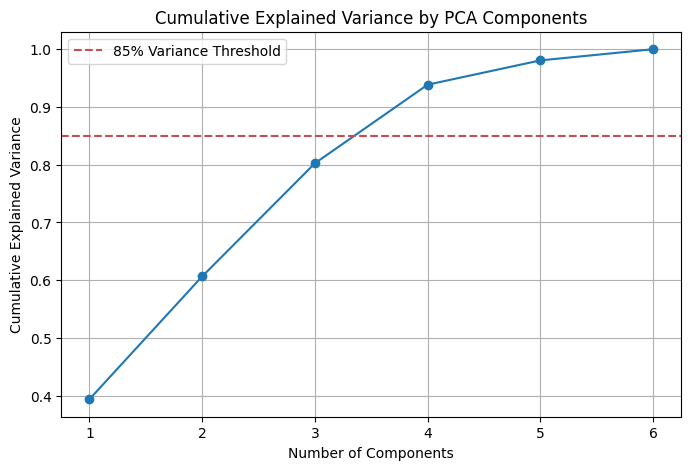

In [ ]:
# Fit PCA
pca = PCA()
pca.fit(df_rfm)

# Explained Variance Ratio
explained_var = pca.explained_variance_ratio_
cumulative_var = explained_var.cumsum()

# Visualisasi cumulative variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_var) + 1), cumulative_var, marker='o')
plt.axhline(y=0.85, color='r', linestyle='--', label='85% Variance Threshold')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.legend()

In [ ]:
# PCA dengan 2 komponen
pca_2_rfm = PCA(n_components=2)
X_pca_2_rfm = pca_2_rfm.fit_transform(df_rfm)
pca_columns_2_rfm = [f'PC{i+1}' for i in range(2)]
X_pca_df_2_rfm = pd.DataFrame(X_pca_2_rfm, columns=pca_columns_2_rfm)

# PCA dengan 3 komponen
pca_3_rfm = PCA(n_components=3)
X_pca_3_rfm = pca_3_rfm.fit_transform(df_rfm)
pca_columns_3_rfm = [f'PC{i+1}' for i in range(3)]
X_pca_df_3_rfm = pd.DataFrame(X_pca_3_rfm, columns=pca_columns_3_rfm)

In [ ]:
# Contoh tampilkan masing-masing 3 sampel
print("PCA - 2 Components:")
print(X_pca_df_2_rfm.sample(3))
print("\nPCA - 3 Components:")
print(X_pca_df_3_rfm.sample(3))

PCA - 2 Components:
           PC1       PC2
1406 -0.241771  0.252566
1842 -0.407197 -0.129246
355  -0.363434 -0.198553

PCA - 3 Components:
           PC1       PC2       PC3
503   0.015814  0.591668 -0.126746
667  -0.331133 -0.194851 -0.107863
1546 -0.309027 -0.328746 -0.362943


In [ ]:
# Dictionary untuk menyimpan hasil inertia dan silhouette
inertia_scores = {}
silhouette_scores = {}

# Daftar jumlah komponen PCA yang mau kita hitung (khusus RFM + Loyalty)
pca_sets = {
    2: X_pca_df_2_rfm,
    3: X_pca_df_3_rfm
}

# Iterasi untuk masing-masing jumlah komponen PCA
for n_comp, X_pca in pca_sets.items():
    inertia = []
    silhouette = []

    for k in range(2, 10):
        kmeans = KMeans(n_clusters=k, random_state=12, n_init=10)
        kmeans.fit(X_pca)
        inertia.append(kmeans.inertia_)
        silhouette.append(silhouette_score(X_pca, kmeans.labels_))

    inertia_scores[n_comp] = inertia
    silhouette_scores[n_comp] = silhouette

# Unpack ke variabel untuk visualisasi nanti
inertia_2 = inertia_scores[2]
silhouette_2 = silhouette_scores[2]

inertia_3 = inertia_scores[3]
silhouette_3 = silhouette_scores[3]

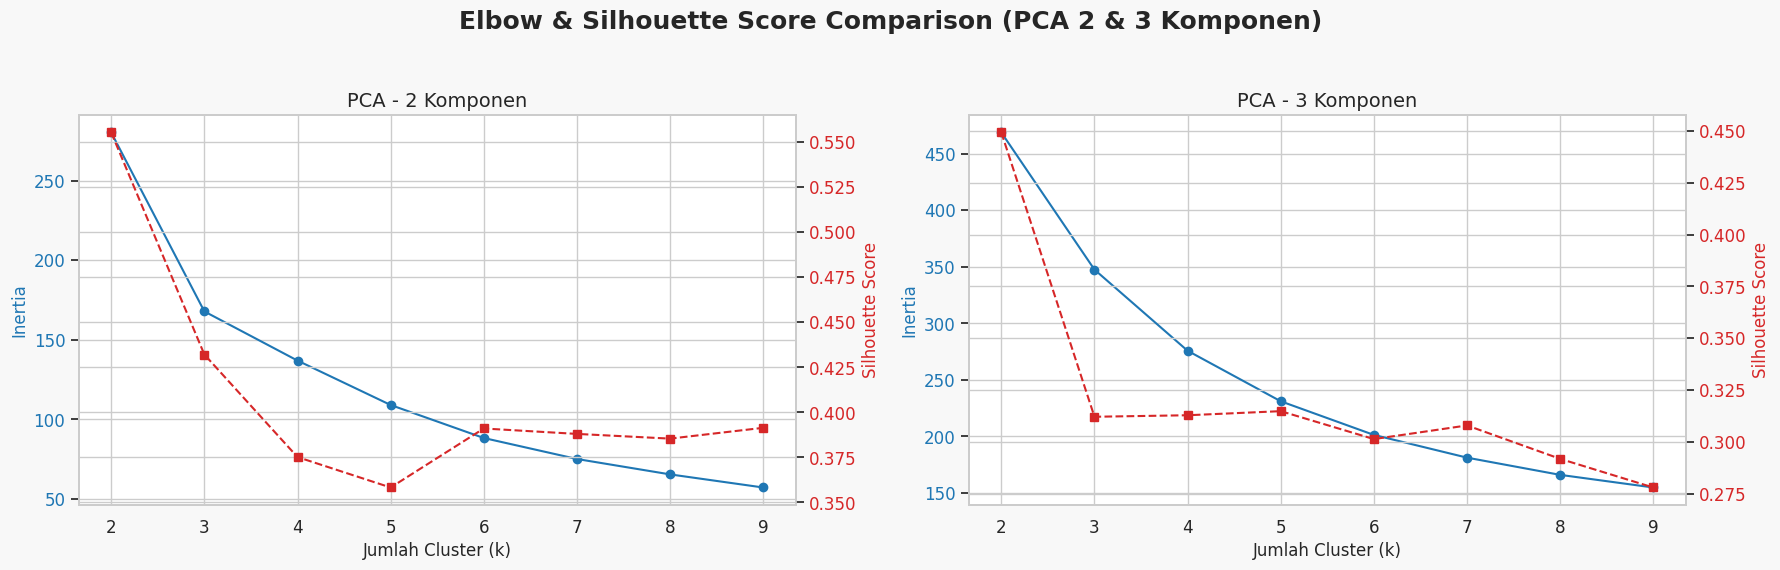

In [ ]:
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Setup subplot 1x2 karena hanya pakai PCA 2 dan 3 komponen
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Elbow & Silhouette Score Comparison (PCA 2 & 3 Komponen)', fontsize=18, fontweight='bold')
fig.patch.set_facecolor("#F8F8F8")

# Fungsi bantu plot kombinasi inertia & silhouette
def plot_metric(ax, inertia, silhouette, title):
    ax.plot(range(2, 10), inertia, marker='o', linestyle='-', color='#1f77b4')
    ax.set_xlabel('Jumlah Cluster (k)', fontsize=12)
    ax.set_ylabel('Inertia', fontsize=12, color='#1f77b4')
    ax.tick_params(axis='y', labelcolor='#1f77b4')

    ax2 = ax.twinx()
    ax2.plot(range(2, 10), silhouette, marker='s', linestyle='--', color='#d62728')
    ax2.set_ylabel('Silhouette Score', fontsize=12, color='#d62728')
    ax2.tick_params(axis='y', labelcolor='#d62728')

    ax.set_title(title, fontsize=14)

# Plot untuk PCA 2 dan 3 komponen
plot_metric(axs[0], inertia_2, silhouette_2, 'PCA - 2 Komponen')
plot_metric(axs[1], inertia_3, silhouette_3, 'PCA - 3 Komponen')

# Tata letak
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15, 8))
fig.set_facecolor("#F5F5F5")  # Warna latar belakang yang bersih dan lembut

# Loop jumlah cluster dari 2 sampai 5
for k in range(2, 6):
    # Inisialisasi KMeans
    kmeans = KMeans(n_clusters=k, random_state=12, n_init=10)

    # Tentukan posisi subplot
    row, col = divmod(k-2, 2)

    # Buat visualisasi Silhouette
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[row][col])
    visualizer.fit(X_pca_df_2_rfm)  # Gunakan data hasil PCA 2 komponen dari df_rfm

    # Tambahkan judul dan label sumbu
    ax[row][col].set_title(f'Silhouette Plot (k = {k}) - PCA 2 RFM', fontsize=13, fontweight='bold')
    ax[row][col].set_xlabel('Koefisien Silhouette', fontsize=11)
    ax[row][col].set_ylabel('Label Klaster', fontsize=11)
    ax[row][col].grid(True, linestyle='--', alpha=0.5)

# Rapikan layout antar plot
plt.tight_layout()
plt.show()

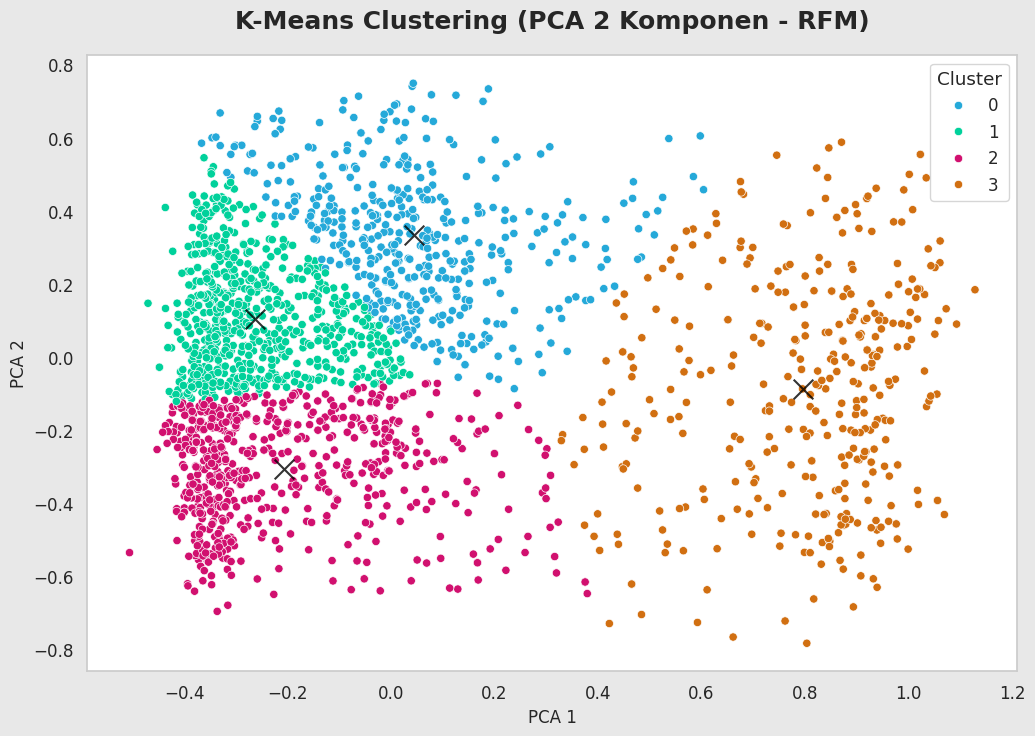

In [ ]:
# Inisialisasi dan fit model
kmeans_pca2_rfm = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_pca2_rfm.fit(X_pca_df_2_rfm)

# Tambahkan hasil klaster ke data
X_pca_df_2_rfm['Cluster'] = kmeans_pca2_rfm.labels_

# Create a new figure with a specified size and background color
plt.figure(figsize=(12, 8), facecolor='#E8E8E8')

# Warna palette custom
palt = ['#25A9D9', '#00D19B', '#D1106F', '#D16F11']

# Plot scatter hasil klasterisasi
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=X_pca_df_2_rfm, palette=palt)

# Ambil koordinat pusat klaster dari model KMeans
centroids = kmeans_pca2_rfm.cluster_centers_

# Plot pusat klaster sebagai tanda 'x' hitam
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.8, marker='x')

# Set judul dan label
plt.title('K-Means Clustering (PCA 2 Komponen - RFM)', fontsize=18, fontweight='bold', y=1.03)
plt.xlabel('PCA 1', fontsize=12)
plt.ylabel('PCA 2', fontsize=12)
plt.grid(False)
plt.show()

### **PCA no use feature RFM**

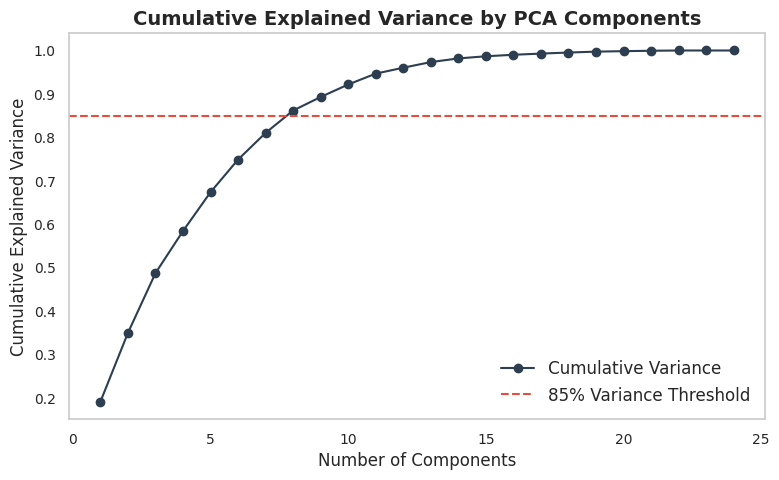

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(X_scaled)

# Explained Variance Ratio
explained_var = pca.explained_variance_ratio_
cumulative_var = explained_var.cumsum()

# Visualisasi dengan style & palette custom
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_var) + 1), cumulative_var,
         marker='o', linestyle='-', color='#2c3e50', label='Cumulative Variance')

# Garis threshold 85%
plt.axhline(y=0.85, color='#e74c3c', linestyle='--', label='85% Variance Threshold')

# Styling
plt.title('Cumulative Explained Variance by PCA Components', fontsize=14, fontweight='bold')
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)  # Remove grid
plt.legend(frameon=False)
plt.tight_layout()
plt.show()

Kita ingin mengambil jumlah komponen PCA yang mampu menjelaskan >85% variansi data.

Dari grafik, terlihat bahwa komponen ke-8 merupakan titik di mana cumulative explained variance baru saja melewati 85% (threshold yang ditandai dengan garis merah putus-putus).

Setelah komponen ke-8, penambahan komponen berikutnya tidak memberikan peningkatan signifikan (diminishing returns), sehingga tidak efisien secara model.

Maka, komponen 1–8 sudah optimal untuk digunakan, karena mampu menangkap informasi utama tanpa terlalu banyak kehilangan insight penting dari data asli.

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

# PCA dengan 2 komponen
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)
pca_columns_2 = [f'PC{i+1}' for i in range(2)]
X_pca_df_2 = pd.DataFrame(X_pca_2, columns=pca_columns_2)

# PCA dengan 3 komponen
pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X_scaled)
pca_columns_3 = [f'PC{i+1}' for i in range(3)]
X_pca_df_3 = pd.DataFrame(X_pca_3, columns=pca_columns_3)

# PCA dengan 4 komponen
pca_4 = PCA(n_components=4)
X_pca_4 = pca_4.fit_transform(X_scaled)
pca_columns_4 = [f'PC{i+1}' for i in range(4)]
X_pca_df_4 = pd.DataFrame(X_pca_4, columns=pca_columns_4)

# PCA dengan 8 komponen
pca_8 = PCA(n_components=8)
X_pca_8 = pca_8.fit_transform(X_scaled)
pca_columns_8 = [f'PC{i+1}' for i in range(8)]
X_pca_df_8 = pd.DataFrame(X_pca_8, columns=pca_columns_8)


In [ ]:
# Contoh tampilkan masing-masing 3 sampel
print("PCA - 2 Components:")
print(X_pca_df_2.sample(3))
print("\nPCA - 3 Components:")
print(X_pca_df_3.sample(3))
print("PCA - 4 Components:")
print(X_pca_df_4.sample(3))
print("\nPCA - 8 Components:")
print(X_pca_df_8.sample(3))

PCA - 2 Components:
           PC1       PC2
876  -0.886878 -0.623948
1609  0.620738  0.165420
895  -0.437131  0.064345

PCA - 3 Components:
           PC1       PC2       PC3
1049  0.385754  0.255218  0.575585
633   0.281356  0.403861 -0.799986
1755  0.483294 -0.536494 -0.841109
PCA - 4 Components:
           PC1       PC2       PC3       PC4
291  -0.747174 -0.693239 -0.173507 -0.351780
1440  0.518796 -0.526847 -0.281412  0.088595
984  -0.621958  1.221892  0.794500 -0.298737

PCA - 8 Components:
           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
529   0.611549 -0.244803  0.572536 -0.119026  0.452200 -0.052432 -0.089962   
1630  0.303239  0.490487 -0.144097 -0.051107  0.257023 -0.676598 -0.436322   
2086  0.425821  0.365668  0.610201  0.550378  0.121554  0.454379 -0.274561   

           PC8  
529   0.498561  
1630  0.084545  
2086 -0.884582  


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Dictionary untuk menyimpan hasil inertia dan silhouette
inertia_scores = {}
silhouette_scores = {}

# Daftar jumlah komponen PCA yang mau kita hitung
pca_sets = {
    2: X_pca_df_2,
    3: X_pca_df_3,
    4: X_pca_df_4,
    8: X_pca_df_8
}

# Iterasi untuk masing-masing jumlah komponen PCA
for n_comp, X_pca in pca_sets.items():
    inertia = []
    silhouette = []

    for k in range(2, 10):
        kmeans = KMeans(n_clusters=k, random_state=12, n_init=10)
        kmeans.fit(X_pca)
        inertia.append(kmeans.inertia_)
        silhouette.append(silhouette_score(X_pca, kmeans.labels_))

    inertia_scores[n_comp] = inertia
    silhouette_scores[n_comp] = silhouette

# Unpack ke variabel agar sesuai dengan visualisasi sebelumnya
inertia_2 = inertia_scores[2]
silhouette_2 = silhouette_scores[2]

inertia_3 = inertia_scores[3]
silhouette_3 = silhouette_scores[3]

inertia_4 = inertia_scores[4]
silhouette_4 = silhouette_scores[4]

inertia_8 = inertia_scores[8]
silhouette_8 = silhouette_scores[8]


### **Elbow & Silhouette**

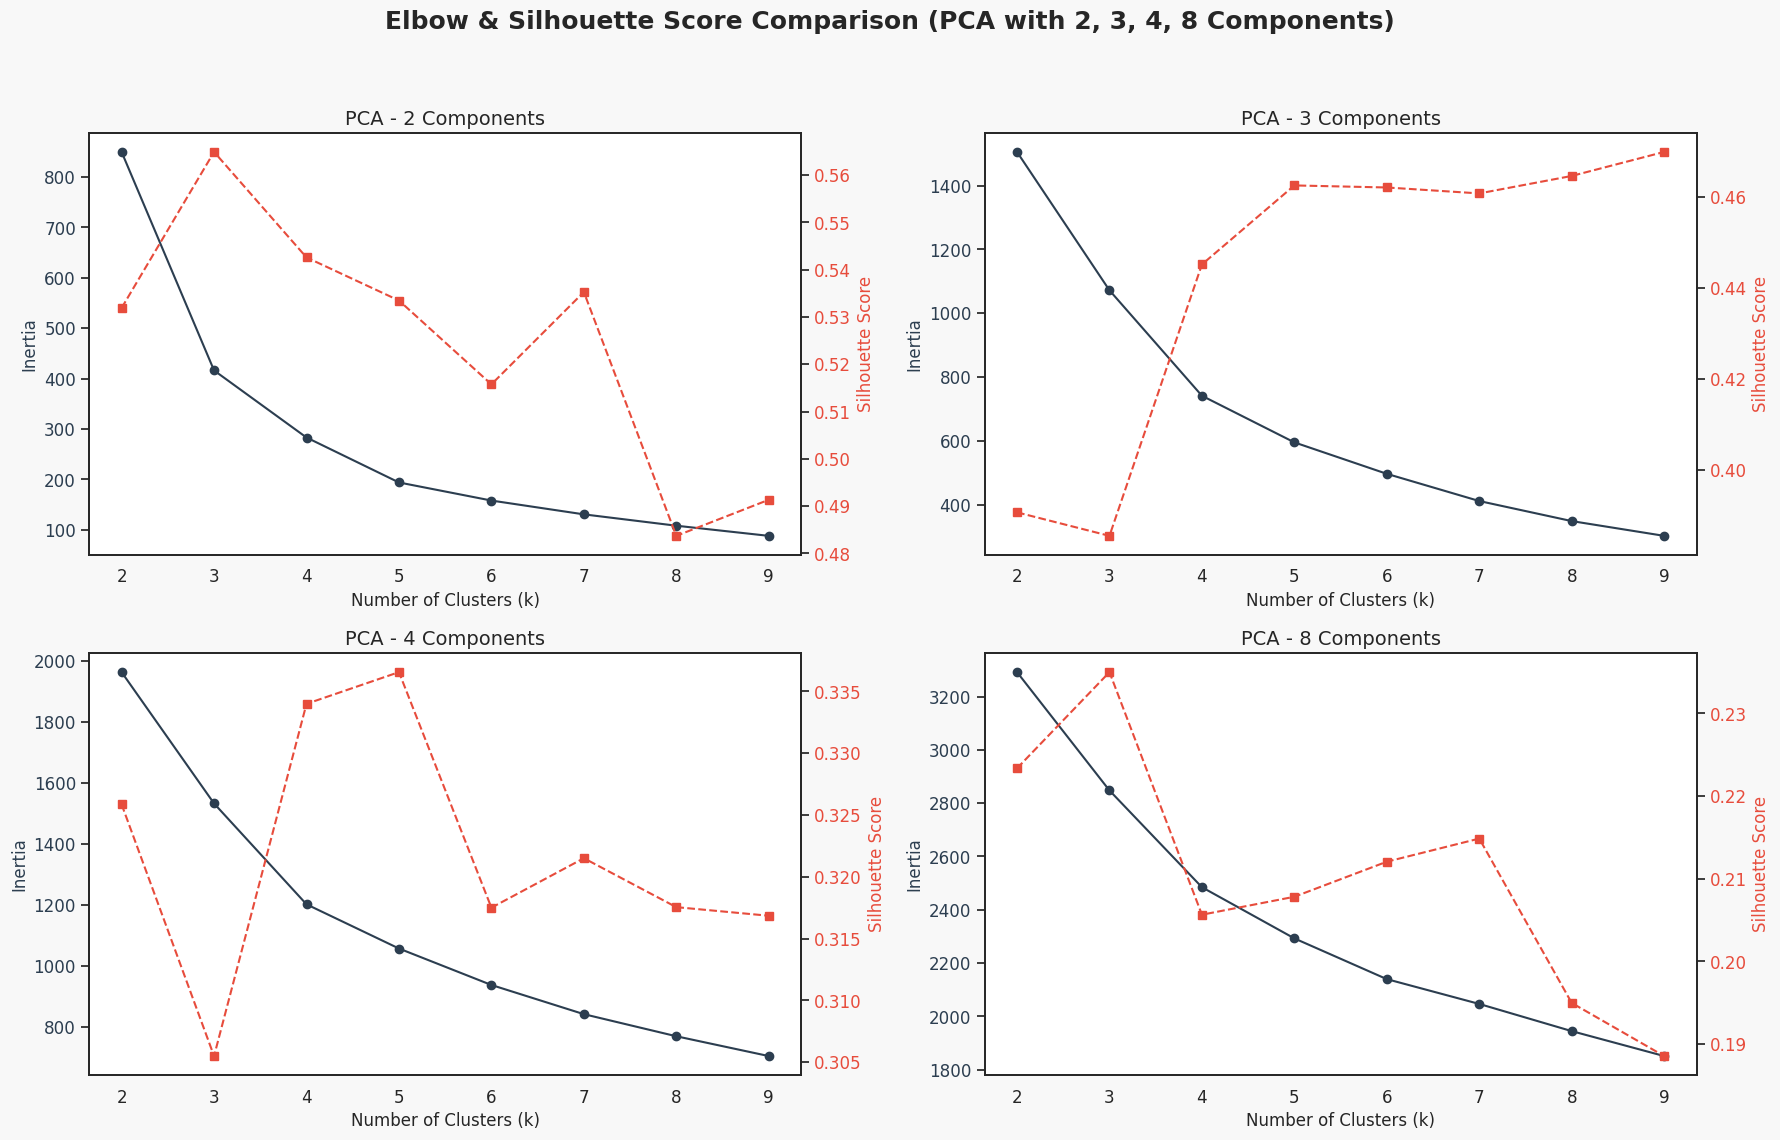

In [ ]:
# Custom color palette matching slide style
sns.set(style="white", font_scale=1.1)  # "white" to remove grid background

# Setup subplot 2x2
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Elbow & Silhouette Score Comparison (PCA with 2, 3, 4, 8 Components)',
             fontsize=18, fontweight='bold')
fig.patch.set_facecolor("#F8F8F8")

# Custom colors
inertia_color = "#2c3e50"     # Dark blue/gray
silhouette_color = "#e74c3c"  # Soft red

# Helper function to plot combined inertia & silhouette
def plot_metric(ax, inertia, silhouette, title):
    ax.plot(range(2, 10), inertia, marker='o', linestyle='-', color=inertia_color)
    ax.set_xlabel('Number of Clusters (k)', fontsize=12)
    ax.set_ylabel('Inertia', fontsize=12, color=inertia_color)
    ax.tick_params(axis='y', labelcolor=inertia_color)
    ax.grid(False)  # remove grid from left axis

    ax2 = ax.twinx()
    ax2.plot(range(2, 10), silhouette, marker='s', linestyle='--', color=silhouette_color)
    ax2.set_ylabel('Silhouette Score', fontsize=12, color=silhouette_color)
    ax2.tick_params(axis='y', labelcolor=silhouette_color)
    ax2.grid(False)  # remove grid from right axis

    ax.set_title(title, fontsize=14)

# Plot each combination
plot_metric(axs[0, 0], inertia_2, silhouette_2, 'PCA - 2 Components')
plot_metric(axs[0, 1], inertia_3, silhouette_3, 'PCA - 3 Components')
plot_metric(axs[1, 0], inertia_4, silhouette_4, 'PCA - 4 Components')
plot_metric(axs[1, 1], inertia_8, silhouette_8, 'PCA - 8 Components')

# Layout adjustment
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Inertia: Semakin kecil, semakin baik (mengindikasikan cluster yang lebih kompak).

Silhouette Score: Semakin mendekati 1, semakin baik (mengukur pemisahan antar cluster).

Cari keseimbangan antara keduanya dan perhatikan “elbow” serta puncak silhouette.

✅ PCA dengan 3 Komponen:

Silhouette Score tertinggi muncul pada k = 6 dan k = 5, dengan nilai ~0.48–0.49 (tertinggi dibanding lainnya).

Inertia turun signifikan dan cukup stabil setelah k = 5–6.

→ Ini jadi kandidat terbaik.

❌ PCA dengan 2 Komponen:

Meskipun inertia cukup rendah, silhouette score stagnan setelah k = 3 dan malah menurun.

Tidak ada peningkatan signifikan setelah k = 4.

❌ PCA dengan 4 Komponen:

Inertia menurun stabil, tapi silhouette score lebih rendah (~0.31–0.37).

Tidak ada puncak tajam, lebih datar dan kurang terpisah.

❌ PCA dengan 8 Komponen:

Inertia memang lebih tinggi karena dimensi lebih kompleks.

Tapi silhouette score paling rendah (sekitar 0.19–0.22), artinya pemisahan antar cluster buruk.

**Pemilihan PCA 3**

Memberikan kombinasi terbaik antara inertia yang masuk akal dan silhouette score tertinggi (~0.49).

Cluster terlihat paling optimal untuk dilanjutkan ke tahap modeling dan interpretasi persona.

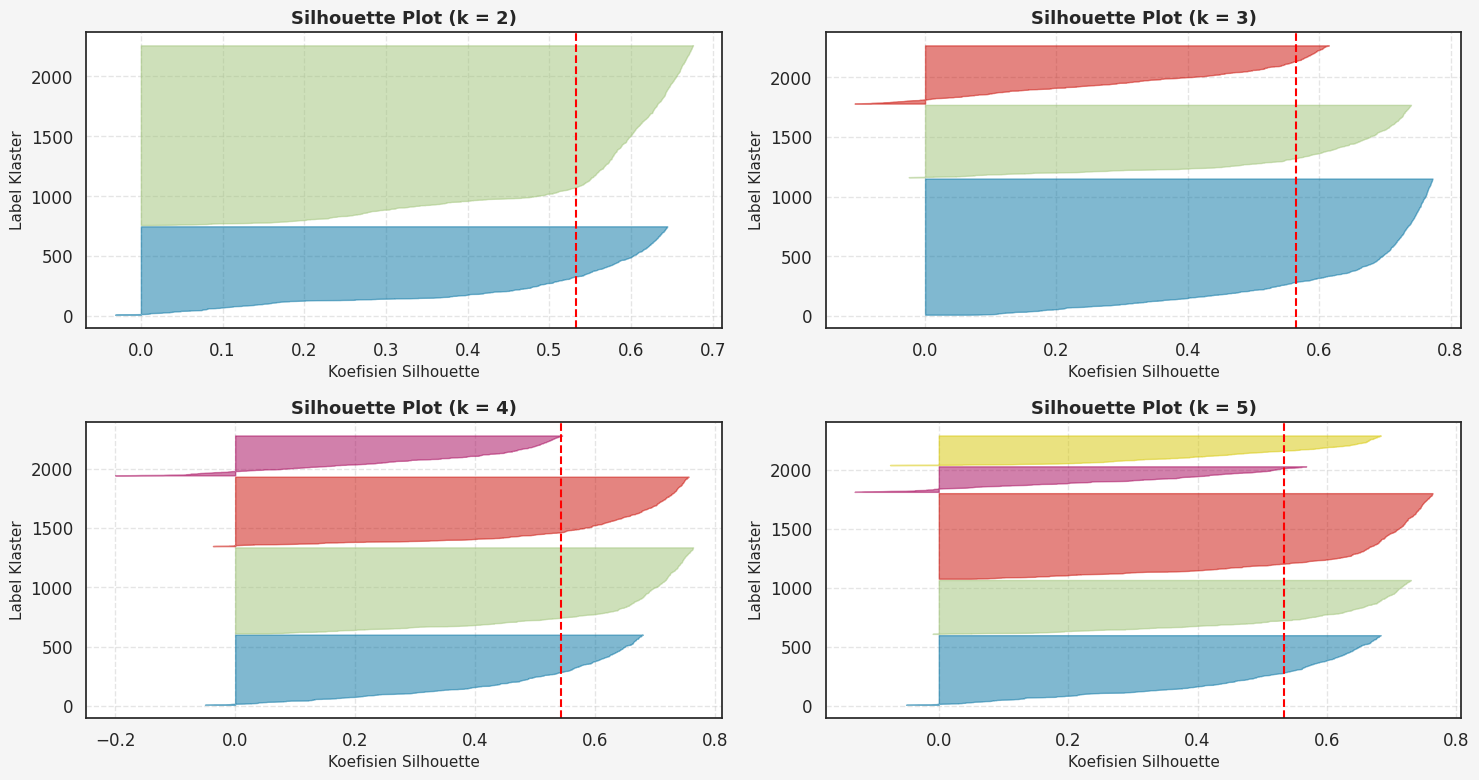

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

# Buat subplot 2x2
fig, ax = plt.subplots(2, 2, figsize=(15, 8))
fig.set_facecolor("#F5F5F5")  # Warna latar belakang yang bersih dan lembut

# Loop jumlah cluster dari 2 sampai 5
for k in range(2, 6):
    # Inisialisasi KMeans
    kmeans = KMeans(n_clusters=k, random_state=12, n_init=10)

    # Tentukan posisi subplot
    row, col = divmod(k-2, 2)

    # Buat visualisasi Silhouette
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[row][col])
    visualizer.fit(X_pca_df_2)  # Gunakan data hasil PCA 3 komponen

    # Tambahkan judul dan label sumbu
    ax[row][col].set_title(f'Silhouette Plot (k = {k})', fontsize=13, fontweight='bold')
    ax[row][col].set_xlabel('Koefisien Silhouette', fontsize=11)
    ax[row][col].set_ylabel('Label Klaster', fontsize=11)
    ax[row][col].grid(True, linestyle='--', alpha=0.5)

# Rapikan layout antar plot
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans

# Ambil data PCA 2 komponen
X_pca = pca_sets[2]

# Fit KMeans dengan 4 klaster
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Hitung Davies-Bouldin Index
dbi_score = davies_bouldin_score(X_pca, cluster_labels)

# Hitung Calinski-Harabasz Score
ch_score = calinski_harabasz_score(X_pca, cluster_labels)

print(f"Davies-Bouldin Index: {dbi_score:.3f}")
print(f"Calinski-Harabasz Score: {ch_score:.3f}")

Davies-Bouldin Index: 0.670
Calinski-Harabasz Score: 3669.149


In [ ]:
pca_sets = {
    2: X_pca_df_2,
    3: X_pca_df_3,
    4: X_pca_df_4,
    8: X_pca_df_8
}

# Prepare list to store results
results = []

# Loop through each PCA set and number of clusters
for n_components, X_pca in pca_sets.items():
    for n_clusters in range(2, 10):  # Cluster count from 2 to 9
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels = kmeans.fit_predict(X_pca)
        db_index = davies_bouldin_score(X_pca, labels)
        ch_score = calinski_harabasz_score(X_pca, labels)
        results.append({
            'PCA Components': n_components,
            'Clusters': n_clusters,
            'Davies-Bouldin Index': db_index,
            'Calinski-Harabasz Score': ch_score
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df.sort_values(by=['PCA Components', 'Clusters'], inplace=True)
results_df.reset_index(drop=True, inplace=True)
results_df

PCA Components  Clusters  Davies-Bouldin Index  Calinski-Harabasz Score
0                2         2              0.822233              2177.364359
1                2         3              0.664841              3383.887871
2                2         4              0.669628              3669.148549
3                2         5              0.687535              4273.093319
4                2         6              0.707437              4294.703562
5                2         7              0.759764              4286.599861
6                2         8              0.787445              4485.995511
7                2         9              0.818988              4320.499739
8                3         2              1.187984              1233.268266
9                3         3              1.052913              1265.503532
10               3         4              0.854668              1602.845111
11               3         5              0.913446              1487.063193
12               3         6              0.894653              1445.408724
13               3         7              0.867732              1373.799063
14               3         8              0.900645              1363.196192
15               3         9              0.786541              1760.894316
16               4         2              1.384266               953.349569
17               4         3              1.324353               924.873232
18               4         4              1.104224               991.250130
19               4         5              1.130407               889.873191
20               4         6              1.199642               829.054251
21               4         7              1.203783               866.414283
22               4         8              1.214435               738.924854
23               4         9              1.111835               799.161629
24               8         2              1.841233               570.865358
25               8         3              1.885708               499.183666
26               8         4              1.622823               494.080076
27               8         5              1.625258               448.236077
28               8         6              1.851716               396.192892
29               8         7              1.729366               374.939833
30               8         8              1.807665               351.063385
31               8         9              1.725452               323.531378

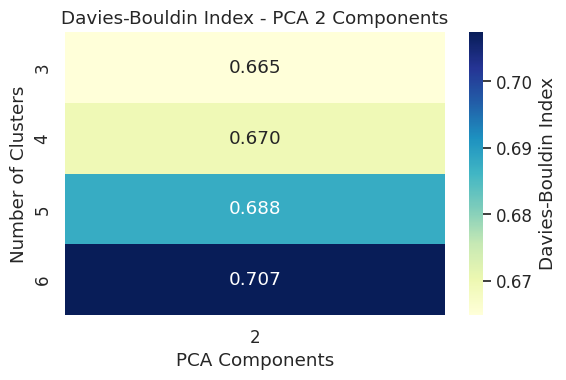

In [ ]:
# Filter data untuk PCA=2 dan Clusters=3 sampai 6
filtered_df = results_df[(results_df["PCA Components"] == 2) & (results_df["Clusters"].between(3, 6))]

# Set index dan pivot untuk heatmap
heatmap_data = filtered_df.pivot(index="Clusters", columns="PCA Components", values="Davies-Bouldin Index")

# Buat heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="YlGnBu", cbar_kws={'label': 'Davies-Bouldin Index'})
plt.title("Davies-Bouldin Index - PCA 2 Components")
plt.xlabel("PCA Components")
plt.ylabel("Number of Clusters")
plt.tight_layout()
plt.show()

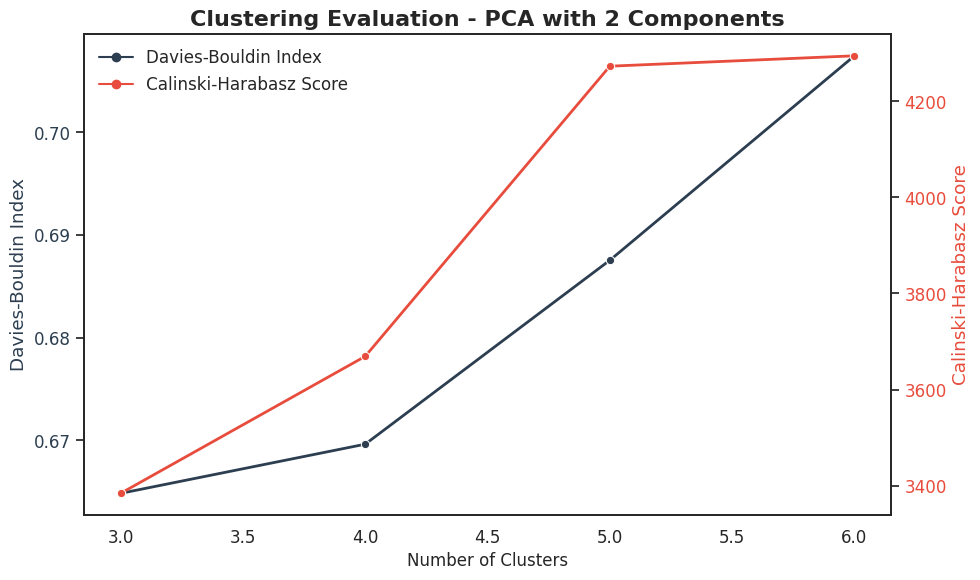

In [ ]:
# Filter data for PCA = 2 and cluster numbers from 3 to 6
filtered_df = results_df[(results_df["PCA Components"] == 2) & (results_df["Clusters"].between(3, 6))]

# Set clean style and consistent font scale
sns.set(style="white", font_scale=1.1)
plt.figure(figsize=(10, 6))
plt.title("Clustering Evaluation - PCA with 2 Components", fontsize=16, fontweight='bold')

dbi_color = "#2c3e50"
ch_score_color = "#e74c3c"

# Left y-axis: Davies-Bouldin Index
ax1 = plt.gca()
sns.lineplot(
    data=filtered_df,
    x="Clusters",
    y="Davies-Bouldin Index",
    marker="o",
    color=dbi_color,
    linewidth=2,
    ax=ax1
)
ax1.set_ylabel("Davies-Bouldin Index", color=dbi_color)
ax1.tick_params(axis='y', labelcolor=dbi_color)

# Right y-axis: Calinski-Harabasz Score
ax2 = ax1.twinx()
sns.lineplot(
    data=filtered_df,
    x="Clusters",
    y="Calinski-Harabasz Score",
    marker="o",
    color=ch_score_color,
    linewidth=2,
    ax=ax2
)
ax2.set_ylabel("Calinski-Harabasz Score", color=ch_score_color)
ax2.tick_params(axis='y', labelcolor=ch_score_color)

# X-axis label and clean layout
ax1.set_xlabel("Number of Clusters", fontsize=12)
ax1.grid(False)
ax2.grid(False)

# Manual legend with matching colors
dbi_line = plt.Line2D([], [], color=dbi_color, marker="o", label="Davies-Bouldin Index")
ch_line = plt.Line2D([], [], color=ch_score_color, marker="o", label="Calinski-Harabasz Score")
ax1.legend(handles=[dbi_line, ch_line], loc="upper left", frameon=False)

plt.tight_layout()
plt.show()

#### **Why PCA 2 + k=4 adalah kombinasi terbaik?**

Berdasarkan visualisasi dan metrik silhouette, kombinasi PCA 2 dengan k = 4 memberikan segmentasi pelanggan yang paling optimal. Pendekatan ini menyeimbangkan kualitas clustering, kemudahan interpretasi, dan potensi dampak bisnis, sehingga cocok digunakan dalam strategi marketing berbasis personality.

In [ ]:
# Set jumlah cluster optimal ke 4
k_optimal = 4

# Inisialisasi objek KMeans dengan jumlah cluster optimal
kmeans = KMeans(n_clusters=k_optimal, random_state=120, n_init='auto')

# Fit model KMeans ke data hasil PCA (2 komponen)
kmeans.fit(X_pca_df_2)

# Tambahkan label klaster ke dataframe PCA
X_pca_df_2['Cluster'] = kmeans.labels_

# Tampilkan dataframe hasil klastering
X_pca_df_2

PC1       PC2  Cluster
0    -0.685708  0.598916        3
1     0.563186 -0.260281        1
2     0.326873  0.495269        2
3     0.644199 -0.451601        1
4     0.605404 -0.009496        1
...        ...       ...      ...
2235 -0.815279 -0.278926        0
2236 -0.942169 -0.086433        3
2237  0.263847  0.594758        2
2238  0.424123  0.280731        1
2239  0.271535  0.205101        1

[2240 rows x 3 columns]

## **K-Means Clustering**

In [ ]:
from sklearn.cluster import KMeans

# Inisialisasi dan fit model
kmeans_pca2 = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_pca2.fit(X_pca_df_2)

# Tambahkan hasil klaster ke data
X_pca_df_2['Cluster'] = kmeans_pca2.labels_

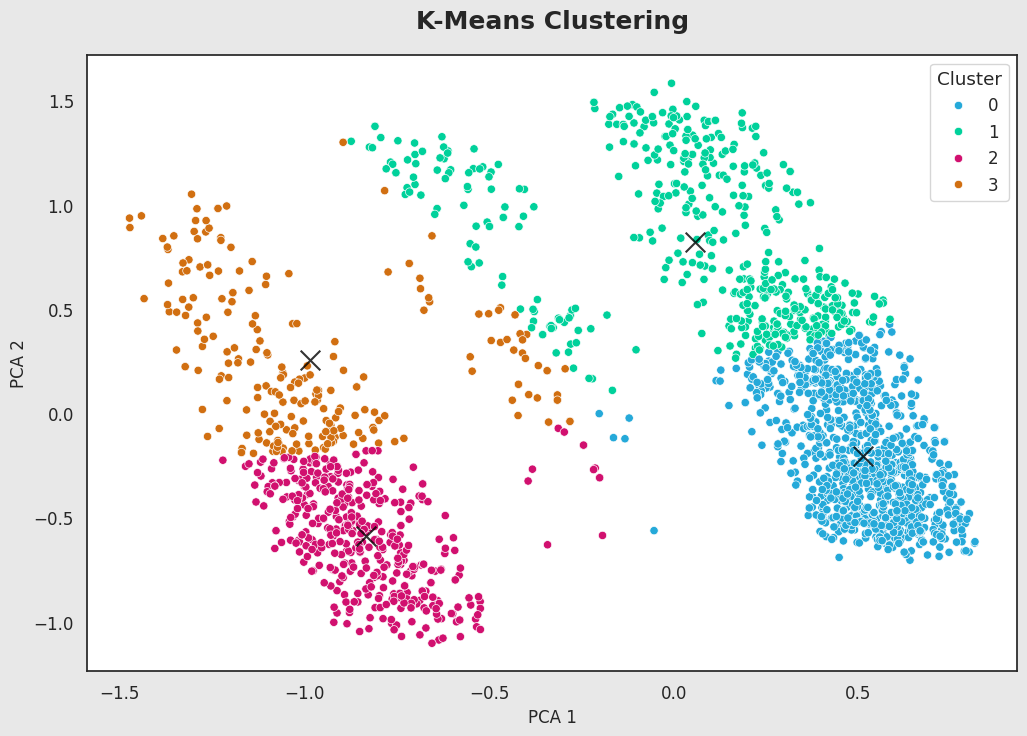

In [ ]:
# Create a new figure with a specified size and background color
plt.figure(figsize=(12,8), facecolor='#E8E8E8')

# Create a scatter plot of the first principal component ('PC1') against the second principal component ('PC2')
# The points are colored according to their cluster label
palt = ['#25A9D9', '#00D19B', '#D1106F', '#D16F11']
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=X_pca_df_2, palette=palt)

# Get the coordinates of the cluster centers from the KMeans model
centroids = kmeans.cluster_centers_
# Plot the cluster centers as black 'x' markers
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.8, marker='x')

# Set the title for the plot
plt.title('K-Means Clustering', fontsize=18, fontweight='bold', y=1.03)
# Set the label for the x-axis
plt.xlabel('PCA 1', fontsize=12)
# Set the label for the y-axis
plt.ylabel('PCA 2', fontsize=12)
# Remove the grid from the plot
plt.grid(False)
# Display the plot
plt.show()

# **4.Customer Personality Analysis for Marketing Retargeting**

**Hasil Akhir Menggunakan semua Feature yang sudah dipilih bukan berdasarkan RFM + loyalty saja**

In [ ]:
# Reset index agar bisa digabung
X_pca_df_2 = X_pca_df_2.reset_index(drop=True)

# Gabungkan cluster label ke data asli yang sudah diencoding
dfe_clustered = pd.concat([dfe_evaluation, X_pca_df_2['Cluster']], axis=1)

# Tampilkan beberapa baris hasil akhir
dfe_clustered.sample(35)

education marital_status      income  recency  mntcoke  mntfruits  \
969         S1    Bertunangan  44010000.0       46   186000      36000   
2065        S1          Janda  67046000.0       92   544000      35000   
1909        S2        Menikah  31535000.0       95    15000       4000   
201         S1         Lajang  75922000.0       60   265000      81000   
485         S3          Cerai  78825000.0       35   483000      74000   
1452        S1         Lajang  73892000.0       40   703000      81000   
1562        S1        Menikah  24645000.0       16     5000       3000   
1831        S1    Bertunangan  44911000.0       11   159000          0   
1321        S2    Bertunangan  46692000.0       37   170000       6000   
2073        S3         Lajang  42000000.0       23   124000      81000   
767         S1    Bertunangan  67430000.0        6   595000      81000   
1299        S1         Lajang   7500000.0        5     6000       5000   
980         D3          Janda  46779000.0       55    12000       1000   
454         S1        Menikah  65991000.0       21   507000      19000   
696         S1         Lajang  34824000.0       65     4000       2000   
704         S2          Cerai  41335000.0       24   112000      19000   
264         S2    Bertunangan  43776000.0        9   177000       2000   
1881        S3        Menikah  30396000.0       22    15000          0   
1785        S1         Lajang  46904000.0       20   153000       4000   
3           S1    Bertunangan  26646000.0       26    11000       4000   
247         S1        Menikah  75027000.0       74   925000      64000   
1644        D3    Bertunangan  75774000.0       27   340000      21000   
2062        S3    Bertunangan  70038000.0       54   587000      54000   
886         S3         Lajang  46231000.0       87   189000       2000   
457         S2        Menikah  42207000.0       71   116000      11000   
1214        S1        Menikah  56721000.0       64   157000       6000   
859         D3        Menikah  85710000.0        5   600000      20000   
1687        S1    Bertunangan  56534000.0       35   691000       7000   
672         S1          Janda  66731000.0       33   371000      81000   
2063        S1    Bertunangan  42554000.0       93    29000       1000   
1777        S3        Menikah  28973000.0       59   206000          0   
745         S1    Bertunangan  83844000.0       57   901000      31000   
1629        D3    Bertunangan  36301000.0       53    11000      12000   
1346        D3        Menikah  26887000.0       27     6000       7000   
837         S1          Cerai  81702000.0       98   563000      50000   

      mntmeatproducts  mntfishproducts  mntsweetproducts  mntgoldprods  \
969            234000            86000             72000         48000   
2065           133000            23000             81000        107000   
1909            13000                0                 0         19000   
201            553000           120500             23000         92000   
485            114000           120500             37000         18000   
1452           556000                0             58000         43000   
1562             4000             4000              1000             0   
1831            22000             2000              1000         31000   
1321            97000            24000             12000         88000   
2073           267000            85000             59000         35000   
767            291000           120500             81000        121000   
1299             4000            13000              4000         25000   
980              3000                0                 0          7000   
454            364000            25000             47000          9000   
696             11000             2000                 0          4000   
704             21000            16000             14000          5000   
264             71000             3000              2000         20000   
1881    

In [ ]:
# Hitung statistik deskriptif tiap cluster
cluster_summary = dfe_clustered.groupby('Cluster').agg({
    'income': 'mean',
    'total_spent': 'mean',
    'total_purchases': 'mean',
    'conversion_rate': 'mean',
    'recency': 'mean',
    'numwebvisitsmonth': 'mean',
    'age': 'mean'
}).round(2)

cluster_summary

income  total_spent  total_purchases  conversion_rate  recency  \
Cluster                                                                        
0        42300561.57    268094.80            11.15             0.01    49.73   
1        74873509.39   1340009.63            20.73             0.18    48.19   
2        40625470.86    335589.74            14.26             0.02    50.09   
3        67029834.06   1076257.64            20.46             0.15    46.39   

         numwebvisitsmonth    age  
Cluster                            
0                     5.57  55.23  
1                     3.08  57.48  
2                     7.24  55.14  
3                     5.28  59.40

In [ ]:
# Buat distribusi kategorikal seperti channel preference, income level, dsb.
categorical_cols = ['channel_preference', 'income_level', 'age_group', 'recency_group']
for col in categorical_cols:
    print(f"\nDistribusi {col} per Cluster:\n")
    display(pd.crosstab(dfe_clustered['Cluster'], dfe_clustered[col], normalize='index') * 100)


Distribusi channel_preference per Cluster:



channel_preference    Catalog      Store        Web
Cluster                                            
0                    0.464684  99.535316   0.000000
1                   19.565217  80.434783   0.000000
2                    2.797203   0.000000  97.202797
3                   19.213974   0.000000  80.786026


Distribusi income_level per Cluster:



income_level  Low Income  Moderate Income  High Income  Very High Income
Cluster                                                                 
0              37.918216        29.646840    30.018587          2.416357
1               0.395257         3.754941    20.750988         75.098814
2              31.934732        41.724942    24.941725          1.398601
3               0.873362        11.790393    45.414847         41.921397


Distribusi age_group per Cluster:



age_group  Middled-aged Adults  Old Adults  Young Adults
Cluster                                                 
0                    57.156134   34.665428      8.178439
1                    43.083004   46.047431     10.869565
2                    61.305361   31.468531      7.226107
3                    41.484716   51.965066      6.550218


Distribusi recency_group per Cluster:



recency_group     Recent   Moderate  Less Recent  Inactive
Cluster                                                   
0              31.505576  29.553903    29.646840  9.293680
1              33.201581  29.446640    29.446640  7.905138
2              28.904429  30.303030    32.400932  8.391608
3              40.611354  24.890830    24.890830  9.606987


## **Customer Persona for Cluster**
### **Cluster 0**

Income: Rendah-menengah

Spending: Paling rendah

Purchases: Paling sedikit

Channel: 99% Store

Usia: Middle-aged ke atas

Engagement Web: Rendah ➡️ Persona: The Conservative Buyer

Karakter: Belanja hemat, loyal ke toko fisik, pengeluaran kecil, tidak aktif secara digital.

### **Cluster 1**

Income: Sangat tinggi (75% Very High)

Spending: Paling tinggi

Conversion Rate: Tertinggi (0.18)

Channel: Store dan sedikit Catalog

Usia: Tua dan matang ➡️ Persona: The Steady Spender

Karakter: Mapan, pengeluaran tinggi, belanja rutin, stabil, lebih suka toko fisik.

### **Cluster 2**
Income: Rendah-menengah

Spending: Menengah

Web Use: 97% Web channel!

Purchases: Banyak juga ➡️ Persona: The Discount Hunter

Karakter: Aktif online, peka promo, income terbatas tapi rajin belanja, channel digital.

### **Cluster 3**

Income: Tinggi

Spending: Kedua tertinggi

Web Use: 80% Web

Age: Paling tua ➡️ Persona: The Trend Explorer

Karakter: Aktif online, tech-savvy meskipun lebih tua, belanja banyak dan income tinggi.

In [ ]:
# Mapping persona secara objektif berdasarkan insight statistik & distribusi
persona_mapping = {
    0: "The Conservative Buyer",
    1: "The Steady Spender",
    2: "The Discount Hunter",
    3: "The Trend Explorer"
}
df_clusterfinal = dfe_clustered.copy()

# Tambahkan kolom Persona ke dataset
df_clusterfinal['Persona'] = df_clusterfinal['Cluster'].map(persona_mapping)

# Tampilkan beberapa baris hasil akhir
df_clusterfinal.sample(30)

education marital_status      income  recency  mntcoke  mntfruits  \
1581        S2    Bertunangan  78093000.0       53   368000      32000   
456         D3         Lajang  89572000.0       44   606000      24000   
614         S3         Lajang  48240000.0       73   389000      81000   
1711        S2        Menikah  77520000.0       30   940000      44000   
1489        S2    Bertunangan  49854000.0       63   123000      17000   
1927        S1        Menikah  70617000.0       45   353000      61000   
1356        S1        Menikah  38136000.0       69     8000      15000   
1597        S1         Lajang  36108000.0       68   141000       8000   
218         S2          Janda  44551000.0       24   182000       4000   
1363        D3    Bertunangan  52203000.0       36   488000      21000   
1987        S1        Menikah  51373000.0       37    83000       2000   
634         S1         Lajang  83917000.0       12   514000      22000   
1067        D3          Cerai  64176000.0       52  1215000      33000   
699         S1    Bertunangan  78468000.0       29   434000      22000   
403         S1    Bertunangan  30507000.0       29    65000      36000   
1692        S3        Menikah  18169000.0       40     9000          0   
261         S3          Cerai  69674000.0       46   554000      41000   
1637        S1        Menikah  69755000.0       23   217000      77000   
1827        S1    Bertunangan  78394000.0       13   298000      27000   
1114        S3         Lajang  16269000.0       75    19000       3000   
76          S2        Menikah  75251000.0       34   721000      81000   
1195        S2          Cerai  63841000.0       64   635000      15000   
264         S2    Bertunangan  43776000.0        9   177000       2000   
113         S1         Lajang  86037000.0       95   490000      44000   
1465        S2          Cerai  49476000.0       29   386000      23000   
954         S2    Bertunangan  46106000.0       84    30000          0   
867         S2         Lajang  19485000.0       80     6000          0   
1804        S1        Menikah  44689000.0       82    18000          0   
2167        S2         Lajang  91172000.0       94   162000      28000   
2069        S1    Bertunangan  34350000.0       81    16000       3000   

      mntmeatproducts  mntfishproducts  mntsweetproducts  mntgoldprods  \
1581           556000            13000             43000         10000   
456            556000           120500             81000         64000   
614            248000            64000             49000         41000   
1711           396000                0             81000         58000   
1489           171000            39000                 0         30000   
1927           556000            40000             46000         27000   
1356            27000                0             20000         33000   
1597           129000             3000             11000         47000   
218             33000                0                 0         66000   
1363           238000            56000             81000         28000   
1987           101000            64000             26000        117000   
634            556000            42000             81000         79000   
1067           249000            64000             81000        126500   
699            388000           104000             22000         34000   
403             74000            38000             20000        110000   
1692             5000                0                 0          7000   
261            215000            11000                 0         24000   
1637           373000           111000             23000         93000   
1827           556000           120500             24000        126500   
1114            18000             3000              1000             0   
76             556000            97000             18000         18000   
1195           100000            20000              7000        126500   
264     

In [ ]:
import plotly.express as px
df_pca_plot = X_pca_df_2.copy()

persona_mapping = {
    0: '0: The Conservative Buyer',
    1: '1: The Steady Spender',
    2: '2: The Discount Hunter',
    3: '3: The Trend Explorer'
}
df_pca_plot['Persona'] = df_pca_plot['Cluster'].map(persona_mapping)

# Tambah kolom hover data
df_pca_plot['income'] = df_clusterfinal['income']
df_pca_plot['age_group'] = df_clusterfinal['age_group']
df_pca_plot['channel_preference'] = df_clusterfinal['channel_preference']

fig = px.scatter(
    df_pca_plot,
    x='PC1', y='PC2',
    color='Persona',
    symbol='Persona',
    color_discrete_map={
        '0: The Conservative Buyer': '#25A9D9',
        '1: The Steady Spender': '#00D19B',
        '2: The Discount Hunter': '#D1106F',
        '3: The Trend Explorer': '#D16F11'
    },
    symbol_map={
        'The Trend Explorer': 'circle',
        'The Discount Hunter': 'diamond',
        'The Conservative Buyer': 'square',
        'The Steady Spender': 'x'
    },
    hover_data=['income', 'age_group', 'channel_preference']
)

# Tambahkan garis sumbu X dan Y
fig.add_shape(type="line", x0=0, y0=df_pca_plot['PC2'].min(), x1=0, y1=df_pca_plot['PC2'].max(),
              line=dict(color="gray", dash="dash"))

fig.add_shape(type="line", x0=df_pca_plot['PC1'].min(), y0=0, x1=df_pca_plot['PC1'].max(), y1=0,
              line=dict(color="gray", dash="dash"))

# Update layout
fig.update_layout(
    title="<b>Customer Segmentation via PCA Projection</b>",
    title_font=dict(size=22, family="Arial Black"),
    legend_title="Customer Persona",
    template='plotly_white',
    width=1000,
    height=600
)

fig.show()

{
    0: "The Conservative Buyer",
    1: "The Steady Spender",
    2: "The Discount Hunter",
    3: "The Trend Explorer"
}

## **Persona by Age Group**

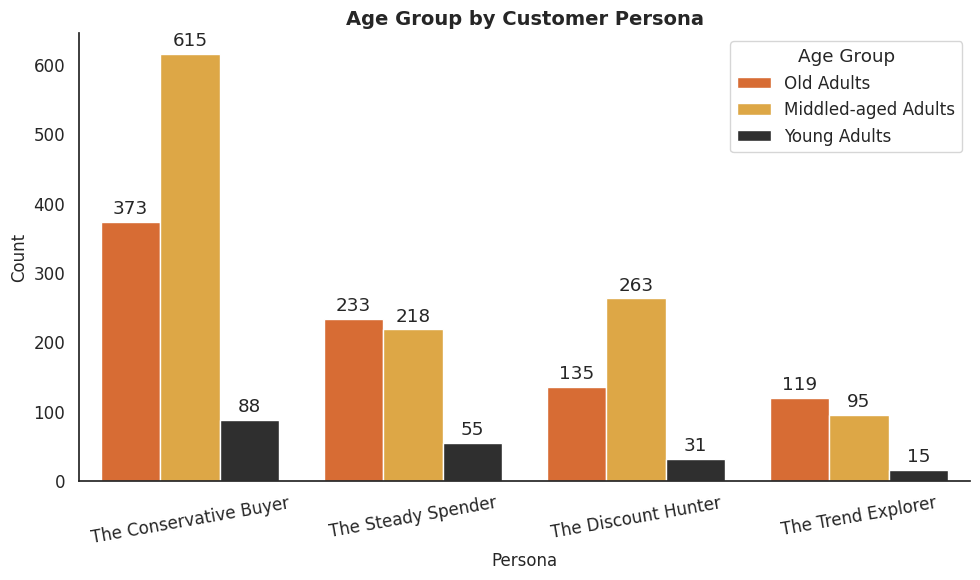

In [ ]:
# Gunakan palet warna sesuai slide
custom_palette = ['#F26419', '#F6AE2D', '#2F2F2F', '#EDEDED', '#86BBD8', '#33658A']

plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df_clusterfinal,
    x='Persona',
    hue='age_group',
    palette=custom_palette,
    order=[
        'The Conservative Buyer',
        'The Steady Spender',
        'The Discount Hunter',
        'The Trend Explorer'
    ]
)

# Tambahkan label pada setiap bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

sns.despine()
plt.title('Age Group by Customer Persona', fontsize=14, fontweight='bold')
plt.xlabel('Persona', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=10)
plt.grid(False)
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()


## **Average Income by Customer Persona**

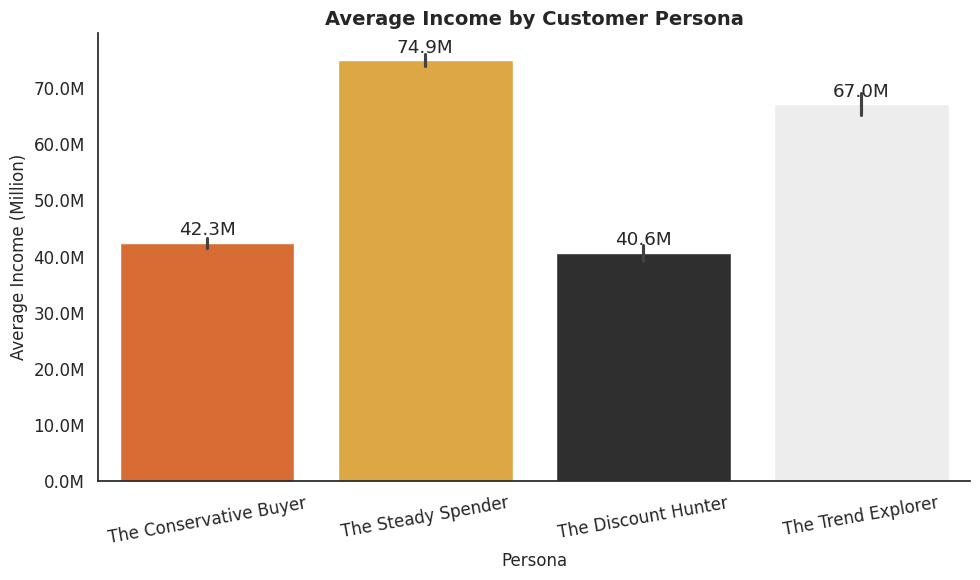

In [ ]:
# Palet warna sesuai slide
custom_palette = ['#F26419', '#F6AE2D', '#2F2F2F', '#EDEDED', '#86BBD8', '#33658A']

def format_million(value):
    return f'{value/1e6:.1f}M'

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df_clusterfinal,
    x='Persona',
    y='income',
    estimator='mean',
    palette=custom_palette,
    order=[
        'The Conservative Buyer',
        'The Steady Spender',
        'The Discount Hunter',
        'The Trend Explorer'
    ]
)

# Tambahkan label dalam format singkat
for container in ax.containers:
    labels = [format_million(bar.get_height()) for bar in container]
    ax.bar_label(container, labels=labels, label_type='edge', padding=3)

# Format y-axis ke dalam jutaan (M)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

sns.despine()
plt.title('Average Income by Customer Persona', fontsize=14, fontweight='bold')
plt.xlabel('Persona', fontsize=12)
plt.ylabel('Average Income (Million)', fontsize=12)
plt.xticks(rotation=10)
plt.grid(False)
plt.tight_layout()
plt.show()

## **Average Total Spending by Persona**

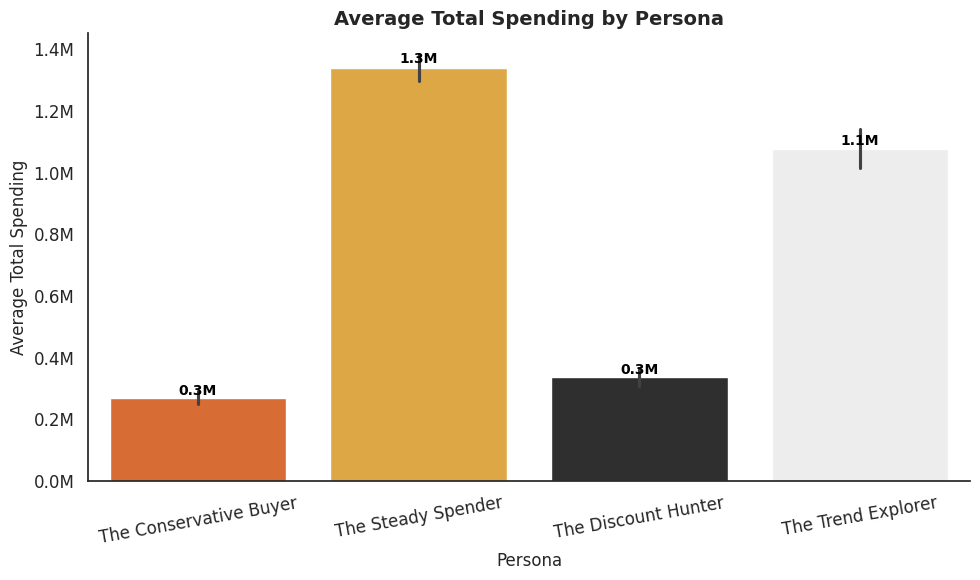

In [ ]:
import matplotlib.ticker as ticker

custom_palette = ['#F26419', '#F6AE2D', '#2F2F2F', '#EDEDED', '#86BBD8', '#33658A']

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df_clusterfinal,
    x='Persona',
    y='total_spent',
    estimator='mean',
    palette=custom_palette,
    order=[
        'The Conservative Buyer',
        'The Steady Spender',
        'The Discount Hunter',
        'The Trend Explorer'
    ]
)

sns.despine()
plt.title('Average Total Spending by Persona', fontsize=14, fontweight='bold')
plt.xlabel('Persona', fontsize=12)
plt.ylabel('Average Total Spending', fontsize=12)
plt.xticks(rotation=10)

# Format y-axis menjadi jutaan (M)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

# Tambahkan label nilai di atas batang
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/1e6:.1f}M',
                (p.get_x() + p.get_width() / 2, height + 0.005 * height),
                ha='center', va='bottom',
                fontsize=10, color='black', fontweight='bold')

plt.grid(False)
plt.tight_layout()
plt.show()

## **Channel Preference by Persona**

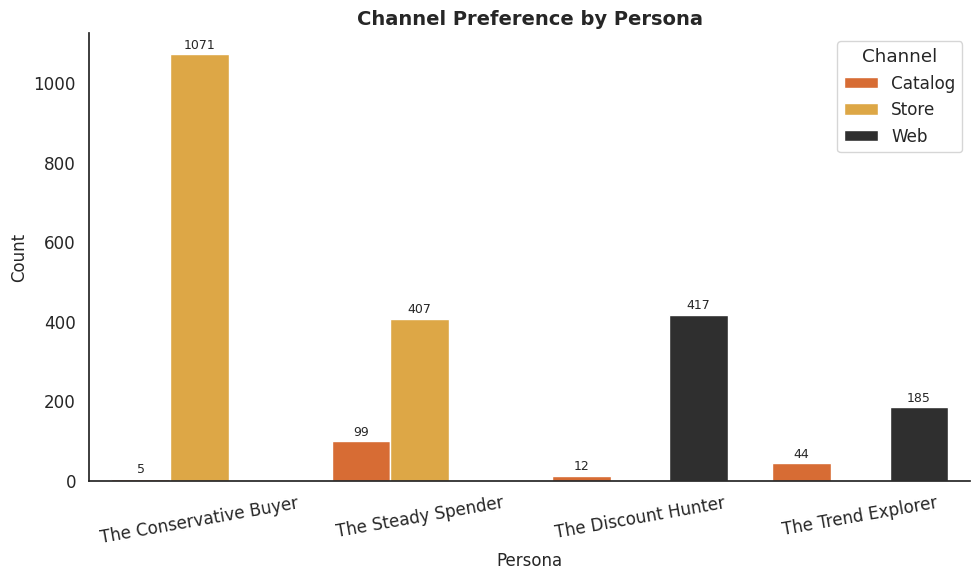

In [ ]:
# Palet warna sesuai slide
custom_palette = ['#F26419', '#F6AE2D', '#2F2F2F', '#EDEDED', '#86BBD8', '#33658A']

plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df_clusterfinal,
    x='Persona',
    hue='channel_preference',
    palette=custom_palette,
    order=[
        'The Conservative Buyer',
        'The Steady Spender',
        'The Discount Hunter',
        'The Trend Explorer'
    ]
)

sns.despine()
plt.title('Channel Preference by Persona', fontsize=14, fontweight='bold')
plt.xlabel('Persona', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=10)
plt.grid(False)
plt.legend(title='Channel')

# Tambahkan label di atas setiap bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=2)

plt.tight_layout()
plt.show()

## **Average Conversion Rate by Persona**

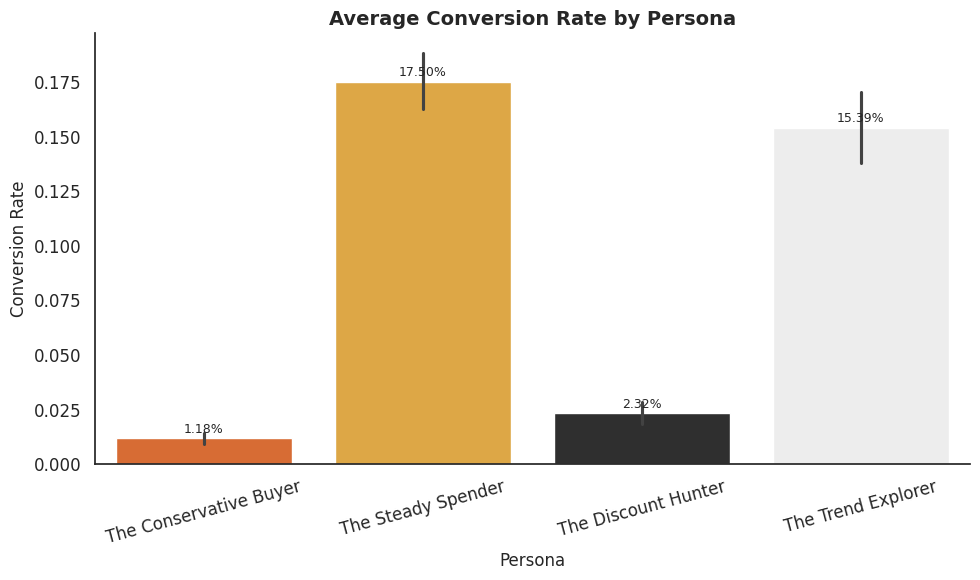

In [ ]:
# Palet warna sesuai slide
custom_palette = ['#F26419', '#F6AE2D', '#2F2F2F', '#EDEDED', '#86BBD8', '#33658A']

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df_clusterfinal,
    x='Persona',
    y='conversion_rate',
    estimator='mean',
    palette=custom_palette,
    order=[
        'The Conservative Buyer',
        'The Steady Spender',
        'The Discount Hunter',
        'The Trend Explorer'
    ]
)

sns.despine()
plt.title('Average Conversion Rate by Persona', fontsize=14, fontweight='bold')
plt.xlabel('Persona', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.xticks(rotation=15)
plt.grid(False)

# Tambahkan label nilai di atas bar (dalam persen)
for container in ax.containers:
    labels = [f'{bar.get_height():.2%}' for bar in container]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=9, padding=2)

plt.tight_layout()
plt.show()

## **Average Product Spending per Persona**

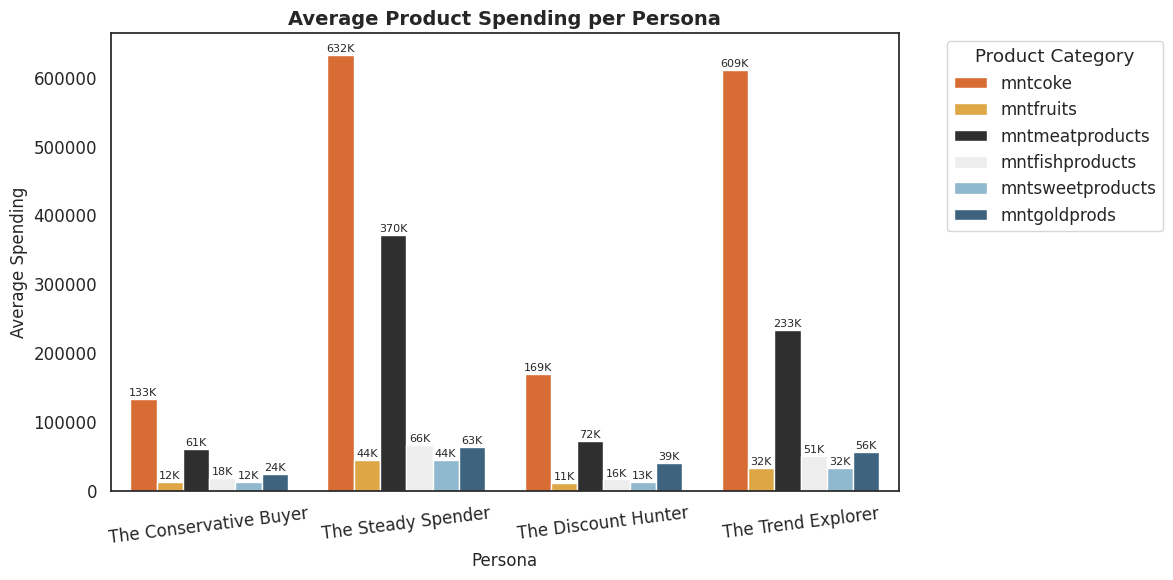

In [ ]:
# Palet warna sesuai slide (panjang harus sesuai jumlah kategori produk)
custom_palette = ['#F26419', '#F6AE2D', '#2F2F2F', '#EDEDED', '#86BBD8', '#33658A']

# Kolom spending per produk
product_columns = [
    'mntcoke', 'mntfruits', 'mntmeatproducts',
    'mntfishproducts', 'mntsweetproducts', 'mntgoldprods'
]

# Hitung rata-rata pengeluaran tiap produk per persona
avg_spending = df_clusterfinal.groupby('Persona')[product_columns].mean().reset_index()

# Ubah ke format long (melted)
avg_spending_melted = avg_spending.melt(id_vars='Persona', var_name='Product Category', value_name='Average Spending')

# Urutan persona
persona_order = [
    'The Conservative Buyer',
    'The Steady Spender',
    'The Discount Hunter',
    'The Trend Explorer'
]

# Buat visualisasi
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=avg_spending_melted,
    x='Persona',
    y='Average Spending',
    hue='Product Category',
    palette=custom_palette,
    order=persona_order
)

# Tambahkan label nilai di atas setiap bar dengan format ribuan
for container in ax.containers:
    labels = [f'{int(v/1000):,}K' if v >= 1000 else f'{int(v)}' for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=8, padding=1)

plt.title('Average Product Spending per Persona', fontsize=14, fontweight='bold')
plt.xlabel('Persona', fontsize=12)
plt.ylabel('Average Spending', fontsize=12)
plt.xticks(rotation=7)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
plt.tight_layout()
plt.show()

# **5. Insight & Recommendation include in Report**

In [ ]:
def format_rp(amount):
    """Formats a number into Indonesian Rupiah currency string."""
    return f"Rp {amount:,.0f}".replace(",", ".")

# Biaya campaign per customer (dalam Rupiah)
cost_per_customer = 30000

# --- SEBELUM MODELING ---
# Total pelanggan
total_customer = len(dfe)

# Rata-rata conversion rate dan total spending dari seluruh pelanggan (tanpa segmentasi)
overall_cr_before = dfe['conversion_rate'].mean()
overall_spending_before = dfe['total_spent'].mean()

# Total revenue dan cost sebelum dilakukan modeling
total_revenue_before = overall_cr_before * overall_spending_before * total_customer
total_cost_before = cost_per_customer * total_customer
roi_before = (total_revenue_before - total_cost_before) / total_cost_before

# --- SETELAH MODELING ---
# Hitung statistik rata-rata conversion rate, total spending, dan jumlah pelanggan per persona
persona_stats = df_clusterfinal.groupby('Persona').agg({
    'conversion_rate': 'mean',
    'total_spent': 'mean',
    'Persona': 'count'
}).rename(columns={'Persona': 'count'}).reset_index()

# Tentukan dua persona terbaik berdasarkan kombinasi conversion rate dan total spending
top_personas = persona_stats.sort_values(by=['conversion_rate', 'total_spent'], ascending=False).head(2)['Persona'].tolist()
target_df = df_clusterfinal[df_clusterfinal['Persona'].isin(top_personas)]

# Rata-rata conversion rate dari

# Biaya campaign per customer (dalam Rupiah)
cost_per_customer = 30000

# --- SEBELUM MODELING ---
# Total pelanggan
total_customer = len(dfe)

# Rata-rata conversion rate dan total spending dari seluruh pelanggan (tanpa segmentasi)
overall_cr_before = dfe['conversion_rate'].mean()
overall_spending_before = dfe['total_spent'].mean()

# Total revenue dan cost sebelum dilakukan modeling
total_revenue_before = overall_cr_before * overall_spending_before * total_customer
total_cost_before = cost_per_customer * total_customer
roi_before = (total_revenue_before - total_cost_before) / total_cost_before

# --- SETELAH MODELING ---
# Hitung statistik rata-rata conversion rate, total spending, dan jumlah pelanggan per persona
persona_stats = df_clusterfinal.groupby('Persona').agg({
    'conversion_rate': 'mean',
    'total_spent': 'mean',
    'Persona': 'count'
}).rename(columns={'Persona': 'count'}).reset_index()

# Tentukan dua persona terbaik berdasarkan kombinasi conversion rate dan total spending
top_personas = persona_stats.sort_values(by=['conversion_rate', 'total_spent'], ascending=False).head(2)['Persona'].tolist()
target_df = df_clusterfinal[df_clusterfinal['Persona'].isin(top_personas)]

# Rata-rata conversion rate dari pelanggan yang ditarget
overall_cr_after = target_df['conversion_rate'].mean()
overall_spending_after = target_df['total_spent'].mean()

# Total revenue dan cost setelah dilakukan segmentasi dan targeting
total_revenue_after = (target_df['conversion_rate'] * target_df['total_spent']).sum()
total_cost_after = cost_per_customer * len(target_df)
roi_after = (total_revenue_after - total_cost_after) / total_cost_after

# Perubahan dan peningkatan conversion rate
cr_improvement = overall_cr_after - overall_cr_before
cr_improvement_pct = (cr_improvement / overall_cr_before) * 100

# Cetak hasil dalam format seperti business report
print("=== Business Impact Summary ===\n")
print(f"Total Customers (Before): {total_customer:,}")
print(f"🔵 Average Conversion Rate (Before Targeting): {overall_cr_before:.4f}")
print(f"Total Revenue (Before): Rp {total_revenue_before:,.0f}")
print(f"Total Cost (Before): Rp {total_cost_before:,.0f}")
print(f"ROI (Before): {roi_before:.2f}")

print(f"\nTargeted Customers (After): {len(target_df):,}")
print(f"🟢 Average Conversion Rate (After Targeting): {overall_cr_after:.4f}")
print(f"Targeted Personas: {', '.join(top_personas)}")
print(f"Total Revenue (After): Rp {total_revenue_after:,.0f}")
print(f"Total Cost (After): Rp {total_cost_after:,.0f}")
print(f"ROI (After): {roi_after:.2f}")

print("\n=== Business Impact ===\n")
print(f"📈 Improvement Average Conversion Rate: {cr_improvement:.4f} ({cr_improvement_pct:.2f}%)")
print(f"🔼 Revenue Increase: {format_rp(revenue_gain)} ({(revenue_gain / total_revenue_before) * 100:.2f}%)")
print(f"💡 ROI Improvement: {roi_gain:.2f}x")
print(f"💰 Cost Saving: {format_rp(cost_saving)} ({(cost_saving / total_cost_before) * 100:.2f}%)")

=== Business Impact Summary ===

Total Customers (Before): 2,240
🔵 Average Conversion Rate (Before Targeting): 0.1493
Total Revenue (Before): Rp 202,537,094
Total Cost (Before): Rp 67,200,000
ROI (Before): 2.01

Targeted Customers (After): 735
🟢 Average Conversion Rate (After Targeting): 0.1684
Targeted Personas: The Steady Spender, The Trend Explorer
Total Revenue (After): Rp 162,308,034
Total Cost (After): Rp 22,050,000
ROI (After): 6.36

=== Business Impact ===

📈 Improvement Average Conversion Rate: 0.0192 (12.85%)


NameError: name 'revenue_gain' is not defined

In [ ]:
def format_rp(amount):
    """Formats a number into Indonesian Rupiah currency string."""
    return f"Rp {amount:,.0f}".replace(",", ".")

# Biaya campaign per customer (dalam Rupiah)
cost_per_customer = 30000

# --- SEBELUM MODELING ---
# Total pelanggan
total_customer = len(dfe)

# Rata-rata conversion rate dan total spending dari seluruh pelanggan (tanpa segmentasi)
overall_cr_before = dfe['conversion_rate'].mean()
overall_spending_before = dfe['total_spent'].mean()

# Total revenue dan cost sebelum dilakukan modeling
total_revenue_before = overall_cr_before * overall_spending_before * total_customer
total_cost_before = cost_per_customer * total_customer
roi_before = (total_revenue_before - total_cost_before) / total_cost_before

# --- SETELAH MODELING ---
# Hitung statistik rata-rata conversion rate, total spending, dan jumlah pelanggan per persona
persona_stats = df_clusterfinal.groupby('Persona').agg({
    'conversion_rate': 'mean',
    'total_spent': 'mean',
    'Persona': 'count'
}).rename(columns={'Persona': 'count'}).reset_index()

# Tentukan dua persona terbaik berdasarkan kombinasi conversion rate dan total spending
top_personas = persona_stats.sort_values(by=['conversion_rate', 'total_spent'], ascending=False).head(2)['Persona'].tolist()
target_df = df_clusterfinal[df_clusterfinal['Persona'].isin(top_personas)]

# Rata-rata conversion rate dari pelanggan yang ditarget
overall_cr_after = target_df['conversion_rate'].mean()
overall_spending_after = target_df['total_spent'].mean()

# Total revenue dan cost setelah dilakukan segmentasi dan targeting
total_revenue_after = (target_df['conversion_rate'] * target_df['total_spent']).sum()
total_cost_after = cost_per_customer * len(target_df)
roi_after = (total_revenue_after - total_cost_after) / total_cost_after

# Perubahan dan peningkatan conversion rate
cr_improvement = overall_cr_after - overall_cr_before
cr_improvement_pct = (cr_improvement / overall_cr_before) * 100

# Calculate revenue_gain, roi_gain, and cost_saving
revenue_gain = total_revenue_after - total_revenue_before  # Calculate revenue gain
roi_gain = roi_after / roi_before  # Calculate ROI gain
cost_saving = total_cost_before - total_cost_after  # Calculate cost saving


# Cetak hasil dalam format seperti business report
print("=== Business Impact Summary ===\n")
print(f"Total Customers (Before): {total_customer:,}")
print(f"🔵 Average Conversion Rate (Before Targeting): {overall_cr_before:.4f}")
print(f"Total Revenue (Before): Rp {total_revenue_before:,.0f}")
print(f"Total Cost (Before): Rp {total_cost_before:,.0f}")
print(f"ROI (Before): {roi_before:.2f}")

print(f"\nTargeted Customers (After): {len(target_df):,}")
print(f"🟢 Average Conversion Rate (After Targeting): {overall_cr_after:.4f}")
print(f"Targeted Personas: {', '.join(top_personas)}")
print(f"Total Revenue (After): Rp {total_revenue_after:,.0f}")
print(f"Total Cost (After): Rp {total_cost_after:,.0f}")
print(f"ROI (After): {roi_after:.2f}")

print("\n=== Business Impact ===\n")
print(f"📈 Improvement Average Conversion Rate: {cr_improvement:.4f} ({cr_improvement_pct:.2f}%)")
print(f"🔼 Revenue Increase: {format_rp(revenue_gain)} ({(revenue_gain / total_revenue_before) * 100:.2f}%)")
print(f"💡 ROI Improvement: {roi_gain:.2f}x")
print(f"💰 Cost Saving: {format_rp(cost_saving)} ({(cost_saving / total_cost_before) * 100:.2f}%)")

=== Business Impact Summary ===

Total Customers (Before): 2,240
🔵 Average Conversion Rate (Before Targeting): 0.1493
Total Revenue (Before): Rp 202,537,094
Total Cost (Before): Rp 67,200,000
ROI (Before): 2.01

Targeted Customers (After): 735
🟢 Average Conversion Rate (After Targeting): 0.1684
Targeted Personas: The Steady Spender, The Trend Explorer
Total Revenue (After): Rp 162,308,034
Total Cost (After): Rp 22,050,000
ROI (After): 6.36

=== Business Impact ===

📈 Improvement Average Conversion Rate: 0.0192 (12.85%)
🔼 Revenue Increase: Rp -40.229.060 (-19.86%)
💡 ROI Improvement: 3.16x
💰 Cost Saving: Rp 45.150.000 (67.19%)


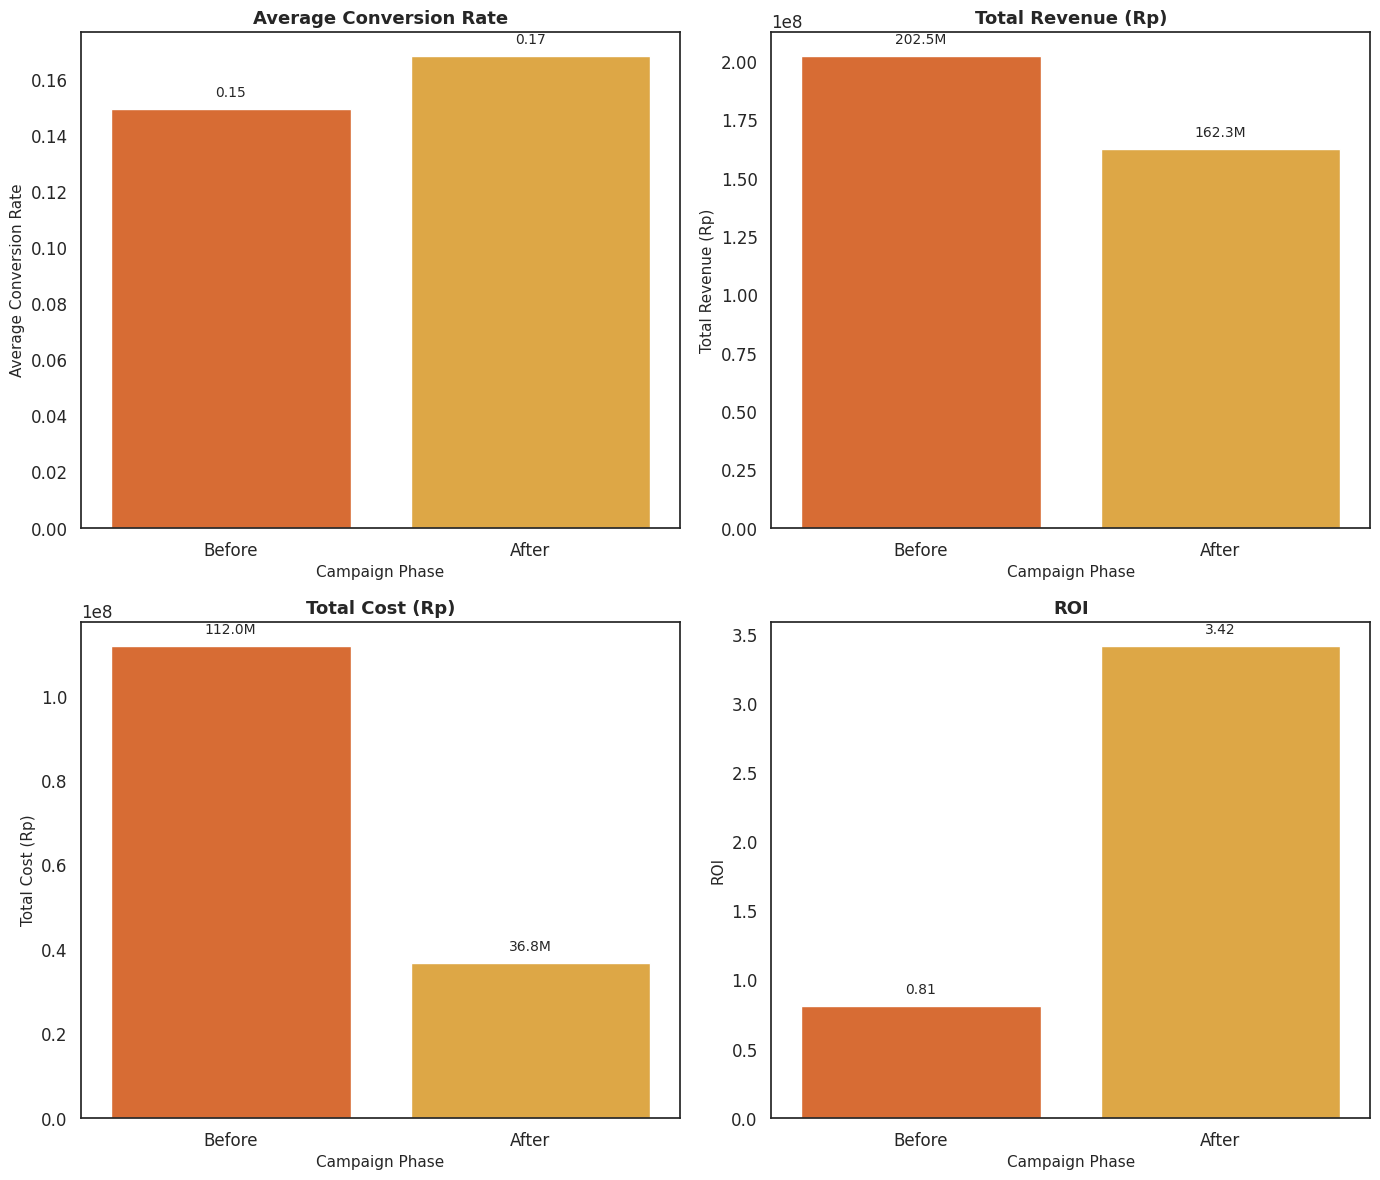

In [ ]:
# Palet warna sesuai slide
custom_palette = ['#F26419', '#F6AE2D', '#2F2F2F', '#EDEDED', '#86BBD8', '#33658A']
colors = custom_palette[:2]  # Warna untuk Before dan After

metrics = {
    "Average Conversion Rate": [0.1493, 0.1684],
    "Total Revenue (Rp)": [202_537_094, 162_308_034],
    "Total Cost (Rp)": [112_000_000, 36_750_000],
    "ROI": [0.81, 3.42]
}

labels = ["Before", "After"]

def format_label(key, value):
    if "Rate" in key or key == "ROI":
        return f"{value:.2f}"
    else:
        return f"{value/1e6:.1f}M"

# Membuat barplot untuk setiap metrik
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for i, (key, values) in enumerate(metrics.items()):
    sns.barplot(x=labels, y=values, palette=colors, ax=axes[i])
    axes[i].set_title(key, fontsize=13, fontweight='bold')
    axes[i].set_ylabel(key, fontsize=11)
    axes[i].set_xlabel("Campaign Phase", fontsize=11)

    for index, value in enumerate(values):
        label = format_label(key, value)
        axes[i].text(index, value + 0.02 * max(values), label, ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


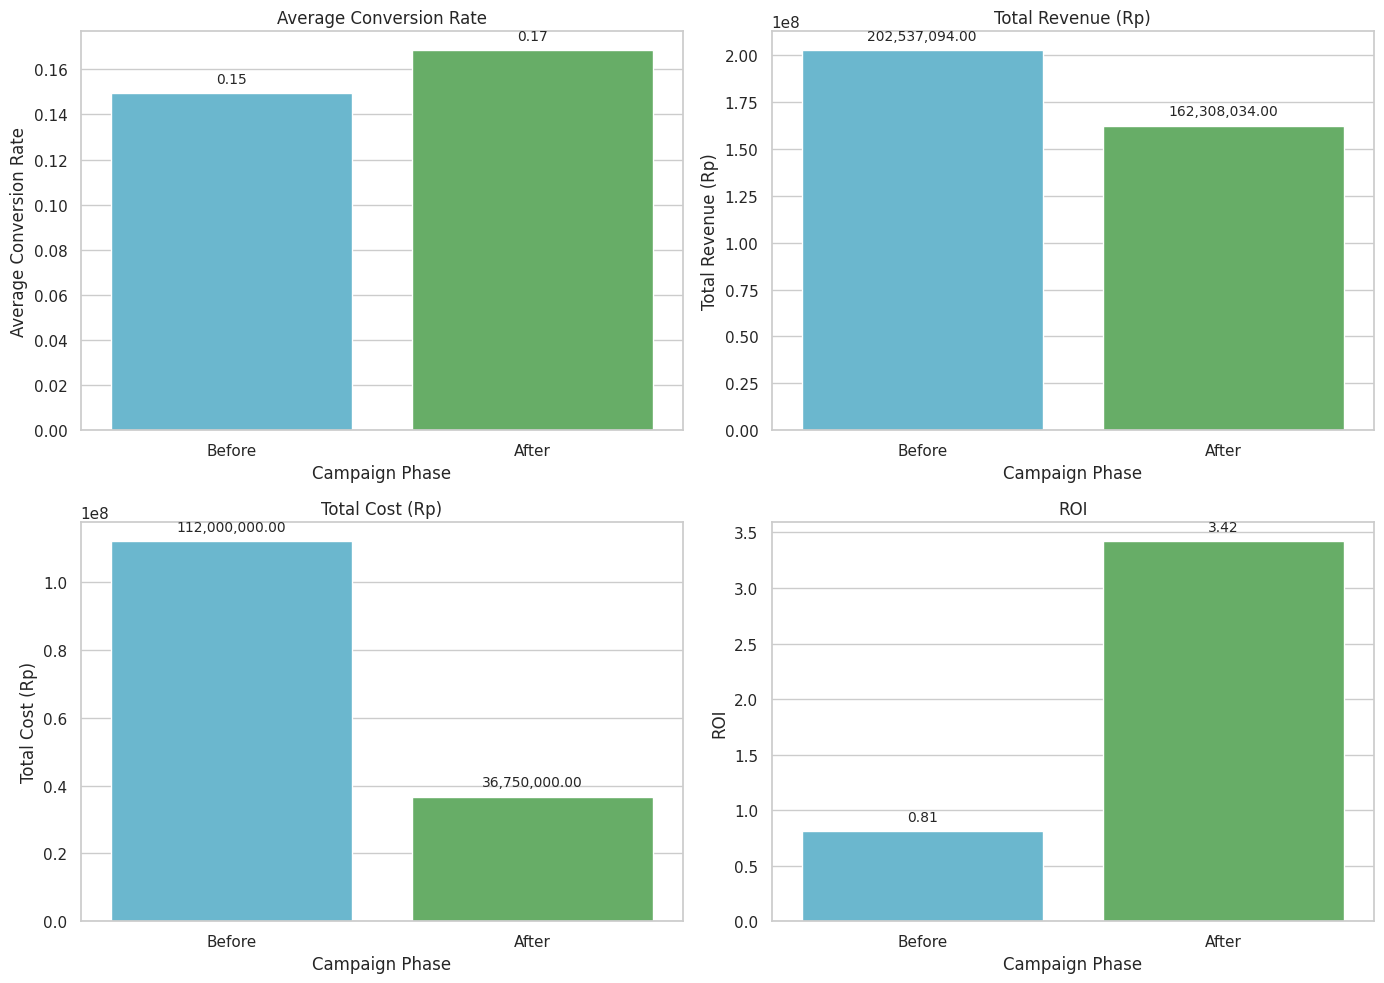

In [ ]:
# Palet warna sesuai slide
custom_palette = ['#F26419', '#F6AE2D', '#2F2F2F', '#EDEDED', '#86BBD8', '#33658A']
colors = custom_palette[:2]  # Warna untuk Before dan After

metrics = {
    "Average Conversion Rate": [0.1493, 0.1684],
    "Total Revenue (Rp)": [202_537_094, 162_308_034],
    "Total Cost (Rp)": [112_000_000, 36_750_000],
    "ROI": [0.81, 3.42]
}

labels = ["Before", "After"]

def format_label(key, value):
    if "Rate" in key or key == "ROI":
        return f"{value:.2f}"
    else:
        return f"{value/1e6:.1f}M"

# Membuat barplot untuk setiap metrik
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, (key, values) in enumerate(metrics.items()):
    sns.barplot(x=labels, y=values, palette=colors, ax=axes[i])
    axes[i].set_title(key, fontsize=13, fontweight='bold')
    axes[i].set_ylabel(key, fontsize=11)
    axes[i].set_xlabel("Campaign Phase", fontsize=11)

    for index, value in enumerate(values):
        label = format_label(key, value)
        axes[i].text(index, value + 0.02 * max(values), label, ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
